In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete.")

Vis setup Complete
Setup complete.


In [2]:
#Load the data using pandas read_csv function. This will generate a data frame we will use through the work.
Disease_data = pd.read_csv('disease_train(5) (1).csv')
Disease_test=pd.read_csv('disease_test(5) (1).csv')

#Show the first and last few records to check data is loading correctly
print(Disease_data.head())
print(Disease_data.tail())

       id  age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
0  PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
1  PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
2  PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
3  PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
4  PA1005   38  female   no       no      0.6      1.9     95.0      NaN   

   test_X5  ...  tumor disorder medication_A medication_B mental_health  \
0    105.0  ...     no       no           no           no            no   
1    104.0  ...     no       no          yes           no            no   
2     44.0  ...     no       no           no           no            no   
3    108.0  ...     no       no           no           no            no   
4      NaN  ...     no       no           no           no            no   

  mood_stabiliser surgery treatment_type1 suspect         target  
0              no      no

In [3]:
print(Disease_test.head())
print(Disease_test.tail())

       id  age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
0  PA6001   22  female   no       no    0.500      1.7     83.0     0.86   
1  PA6002   42    male   no       no    0.060      2.0     79.0     0.81   
2  PA6003   42    male   no       no    0.045      2.1    111.0     0.89   
3  PA6004   42  female   no       no    1.900      2.0    114.0     1.33   
4  PA6005   55    male   no       no    0.570      1.4     75.0     0.72   

   test_X5  ...  enlargement tumor disorder medication_A medication_B  \
0     97.0  ...           no    no       no           no           no   
1     98.0  ...           no    no       no           no           no   
2    125.0  ...           no    no       no           no           no   
3     86.0  ...           no    no       no           no           no   
4    104.0  ...           no    no       no           no           no   

  mental_health mood_stabiliser surgery treatment_type1 suspect  
0            no              no      n

In [4]:
# from the above we can see that the train dataset is made of 24c olumns including the target and the test data has 23 columns, because the target is not there

In [5]:
Disease_data

id  age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
0     PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
1     PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
2     PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
3     PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
4     PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...      ...  ...     ...  ...      ...      ...      ...      ...      ...   
4245  PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
4246  PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
4247  PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
4248  PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
4249  PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

      test_X5  ...  tumor disorder medication_A medication_B mental_health  \
0       105.0  ...     no       no           no           no            no   
1       104.0  ...     no       no          yes           no            no   
2        44.0  ...     no       no           no           no            no   
3       108.0  ...     no       no           no           no            no   
4         NaN  ...     no       no           no           no            no   
...       ...  ...    ...      ...          ...          ...           ...   
4245    122.0  ...     no       no           no           no            no   
4246     19.0  ...     no       no           no           no            no   
4247     92.0  ...     no       no           no           no            no   
4248    154.0  ...     no       no           no           no            no   
4249     63.0  ...     no       no           no           no            no   

     mood_stabiliser surgery treatment_type1 suspect         target  
0                 no      no              no      no  moderate_risk  
1                yes      no              no      no       low_risk  
2                 no      no              no      no  moderate_risk  
3                 no      no              no      no       low_risk  
4                 no      no              no      no       low_risk  
...              ...     ...             ...     ...            ...  
4245              no      no              no      no       low_risk  
4246              no      no              no      no  moderate_risk  
4247              no      no              no      no       low_risk  
4248              no      no              no      no       low_risk  
4249              no      no              no      no       low_risk  

[4250 rows x 24 columns]

In [6]:
Disease_data.columns

Index(['id', 'age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2',
       'test_X3', 'test_X4', 'test_X5', 'test_X6', 'concern_type1',
       'concern_type2', 'enlargement', 'tumor', 'disorder', 'medication_A',
       'medication_B', 'mental_health', 'mood_stabiliser', 'surgery',
       'treatment_type1', 'suspect', 'target'],
      dtype='object')

In [7]:
#to check the number of rows and columns
Disease_data.shape

(4250, 24)

<Axes: xlabel='target', ylabel='count'>

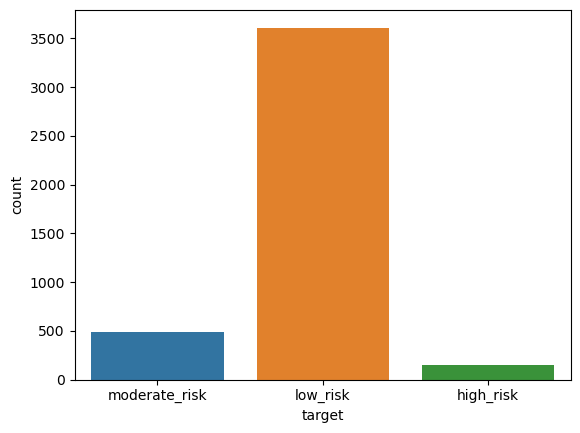

In [8]:
#Show distribution of the class on whole train dataset, the target column has 
sns.countplot(x= 'target', data=Disease_data)
#Here we can see that the target data is not balanced but we will treat this later

In [9]:
Disease_data.target.value_counts()

target
low_risk         3612
moderate_risk     489
high_risk         149
Name: count, dtype: int64

In [10]:
missing_values = Disease_data.isnull()

# Calculate the sum of missing values for each column
missing_values_sum = missing_values.sum()

# Print the sum of missing values for each column
print(missing_values_sum)
#we can observe here tht colum text_6 has a lot of missing values, let us check the percentage of the missing values as well

id                    0
age                   0
gender              141
sick                  0
pregnant              0
test_X1             411
test_X2            1243
test_X3             216
test_X4             392
test_X5             387
test_X6            4096
concern_type1         0
concern_type2         0
enlargement           0
tumor                 0
disorder              0
medication_A          0
medication_B          0
mental_health         0
mood_stabiliser       0
surgery               0
treatment_type1       0
suspect               0
target                0
dtype: int64


In [11]:
print("percentage of missing values:")
for column in Disease_data.columns:
    percentage=Disease_data[column].isnull().mean() * 100
    print(f"The Percentage of missing values in '{column}' column is: {percentage:.2f}%")

percentage of missing values:
The Percentage of missing values in 'id' column is: 0.00%
The Percentage of missing values in 'age' column is: 0.00%
The Percentage of missing values in 'gender' column is: 3.32%
The Percentage of missing values in 'sick' column is: 0.00%
The Percentage of missing values in 'pregnant' column is: 0.00%
The Percentage of missing values in 'test_X1' column is: 9.67%
The Percentage of missing values in 'test_X2' column is: 29.25%
The Percentage of missing values in 'test_X3' column is: 5.08%
The Percentage of missing values in 'test_X4' column is: 9.22%
The Percentage of missing values in 'test_X5' column is: 9.11%
The Percentage of missing values in 'test_X6' column is: 96.38%
The Percentage of missing values in 'concern_type1' column is: 0.00%
The Percentage of missing values in 'concern_type2' column is: 0.00%
The Percentage of missing values in 'enlargement' column is: 0.00%
The Percentage of missing values in 'tumor' column is: 0.00%
The Percentage of mis

In [12]:
#For now we will drop the test _x6 column as it has a huge percentage amount of missing data and we will figure out later,
#what to do with the rest of the missing values before starting our predictions
Disease_data.drop('test_X6',axis=1, inplace=True)

In [13]:
#here it is observed that the number of columns in the train data has reduced, so it is evident to say we have successfully 
#dropped the text_X6 column
Disease_data

id  age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
0     PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
1     PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
2     PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
3     PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
4     PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...      ...  ...     ...  ...      ...      ...      ...      ...      ...   
4245  PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
4246  PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
4247  PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
4248  PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
4249  PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

      test_X5  ... tumor disorder medication_A medication_B mental_health  \
0       105.0  ...    no       no           no           no            no   
1       104.0  ...    no       no          yes           no            no   
2        44.0  ...    no       no           no           no            no   
3       108.0  ...    no       no           no           no            no   
4         NaN  ...    no       no           no           no            no   
...       ...  ...   ...      ...          ...          ...           ...   
4245    122.0  ...    no       no           no           no            no   
4246     19.0  ...    no       no           no           no            no   
4247     92.0  ...    no       no           no           no            no   
4248    154.0  ...    no       no           no           no            no   
4249     63.0  ...    no       no           no           no            no   

     mood_stabiliser surgery treatment_type1 suspect         target  
0                 no      no              no      no  moderate_risk  
1                yes      no              no      no       low_risk  
2                 no      no              no      no  moderate_risk  
3                 no      no              no      no       low_risk  
4                 no      no              no      no       low_risk  
...              ...     ...             ...     ...            ...  
4245              no      no              no      no       low_risk  
4246              no      no              no      no  moderate_risk  
4247              no      no              no      no       low_risk  
4248              no      no              no      no       low_risk  
4249              no      no              no      no       low_risk  

[4250 rows x 23 columns]

In [14]:
#to crosscheck it has been driopped, let us check the column names in our train data
Disease_data.columns

Index(['id', 'age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2',
       'test_X3', 'test_X4', 'test_X5', 'concern_type1', 'concern_type2',
       'enlargement', 'tumor', 'disorder', 'medication_A', 'medication_B',
       'mental_health', 'mood_stabiliser', 'surgery', 'treatment_type1',
       'suspect', 'target'],
      dtype='object')

In [15]:
#here we divide the colum to categorical and numerical columns to make the model efficient for predicting

CATEGORICAL_COLUMNS= ["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                       "tumor", "disorder", "medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                       "surgery", "treatment_type1", "suspect"]
NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5"]

In [16]:
CATEGORICAL_COLUMNS

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'disorder',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect']

In [17]:
NUMERICAL_COLUMNS

['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

In [18]:
#The id column, as observed in the dataset, represents a unique identifier for each entry and doesn't fit neatly into 
#the conventional numerical or categorical types used for analysis. While it contains numerical information, 
#its primary purpose isn't for mathematical operations (like sum or average) but for identification. Similarly, 
#although it might seem like a categorical variable because it categorizes each entry as unique, it doesn't group entries 
#into meaningful categories for analysis. 

#Exclusion from Features: In predictive modeling, the id column is usually excluded from the features used to train the model. 
#Including it could lead to overfitting, where the model learns to associate outcomes with specific IDs rather than the
#underlying patterns in the data.

# we will just go ahead to set the id column as the index of the dataframe
Disease_data.set_index('id',inplace=True)

In [19]:
Disease_data
#it is observed that id has been set as the index of the data frame
#it is also observed that the number of colums has also reduced to 22.

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...     ...     ...  ...      ...      ...      ...      ...      ...   
PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

        test_X5 concern_type1  ... tumor disorder medication_A medication_B  \
id                             ...                                            
PA1001    105.0            no  ...    no       no           no           no   
PA1002    104.0            no  ...    no       no          yes           no   
PA1003     44.0            no  ...    no       no           no           no   
PA1004    108.0            no  ...    no       no           no           no   
PA1005      NaN            no  ...    no       no           no           no   
...         ...           ...  ...   ...      ...          ...          ...   
PA5246    122.0            no  ...    no       no           no           no   
PA5247     19.0            no  ...    no       no           no           no   
PA5248     92.0            no  ...    no       no           no           no   
PA5249    154.0            no  ...    no       no           no           no   
PA5250     63.0            no  ...    no       no           no           no   

       mental_health mood_stabiliser surgery treatment_type1 suspect  \
id                                                                     
PA1001            no              no      no              no      no   
PA1002            no             yes      no              no      no   
PA1003            no              no      no              no      no   
PA1004            no              no      no              no      no   
PA1005            no              no      no              no      no   
...              ...             ...     ...             ...     ...   
PA5246            no              no      no              no      no   
PA5247            no              no      no              no      no   
PA5248            no              no      no              no      no   
PA5249            no              no      no              no      no   
PA5250            no              no      no              no      no   

               target  
id                     
PA1001  moderate_risk  
PA1002       low_risk  
PA1003  moderate_risk  
PA1004       low_risk  
PA1005       low_risk  
...               ...  
PA5246       low_risk  
PA5247  moderate_risk  
PA5248       low_risk  
PA5249       low_risk  
PA5250       low_risk  

[4250 rows x 22 columns]

#### We can start by creating a boxplot of the Disease_data (which will include the numeric variables only in it by default. What can we see in it? Is there any problematic variables?

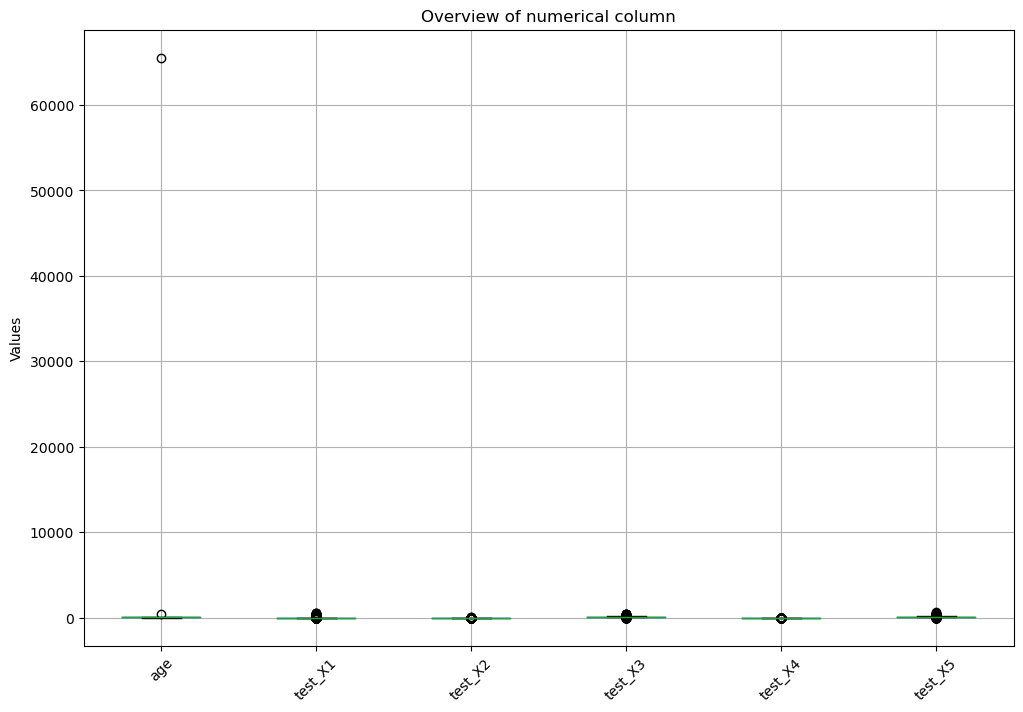

In [20]:
#checking for the outlier of the numerical columns with a boxplot
plt.figure(figsize=(12, 8))
Disease_data.boxplot(column=NUMERICAL_COLUMNS)
plt.title('Overview of numerical column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### from the visualisation above, the boxplot clearly shows us that there is an outlier in the age column, which is very distcance from the rest of the data points, we will go deeper to check with the scatter plots if we can see outliers in other columns as well

In [21]:
#statiscal analysis of the data as by default, only the numerical column works
Disease_data.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   4250.000000  3839.000000  3007.000000  4034.000000  3858.000000   
mean      67.374824     7.342463     2.035580   104.919623     0.970846   
std     1004.518821    32.657963     0.920404    35.496255     0.162474   
min        1.000000     0.005000     0.050000     2.000000     0.250000   
25%       37.000000     0.600000     1.600000    87.000000     0.870000   
50%       55.000000     1.500000     1.900000   102.000000     0.960000   
75%       67.000000     3.000000     2.300000   121.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  3863.000000  
mean    110.090834  
std      39.837621  
min       1.400000  
25%      92.000000  
50%     107.000000  
75%     125.000000  
max     642.000000

### Age:

The age column has an extremely high maximum value (65,526) compared to a 75th percentile value of 67, which suggests an outlier or data entry error, as this is not a feasible age for a human.
The standard deviation is very high (1004.52), indicating a wide spread of values and the influence of the outlier.
The median age is 55, which suggests that the middle-aged group is well-represented in the dataset.
Test_X1:

This test has a wide range of values, with a maximum of 530 which is far above the 75th percentile (3.00), indicating potential outliers or a heavily right-skewed distribution.
The mean (7.34) is much higher than the median (1.50), further suggesting a right-skewed distribution.
Test_X2:

The maximum value of test_X2 is 18, which is quite high compared to the 75th percentile (2.3), again indicating the possibility of outliers.
The mean is slightly above the median, which could indicate a slight right skew in the data.
Test_X3:

Test_X3 also has a high maximum value (430) compared to its 75th percentile value (121), suggesting the presence of outliers.
The mean is close to the median, which typically indicates a symmetric distribution, but the high maximum value suggests that outliers may be influencing the mean.
Test_X4:

The maximum value of test_X4 is also notably higher (1.96) than the 75th percentile (1.06), hinting at outliers.
The mean and median are quite close, which would typically suggest a symmetric distribution if not for the potential outlier.
Test_X5:

The maximum value of test_X5 (642) is substantially higher than the 75th percentile value (125), pointing to the existence of extreme values or outliers.
The mean and median are relatively close, but given the high maximum, the distribution may be skewed or contain outliers.
Overall, the data contains outliers or extreme values that can significantly affect mean values and standard deviation calculations. These outliers would be investigated to determine whether they are errors or true extreme values. If they are errors, they will be removed; if they are true values or of major importance for modeeling then they will be left.

## Exploratory Data Analysis and Visualisations

In [22]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Vis setup Complete")

Vis setup Complete


In [23]:
print("Shape of training data:",Disease_data.shape)
print(Disease_data.info())
Disease_data.sample(3)

Shape of training data: (4250, 22)
<class 'pandas.core.frame.DataFrame'>
Index: 4250 entries, PA1001 to PA5250
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              4250 non-null   int64  
 1   gender           4109 non-null   object 
 2   sick             4250 non-null   object 
 3   pregnant         4250 non-null   object 
 4   test_X1          3839 non-null   float64
 5   test_X2          3007 non-null   float64
 6   test_X3          4034 non-null   float64
 7   test_X4          3858 non-null   float64
 8   test_X5          3863 non-null   float64
 9   concern_type1    4250 non-null   object 
 10  concern_type2    4250 non-null   object 
 11  enlargement      4250 non-null   object 
 12  tumor            4250 non-null   object 
 13  disorder         4250 non-null   object 
 14  medication_A     4250 non-null   object 
 15  medication_B     4250 non-null   object 
 16  mental_health    4250 n

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA3042   40  female   no       no      6.1      NaN    139.0     1.35   
PA3309   30     NaN   no       no      0.9      1.9     76.0     0.83   
PA3909   72  female   no       no      2.7      2.4    117.0     1.08   

        test_X5 concern_type1  ... tumor disorder medication_A medication_B  \
id                             ...                                            
PA3042    103.0            no  ...    no       no           no           no   
PA3309     92.0            no  ...    no       no           no           no   
PA3909    109.0            no  ...    no       no           no           no   

       mental_health mood_stabiliser surgery treatment_type1 suspect  \
id                                                                     
PA3042            no              no      no              no      no   
PA3309            no              no      no              no      no   
PA3909            no              no      no              no      no   

               target  
id                     
PA3042  moderate_risk  
PA3309       low_risk  
PA3909       low_risk  

[3 rows x 22 columns]

In [24]:
# from the info, the data types seems to be correvt for all column

In [25]:
#this shows the number of unique values in the columns Disease_data.nunique()
#looking at this, we can see that disorder had only one unique value, which might not seem to have any 
#effect on the model to learn from
Disease_data.nunique()

age                 94
gender               2
sick                 2
pregnant             2
test_X1            334
test_X2             77
test_X3            245
test_X4            124
test_X5            263
concern_type1        2
concern_type2        2
enlargement          2
tumor                2
disorder             1
medication_A         2
medication_B         2
mental_health        2
mood_stabiliser      2
surgery              2
treatment_type1      2
suspect              2
target               3
dtype: int64

<Axes: xlabel='target', ylabel='count'>

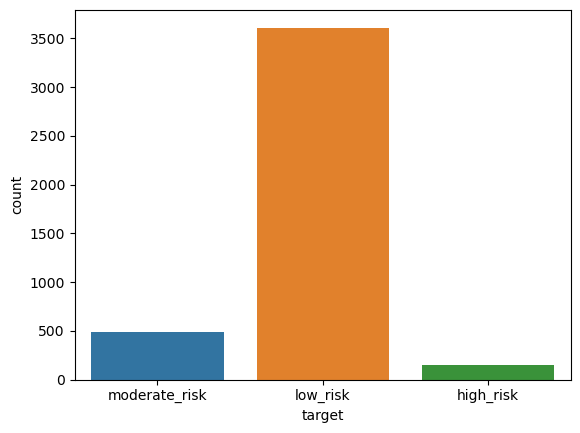

In [26]:
#Show distribution of the class on whole dataset, the target column has 
sns.countplot(x= 'target', data=Disease_data)
#Here we can see that the target data is not balanced but we will treat this later

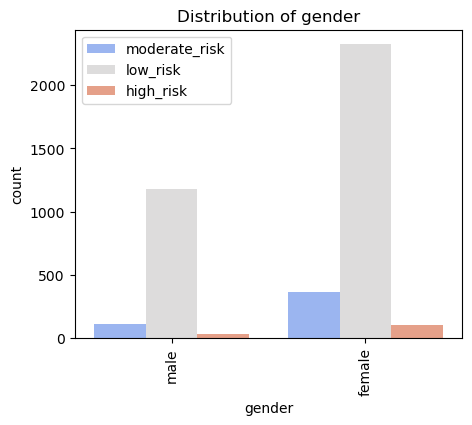

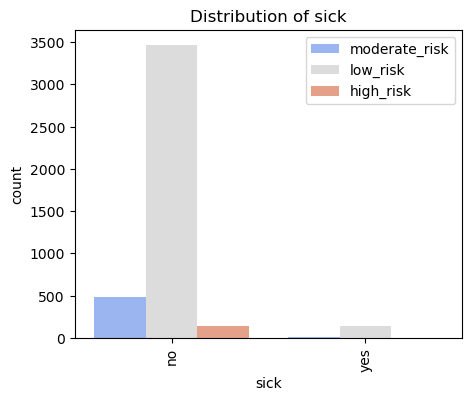

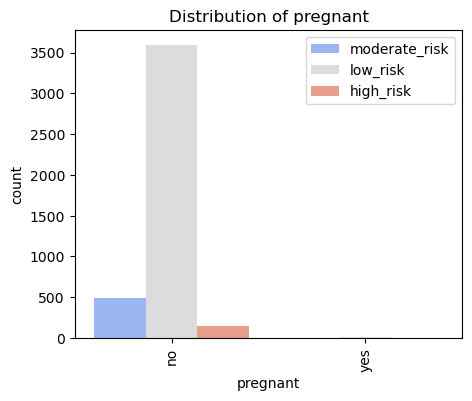

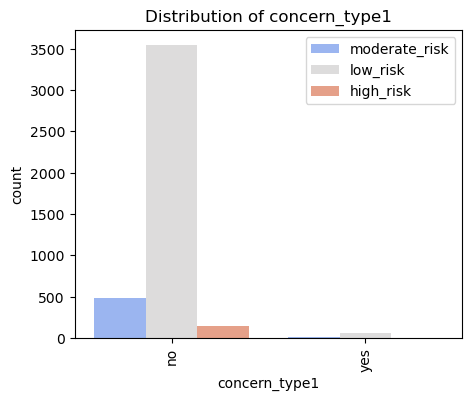

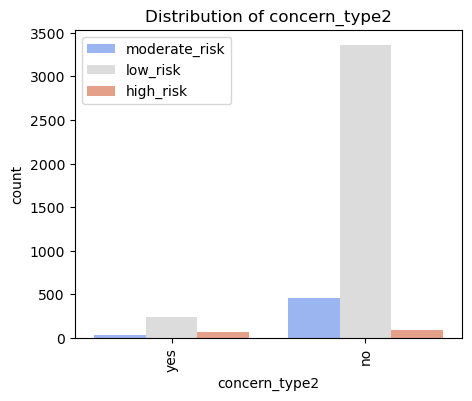

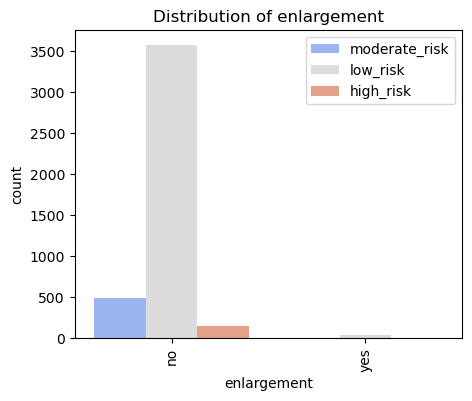

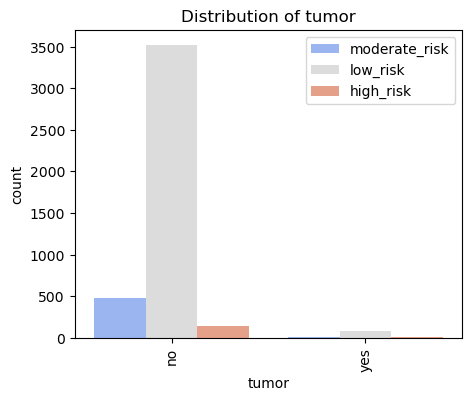

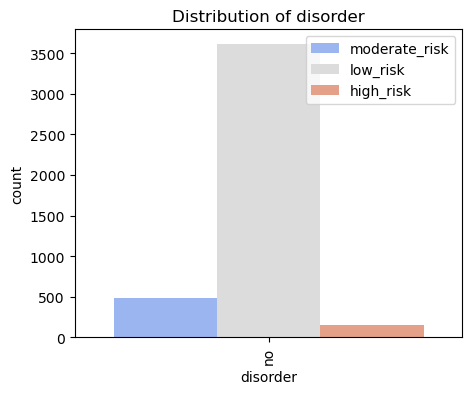

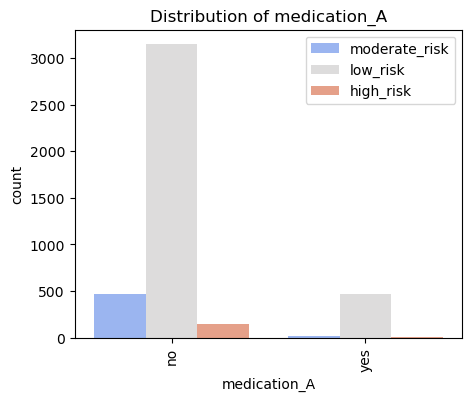

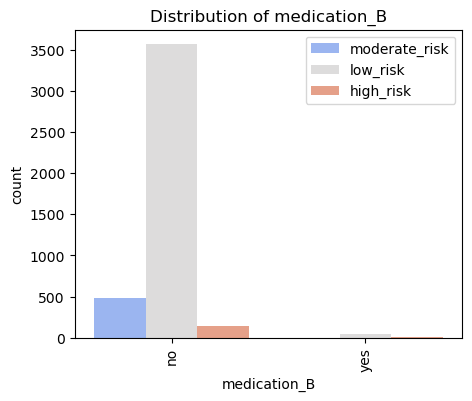

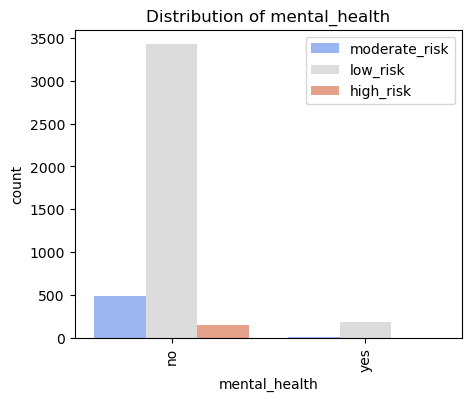

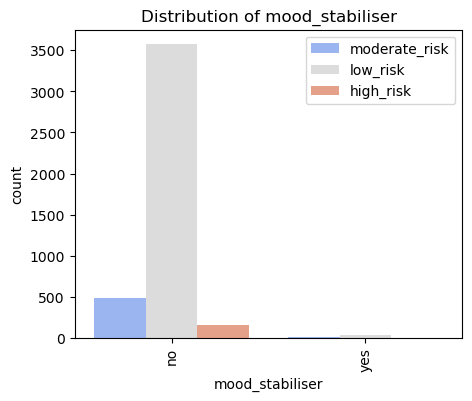

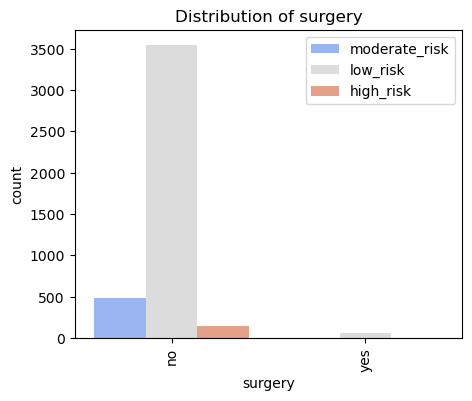

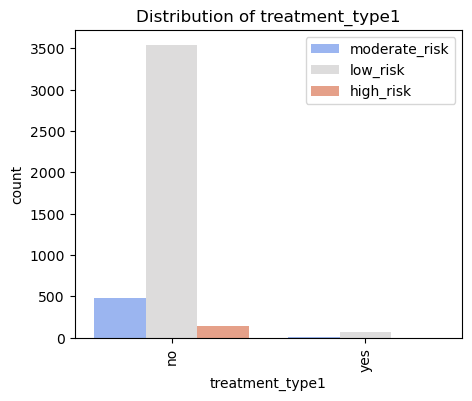

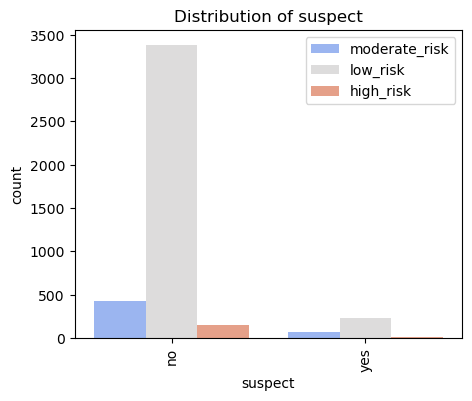

In [27]:
#Visualisations to show distributions for each categorical variable against the target

for column in CATEGORICAL_COLUMNS:
    #make sure that plot only takes the two plots below by using the following command
    plt.figure(figsize=(5,4))
    plt.xticks(rotation=90) 
    # produce a plot for each target label so they interlink
    sns.countplot(x=column, hue='target', palette="coolwarm", data=Disease_data)
    #include a legent
    plt.legend()
    #include a dynamic title
    plt.title("Distribution of " +column)
    #Save the plot to the working directory
    plt.savefig(column+'.jpg')

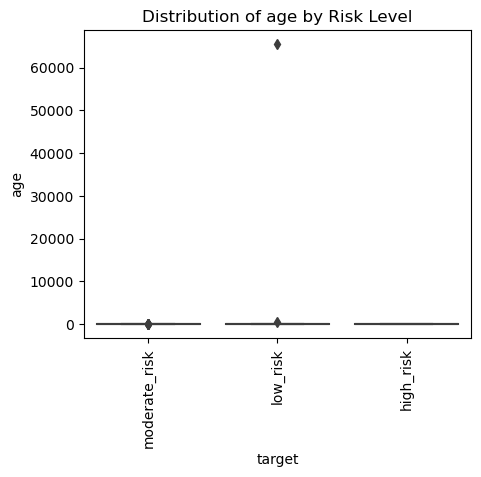

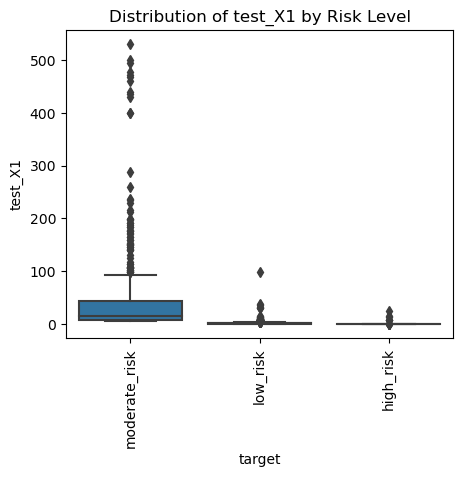

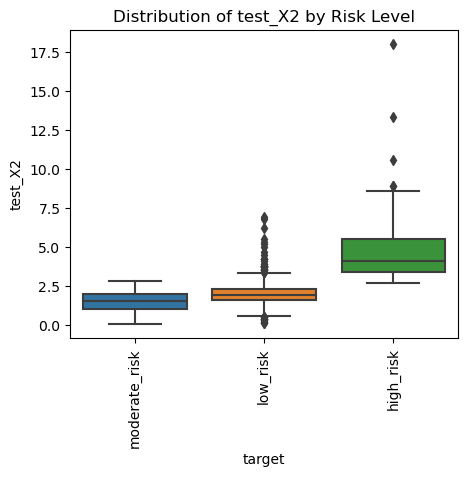

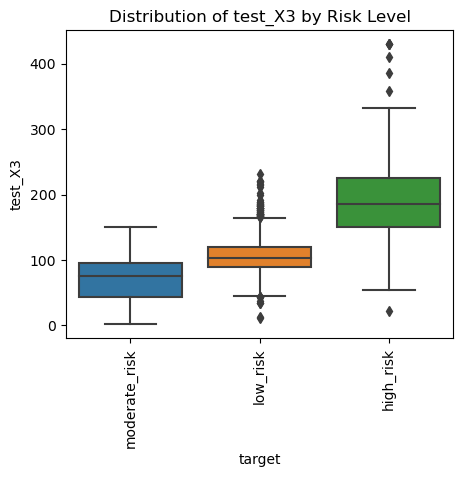

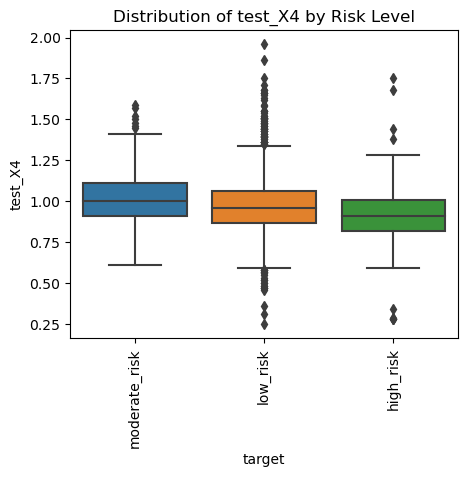

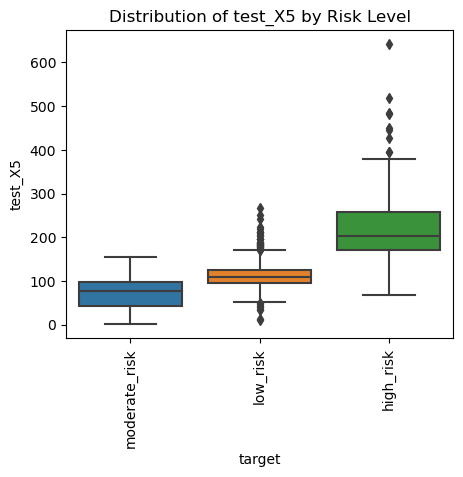

In [28]:
#this visulaisation helps us to see the target column that has the outlier as well and the numerical columns against 
#the target variable
for column in NUMERICAL_COLUMNS:
    if column in Disease_data.columns:
        plt.figure(figsize=(5, 4))
        sns.boxplot(x='target', y=column, data=Disease_data)
        plt.xticks(rotation=90)
        plt.title(f"Distribution of {column} by Risk Level")
        plt.savefig(f"{column}_boxplot.jpg")
        plt.show()
    else:
        print(f"Column {column} not found in data.")

## Analysis Summary of Risk Level Distributions
Key Observations:

Age Distribution:

An extreme outlier in age (>60,000) was identified, suggesting a data entry error in the moderate-risk category. This outlier will be replaced with the median age value to maintain data integrity without skewing the analysis.
Test_X1:

Displays a wide range of values in the moderate-risk group, with numerous outliers. Given that these results stem from medical tests, the variability is considered indicative of different health conditions. Thus, all test values, including outliers, will be retained for modeling to capture all possible health scenarios.
Test_X2 and Test_X3:

Both tests show a clear trend of increasing median values correlating with higher risk levels, making them strong indicators of risk. These trends validate the use of these tests as reliable predictors in the modeling process.
Test_X4:

Indicates a trend with increasing median values associated with higher risk levels but with significant overlap across categories. This test will be used in combination with other metrics for a comprehensive risk assessment.
Test_X5:

Shows significant differentiation in results across risk levels, particularly distinguishing the high-risk category effectively. This test is a key predictor of higher risk and will be prioritized in risk prediction models.
Data Handling Strategy:

Outliers in Test Results: Outliers present in the test results will be included in the modeling to ensure all potential health conditions are considered, acknowledging that extreme test results can reflect critical health states.
Age Outliers: The extreme age value will be replaced with the median to correct for potential data entry errors without compromising the dataset’s overall integrity.
Conclusions:

Tests X2, X3, and X5 are identified as particularly potent markers for assessing risk levels, with clear correlations to higher risk categories.
Incorporating a comprehensive approach that includes these tests will enhance the model's accuracy in predicting patient risk levels.
Rigorous data cleaning specific to age and careful inclusion of test result outliers will ensure that the model is both robust and sensitive to the nuances of the medical data.


### Other Visualisations

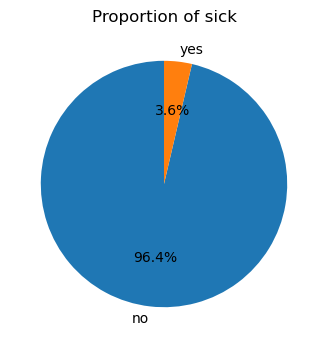

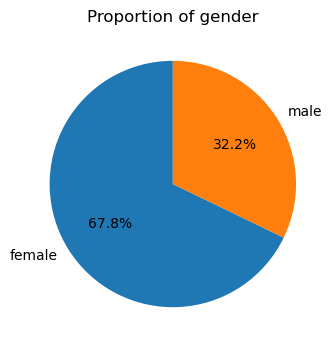

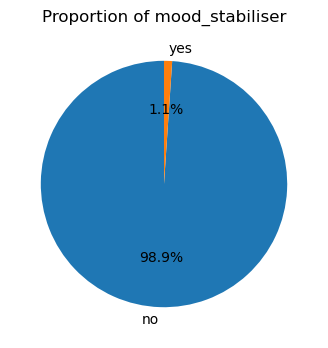

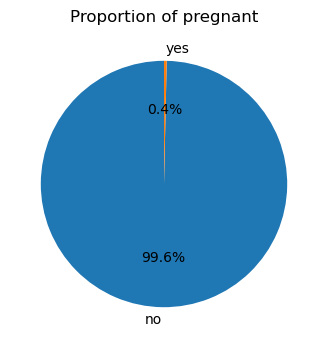

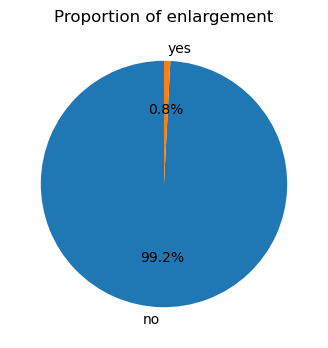

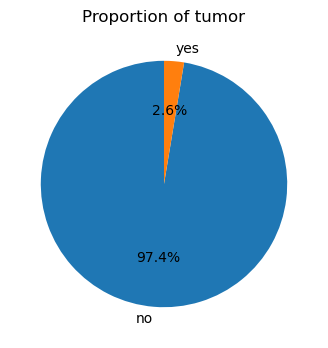

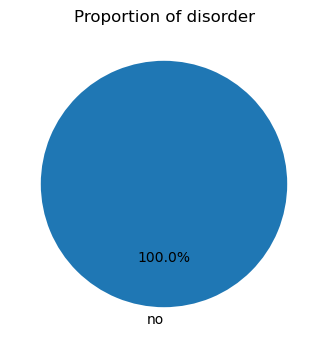

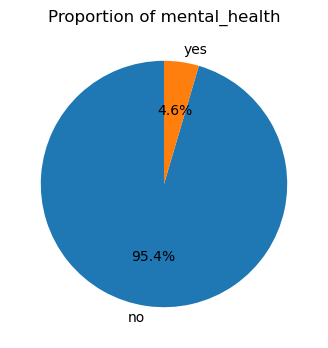

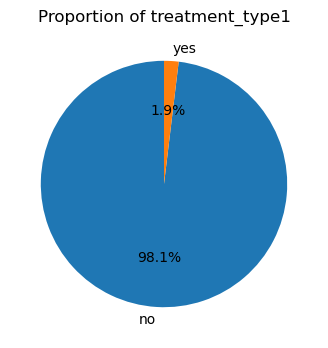

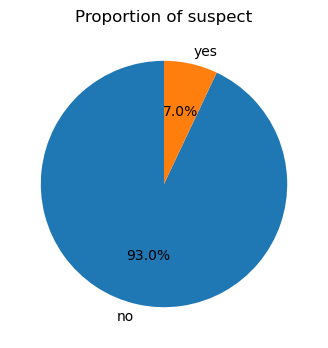

In [29]:
#here we used the binary columns and did a pie chart visualisation
columns = ['sick','gender','mood_stabiliser', 'pregnant', 'enlargement', 'tumor', 'disorder', 
           'mental_health','treatment_type1', 'suspect']
for column in columns:
    plt.figure(figsize=(5, 4))  # Set the figure size
    columns_counts = Disease_data[column].value_counts()  # Get counts of each category

    # Generate a pie chart
    plt.pie(columns_counts, labels=columns_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title("Proportion of " + column)  # Set a dynamic title
    plt.savefig(column + '.jpg')  # Save the plot to the working directory
    plt.show()  # Display the plot

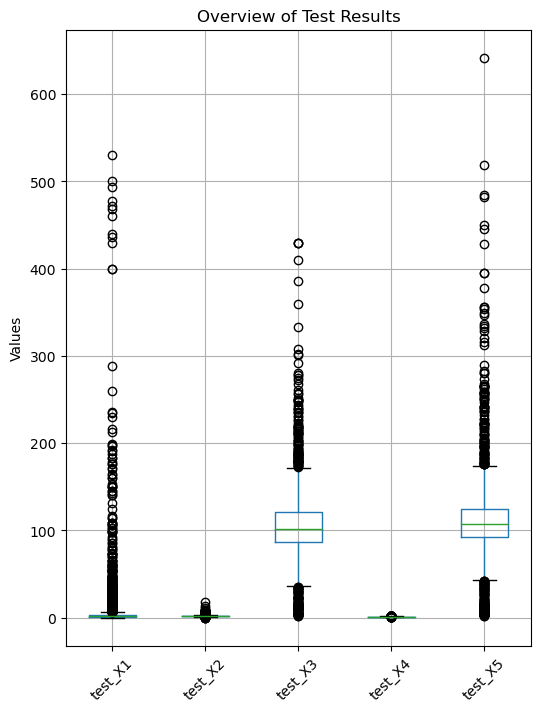

In [30]:
test_columns = ['test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

plt.figure(figsize=(6, 8))
Disease_data.boxplot(column=test_columns)
plt.title('Overview of Test Results')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
#from this visualisation lf only the test columns, you can see that there are some outliers in the columns, but as there 
#test result, it is advisable we dont do anything to the text column outliers

## The boxplot visualization displays results for five tests (Test_X1 to Test_X5), highlighting medians, variability, and outliers:

Tests X1 and X5 show extensive variability with numerous high outliers.
Tests X2, X3, and X4 demonstrate moderate variability, with Test X3 showing a notably higher median.
Outliers across all tests suggest significant atypical values, important for medical insights or indicating potential data issues.

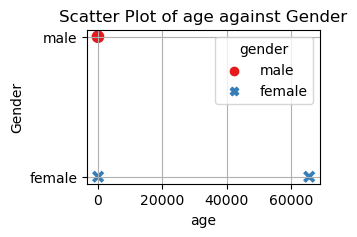

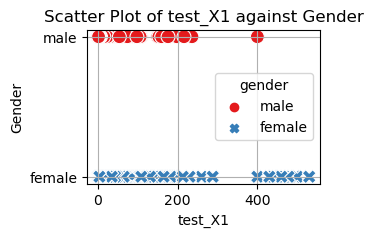

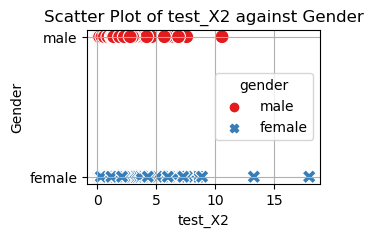

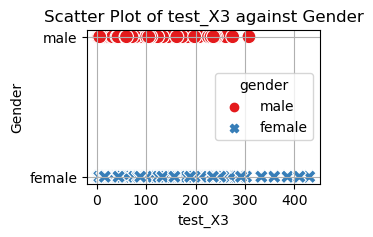

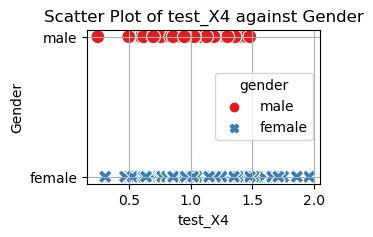

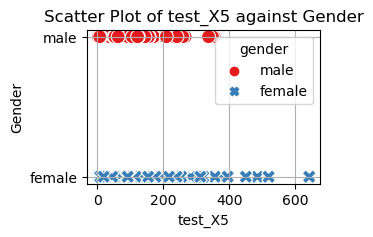

In [31]:
numerical_columns = ['age','test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']  
gender_column = 'gender'  

# Plotting
for col in numerical_columns:
    plt.figure(figsize=(3, 2))  # Adjust the figure size as needed
    sns.scatterplot(data=Disease_data, x=col, y='gender', hue='gender', style='gender', palette='Set1', s=100)
    plt.title(f'Scatter Plot of {col} against Gender')
    plt.xlabel(col)
    plt.ylabel('Gender')
    plt.grid(True)  
    plt.show()

In [32]:
Disease_data

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...     ...     ...  ...      ...      ...      ...      ...      ...   
PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

        test_X5 concern_type1  ... tumor disorder medication_A medication_B  \
id                             ...                                            
PA1001    105.0            no  ...    no       no           no           no   
PA1002    104.0            no  ...    no       no          yes           no   
PA1003     44.0            no  ...    no       no           no           no   
PA1004    108.0            no  ...    no       no           no           no   
PA1005      NaN            no  ...    no       no           no           no   
...         ...           ...  ...   ...      ...          ...          ...   
PA5246    122.0            no  ...    no       no           no           no   
PA5247     19.0            no  ...    no       no           no           no   
PA5248     92.0            no  ...    no       no           no           no   
PA5249    154.0            no  ...    no       no           no           no   
PA5250     63.0            no  ...    no       no           no           no   

       mental_health mood_stabiliser surgery treatment_type1 suspect  \
id                                                                     
PA1001            no              no      no              no      no   
PA1002            no             yes      no              no      no   
PA1003            no              no      no              no      no   
PA1004            no              no      no              no      no   
PA1005            no              no      no              no      no   
...              ...             ...     ...             ...     ...   
PA5246            no              no      no              no      no   
PA5247            no              no      no              no      no   
PA5248            no              no      no              no      no   
PA5249            no              no      no              no      no   
PA5250            no              no      no              no      no   

               target  
id                     
PA1001  moderate_risk  
PA1002       low_risk  
PA1003  moderate_risk  
PA1004       low_risk  
PA1005       low_risk  
...               ...  
PA5246       low_risk  
PA5247  moderate_risk  
PA5248       low_risk  
PA5249       low_risk  
PA5250       low_risk  

[4250 rows x 22 columns]

<Figure size 600x600 with 0 Axes>

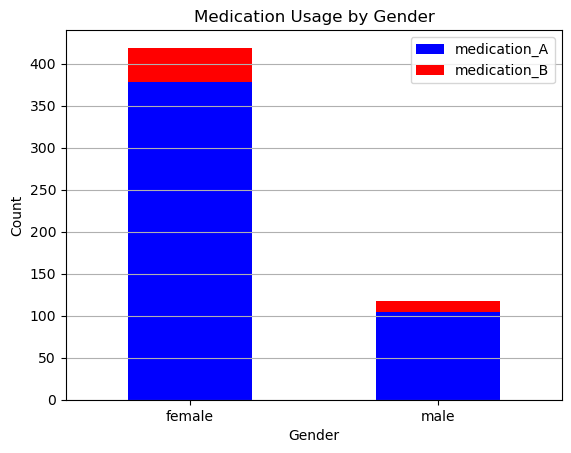

In [33]:
medication_data = Disease_data.groupby('gender')[['medication_A', 'medication_B']].apply(lambda x: x.eq('yes').sum())

plt.figure(figsize=(6, 6))
medication_data.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Medication Usage by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

## Data Cleaning

In [34]:
Disease_data

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...     ...     ...  ...      ...      ...      ...      ...      ...   
PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

        test_X5 concern_type1  ... tumor disorder medication_A medication_B  \
id                             ...                                            
PA1001    105.0            no  ...    no       no           no           no   
PA1002    104.0            no  ...    no       no          yes           no   
PA1003     44.0            no  ...    no       no           no           no   
PA1004    108.0            no  ...    no       no           no           no   
PA1005      NaN            no  ...    no       no           no           no   
...         ...           ...  ...   ...      ...          ...          ...   
PA5246    122.0            no  ...    no       no           no           no   
PA5247     19.0            no  ...    no       no           no           no   
PA5248     92.0            no  ...    no       no           no           no   
PA5249    154.0            no  ...    no       no           no           no   
PA5250     63.0            no  ...    no       no           no           no   

       mental_health mood_stabiliser surgery treatment_type1 suspect  \
id                                                                     
PA1001            no              no      no              no      no   
PA1002            no             yes      no              no      no   
PA1003            no              no      no              no      no   
PA1004            no              no      no              no      no   
PA1005            no              no      no              no      no   
...              ...             ...     ...             ...     ...   
PA5246            no              no      no              no      no   
PA5247            no              no      no              no      no   
PA5248            no              no      no              no      no   
PA5249            no              no      no              no      no   
PA5250            no              no      no              no      no   

               target  
id                     
PA1001  moderate_risk  
PA1002       low_risk  
PA1003  moderate_risk  
PA1004       low_risk  
PA1005       low_risk  
...               ...  
PA5246       low_risk  
PA5247  moderate_risk  
PA5248       low_risk  
PA5249       low_risk  
PA5250       low_risk  

[4250 rows x 22 columns]

In [35]:
#checking the duplicates, we observed that it is not as a result of data entry error,so we are not dropping them, 
#because the ids are different, so its different data for different people
duplicates = Disease_data.duplicated()
print(duplicates.sum())
print(Disease_data[duplicates])

40
        age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA1542   41  female   no       no      NaN      NaN      NaN      NaN   
PA1745   41    male   no       no      NaN      NaN      NaN      NaN   
PA1872   24  female   no       no      NaN      NaN      NaN      NaN   
PA2492   70  female   no       no      NaN      NaN      NaN      NaN   
PA2531   65  female   no       no      NaN      NaN      NaN      NaN   
PA2615   70  female   no       no      NaN      NaN      NaN      NaN   
PA2788   41  female   no       no      NaN      NaN      NaN      NaN   
PA2862   57  female   no       no      NaN      NaN      NaN      NaN   
PA2868   32  female   no       no      NaN      NaN      NaN      NaN   
PA2930   65  female   no       no      NaN      NaN      NaN      NaN   
PA2998   39  female   no       no      NaN      NaN      NaN      NaN   
PA3075   28  female   no       no      NaN      

In [36]:
# we have earlier dropped the text_6 column as a result of a lot of missing values in the columns,
#checking the null values
null_counts = Disease_data.isnull().sum()
print(null_counts)

age                   0
gender              141
sick                  0
pregnant              0
test_X1             411
test_X2            1243
test_X3             216
test_X4             392
test_X5             387
concern_type1         0
concern_type2         0
enlargement           0
tumor                 0
disorder              0
medication_A          0
medication_B          0
mental_health         0
mood_stabiliser       0
surgery               0
treatment_type1       0
suspect               0
target                0
dtype: int64


In [37]:
#we have earlier seen the various outliers in the different boxes while doing some of the visulaisations above, 
#but we realised that age had a very far outlier, which we will replace with the median

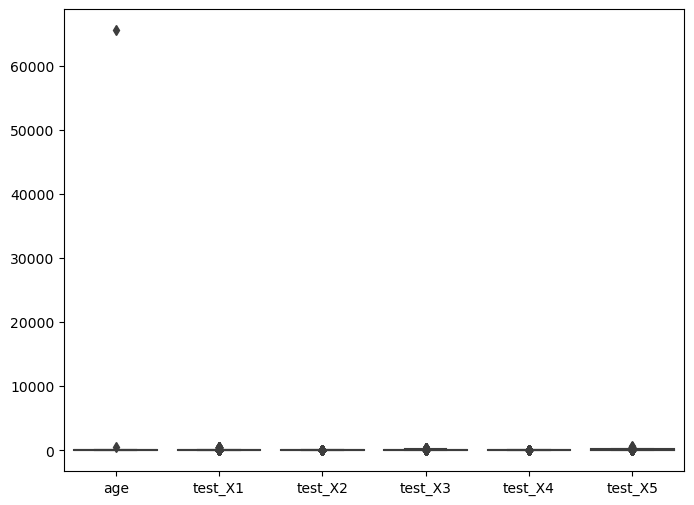

In [38]:
#just to show this again, so we can see the obvious outlier in age column
plt.figure(figsize=(8,6))
sns.boxplot(data=Disease_data)
plt.show()

<Axes: xlabel='test_X1', ylabel='test_X2'>

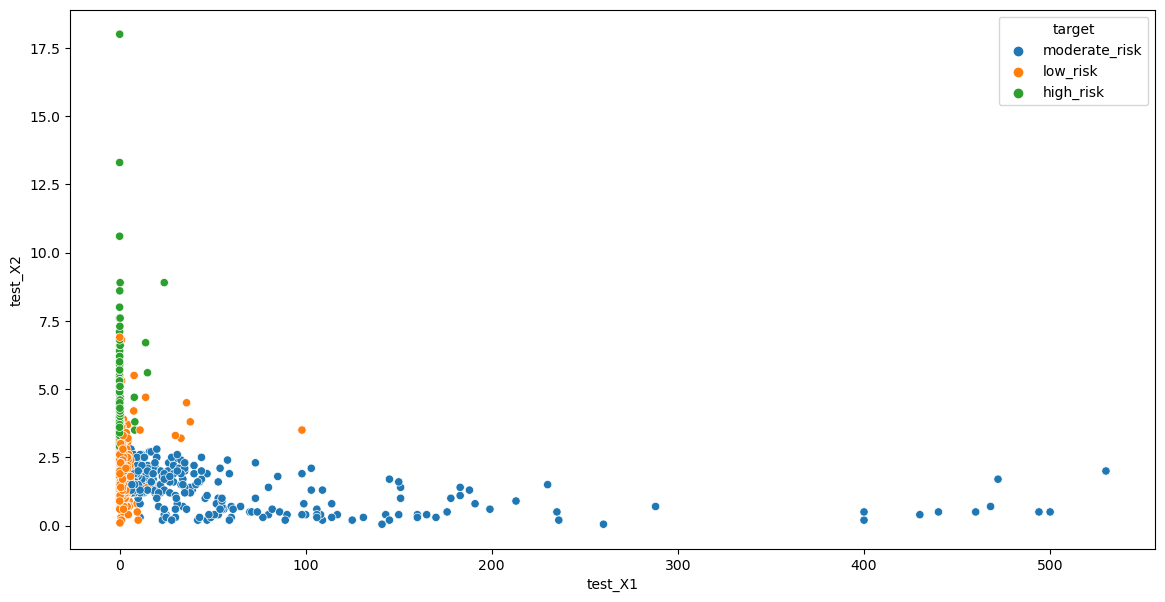

In [39]:
#using scatter plot, we are going to explicitly check the outliers ina ll the numerical columns
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=Disease_data['test_X1'], y=Disease_data['test_X2'],hue=Disease_data['target'])

<Axes: xlabel='test_X3', ylabel='test_X4'>

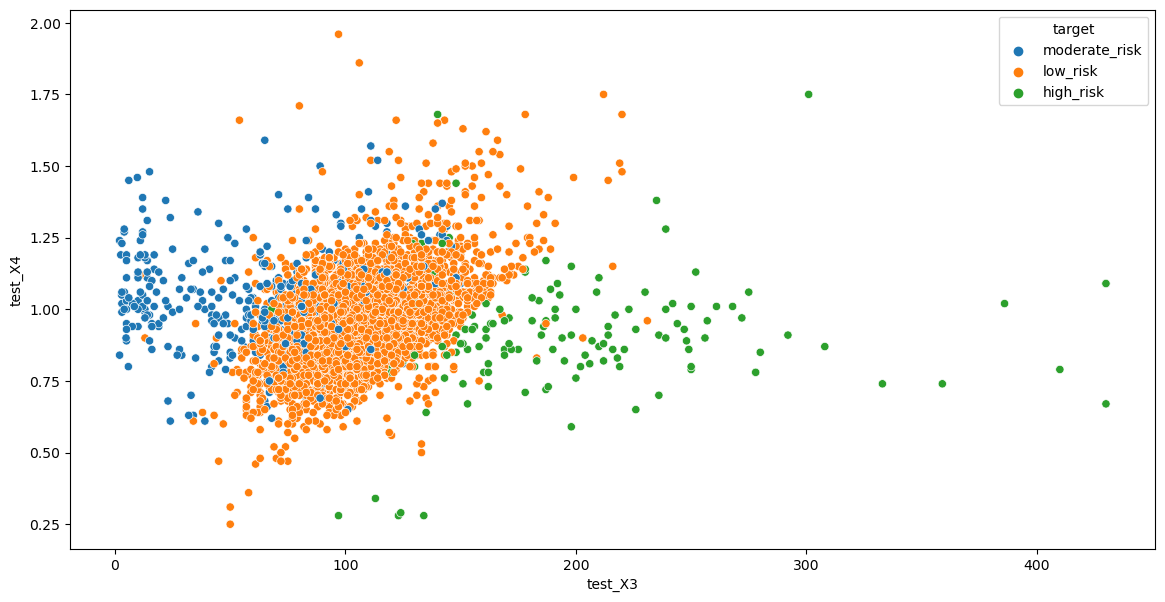

In [40]:
#using scatter plot to check
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=Disease_data['test_X3'], y=Disease_data['test_X4'],hue=Disease_data['target'])

<Axes: xlabel='test_X5', ylabel='test_X4'>

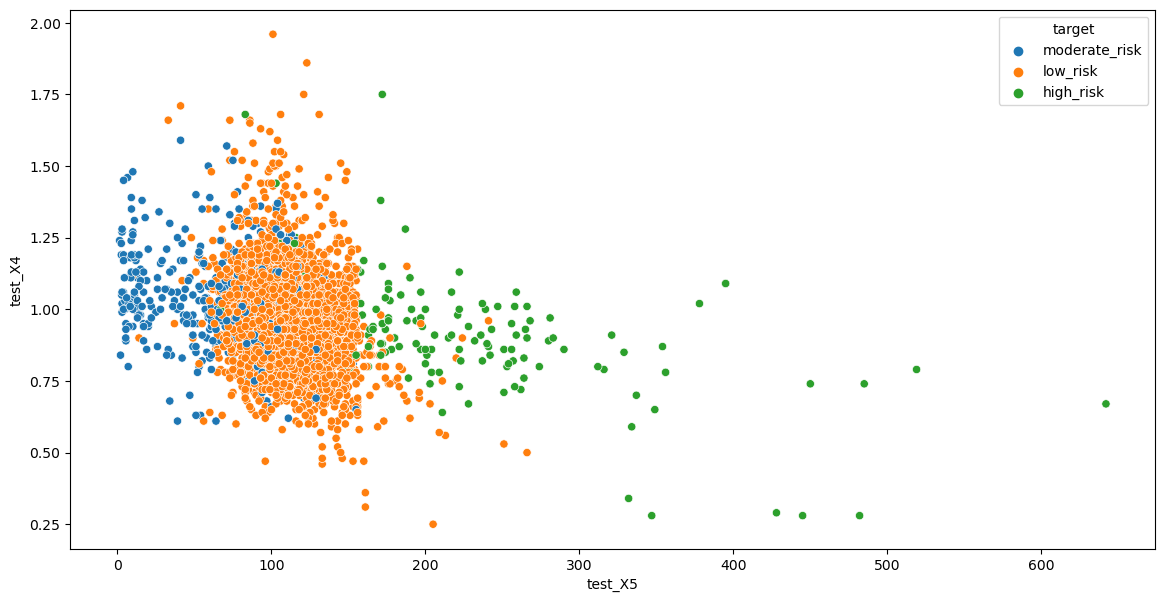

In [41]:
#using scatter plot to check
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=Disease_data['test_X5'], y=Disease_data['test_X4'],hue=Disease_data['target'])

<Axes: xlabel='age', ylabel='test_X2'>

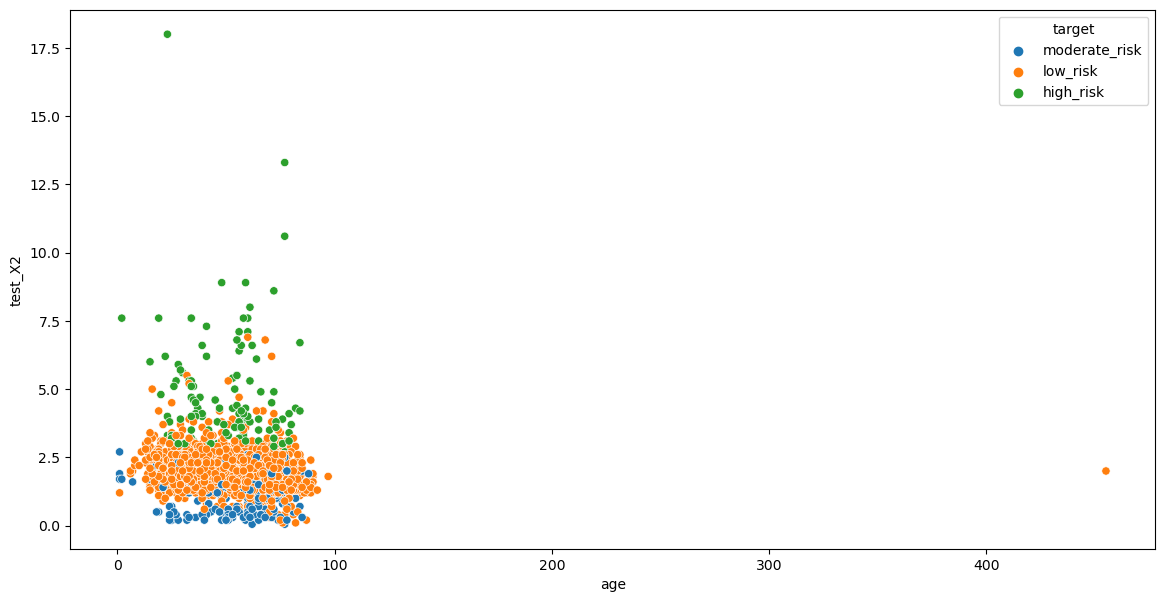

In [42]:
#using scatter plot to check
# Set the width and height of the figure
plt.figure(figsize=(14,7))
sns.scatterplot(x=Disease_data['age'], y=Disease_data['test_X2'],hue=Disease_data['target'])

### Scatter Plots Observations:
Outliers in Relation to Risk:

In the scatter plots, the data points are color-coded by risk level (low, moderate, high). The distribution of risk seems to correlate with the values of the tests. For instance, in some plots, higher test values appear to correspond to a higher risk level.
Outliers are especially noticeable in the first scatter plot (test_X1 vs. test_X2). Some data points are significantly distant from the main cluster. These points represent values that are unusually high or low compared to the rest and could be potential outliers or exceptional cases.
Relationship Between Tests:

The second and third scatter plots (test_X3 vs. test_X4 and test_X5) show a dense cluster of data points around the low to moderate test result values, which suggests a relationship between the tests. There’s a spread of data points as the values increase, which might indicate variability in the test results or a less direct relationship.
The fourth plot (age vs. test_X2) shows a different pattern compared to the other scatter plots. The age-related outliers are particularly pronounced, which may suggest errors or exceptional age entries.

### Taking care of missing values

In [43]:
# get the number of missing data points per column
missing_values_count = Disease_data.isnull().sum()

missing_values_count

age                   0
gender              141
sick                  0
pregnant              0
test_X1             411
test_X2            1243
test_X3             216
test_X4             392
test_X5             387
concern_type1         0
concern_type2         0
enlargement           0
tumor                 0
disorder              0
medication_A          0
medication_B          0
mental_health         0
mood_stabiliser       0
surgery               0
treatment_type1       0
suspect               0
target                0
dtype: int64

In [44]:
#recall that we have earlier dropped text 6, when we observed earlier that there is a lot of missing values,
#for the rest of the missing values we have to find the right method to take care of them.
Disease_data

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA1001   59    male   no       no      7.8      NaN     89.0     0.85   
PA1002   48  female   no       no      1.5      2.5    101.0     0.97   
PA1003   77    male   no       no      7.3      1.2     57.0     1.28   
PA1004   42  female   no       no      1.2      2.5    106.0     0.98   
PA1005   38  female   no       no      0.6      1.9     95.0      NaN   
...     ...     ...  ...      ...      ...      ...      ...      ...   
PA5246   29    male   no       no      0.5      2.3    105.0     0.86   
PA5247   46  female   no       no     35.0      1.2     16.0     0.86   
PA5248   72  female   no       no      3.4      2.1     88.0     0.96   
PA5249   94  female   no       no      3.9      NaN    157.0     1.02   
PA5250   41    male   no       no      1.8      2.8     60.0     0.95   

        test_X5 concern_type1  ... tumor disorder medication_A medication_B  \
id                             ...                                            
PA1001    105.0            no  ...    no       no           no           no   
PA1002    104.0            no  ...    no       no          yes           no   
PA1003     44.0            no  ...    no       no           no           no   
PA1004    108.0            no  ...    no       no           no           no   
PA1005      NaN            no  ...    no       no           no           no   
...         ...           ...  ...   ...      ...          ...          ...   
PA5246    122.0            no  ...    no       no           no           no   
PA5247     19.0            no  ...    no       no           no           no   
PA5248     92.0            no  ...    no       no           no           no   
PA5249    154.0            no  ...    no       no           no           no   
PA5250     63.0            no  ...    no       no           no           no   

       mental_health mood_stabiliser surgery treatment_type1 suspect  \
id                                                                     
PA1001            no              no      no              no      no   
PA1002            no             yes      no              no      no   
PA1003            no              no      no              no      no   
PA1004            no              no      no              no      no   
PA1005            no              no      no              no      no   
...              ...             ...     ...             ...     ...   
PA5246            no              no      no              no      no   
PA5247            no              no      no              no      no   
PA5248            no              no      no              no      no   
PA5249            no              no      no              no      no   
PA5250            no              no      no              no      no   

               target  
id                     
PA1001  moderate_risk  
PA1002       low_risk  
PA1003  moderate_risk  
PA1004       low_risk  
PA1005       low_risk  
...               ...  
PA5246       low_risk  
PA5247  moderate_risk  
PA5248       low_risk  
PA5249       low_risk  
PA5250       low_risk  

[4250 rows x 22 columns]

In [45]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Define the data to be filled as X, we can pass the whole data frame and apply our new class
x = Disease_data
New_Disease_data = DataFrameImputer().fit_transform(x)

print('before...')
#Let us see missing value for the train data before
missing_val_count_by_column = (x.isnull().sum())
print('Missing columns for the  data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#and after
print('after...')
missing_val_count_by_column = (New_Disease_data.isnull().sum())
print('Missing columns for the  data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

before...
Missing columns for the  data:
 gender      141
test_X1     411
test_X2    1243
test_X3     216
test_X4     392
test_X5     387
dtype: int64
after...
Missing columns for the  data:
 Series([], dtype: int64)


In [46]:
#descriptive analysis of the data when it still has missing values
Disease_data.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   4250.000000  3839.000000  3007.000000  4034.000000  3858.000000   
mean      67.374824     7.342463     2.035580   104.919623     0.970846   
std     1004.518821    32.657963     0.920404    35.496255     0.162474   
min        1.000000     0.005000     0.050000     2.000000     0.250000   
25%       37.000000     0.600000     1.600000    87.000000     0.870000   
50%       55.000000     1.500000     1.900000   102.000000     0.960000   
75%       67.000000     3.000000     2.300000   121.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  3863.000000  
mean    110.090834  
std      39.837621  
min       1.400000  
25%      92.000000  
50%     107.000000  
75%     125.000000  
max     642.000000

In [47]:
#descriptive analysis of the data when missing values has been imputed
#after imputing, we can see that the mean values are still the same and there is no extremely high 
#difference in the median values
New_Disease_data.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean      67.374824     7.342463     2.035580   104.919623     0.970846   
std     1004.518821    31.038321     0.774158    34.582253     0.154798   
min        1.000000     0.005000     0.050000     2.000000     0.250000   
25%       37.000000     0.700000     1.700000    88.000000     0.880000   
50%       55.000000     1.700000     2.035580   104.000000     0.970846   
75%       67.000000     4.500000     2.100000   120.000000     1.050000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  4250.000000  
mean    110.090834  
std      37.980106  
min       1.400000  
25%      94.000000  
50%     110.000000  
75%     123.000000  
max     642.000000

In [48]:
#import the relevant methods
from sklearn.impute import KNNImputer
nan = np.nan

KNN_data= Disease_data[NUMERICAL_COLUMNS]
#Apply KNN imputer
imputer = KNNImputer(n_neighbors=1, weights="uniform")
ImputedX=imputer.fit_transform(KNN_data)

# Convert output to a data frame to show the stats
dataframe = pd.DataFrame.from_records(ImputedX)
dataframe.describe() 

0            1            2            3            4  \
count   4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean      67.374824     7.888808     2.043692   104.716885     0.970857   
std     1004.518821    33.404592     0.877084    34.951267     0.162143   
min        1.000000     0.005000     0.050000     2.000000     0.250000   
25%       37.000000     0.600000     1.600000    87.000000     0.870000   
50%       55.000000     1.500000     1.900000   102.000000     0.960000   
75%       67.000000     3.075000     2.300000   120.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

                 5  
count  4250.000000  
mean    109.752656  
std      38.731521  
min       1.400000  
25%      92.000000  
50%     107.000000  
75%     124.000000  
max     642.000000

## checking for outliers

In [49]:
#data to check outlier
outlier_data= New_Disease_data[NUMERICAL_COLUMNS]
outlier_data.shape

(4250, 6)

In [50]:
#import the implementation of this algorihm from sklearn
from sklearn.cluster import DBSCAN

#Use the algorithm for outlier detection, the retun in clusters will show the membership of each point
#Any point labelled as -1 is an outlier

outlier_detection = DBSCAN(min_samples = 10, eps = 10)
clusters = outlier_detection.fit_predict(outlier_data)

#Count total number of outliers as count of those labelled as -1
TotalOutliers=list(clusters).count(-1)
#print (clusters)
print("Total number of outliers identified is: ",TotalOutliers)

Total number of outliers identified is:  581


In [51]:
#import the implementation of this algorihm from sklearn
from sklearn.ensemble import IsolationForest

#Use the algorithm for outlier detection, then use it to predict each point
#Any point labelled as -1 is an outlier
clf = IsolationForest(max_samples=3158, random_state = 2, contamination= 0.01)
preds = clf.fit_predict(outlier_data)
#print(preds)
totalOutliers=0
for pred in preds:
    if pred == -1:
        totalOutliers=totalOutliers+1
print("Total number of outliers identified is: ",totalOutliers)

Total number of outliers identified is:  43


Number of predicted outliers: 43


C:\Users\chibu\AppData\Local\Temp\ipykernel_26964\2628789563.py:42: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [12]
C:\Users\chibu\AppData\Local\Temp\ipykernel_26964\2628789563.py:43: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


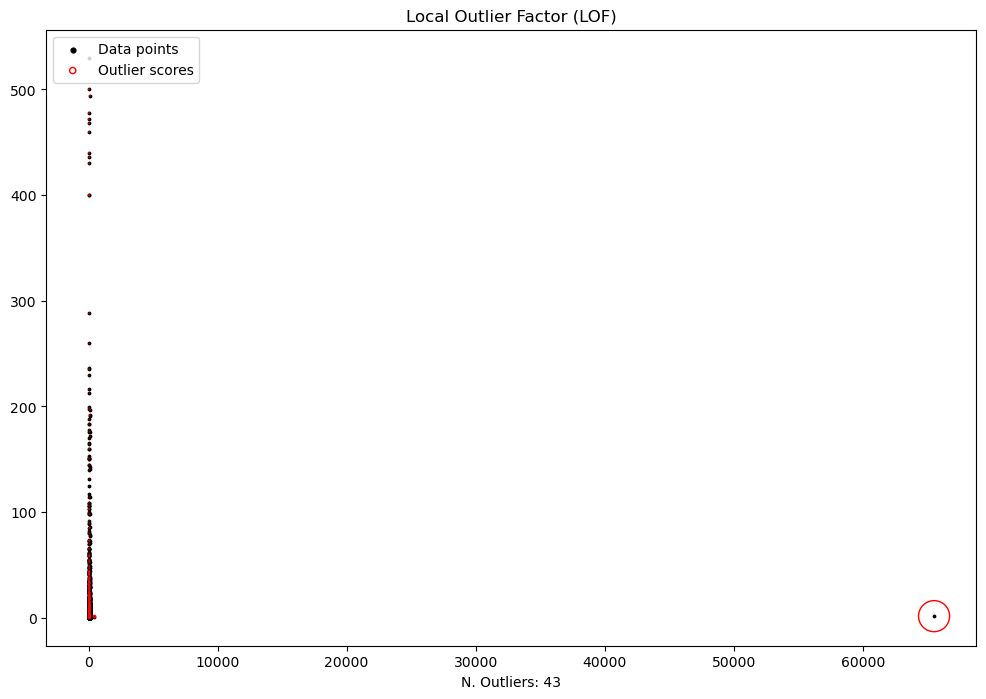

In [52]:
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(42)

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=25, contamination=0.01)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(outlier_data)

#print ("Predicted outliers: \n",y_pred)

#Calculate number of outliers
outlierN = len([i for i in y_pred if i == -1])
print ("Number of predicted outliers:",outlierN)


#Let us see graphically how the outliers are identified
#Use outlier scores calculated by the algorithm to plot a circle around the outlier proportional to score.

X_scores = clf.negative_outlier_factor_

plt.figure(figsize=(12,8))
plt.title("Local Outlier Factor (LOF)")

#Convert the df to an array for the purpose of the scatterplot
Xol = outlier_data.to_numpy()

#Use scatter 
plt.scatter(Xol[:, 0], Xol[:, 1], color='k', s=3, label='Data points')

# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(Xol[:, 0], Xol[:, 1], s=500 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
#plt.xlim((0, 14))
#plt.ylim((0, 6))
plt.xlabel("N. Outliers: %d" % (outlierN))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [12]
legend.legendHandles[1]._sizes = [20]
plt.show()

### Outlier Detection Method
I applied three distinct outlier detection methods—DBSCAN, Isolation Forest, and Local Outlier Factor (LOF)—to understand the distribution of anomalies in our dataset. DBSCAN uses min_samples=10 and eps=10 to define dense clusters, effectively identifying outliers in sparse regions. Isolation Forest, employing max_samples=31258, contamination=0.01, and random_state=2, isolates anomalies through random feature selection and splitting, with the contamination rate adjusting sensitivity. Local Outlier Factor (LOF) utilizes n_neighbors=25 and contamination=0.01 to measure local density deviations, flagging significantly less dense points as outliers. The aim of this analysis is not to remove all detected outliers but to understand how each method characterizes them. This knowledge is crucial as our model needs to be robust enough to handle outliers effectively in real-world scenarios. Using various outlier detection methods allows for a comprehensive assessment of anomalies. This diversity in approaches ensures that we capture a broad spectrum of outliers, enhancing the robustness of our data analysis. Each detection method provides a unique perspective on identifying outliers, and their combined application offers a thorough exploration of potential data irregularities. This approach not only helps in fine-tuning our analysis but also in building models that are resilient in diverse conditions.

In [53]:
#we will still have to replace the  obvious oulier in age  with the mean value, 
#but i will do this after i have splitted the data

### Balancing the data

<Axes: xlabel='target', ylabel='count'>

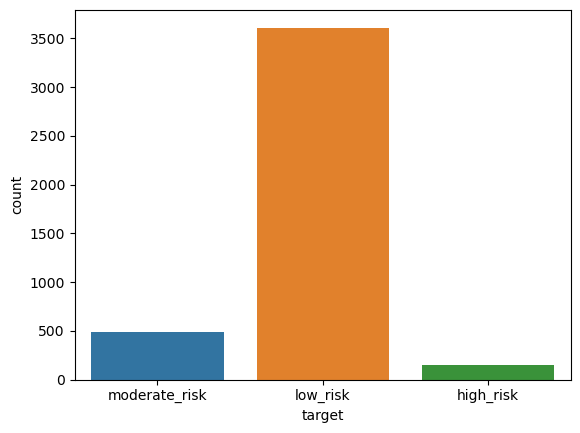

In [54]:
#Show distribution of the class on whole dataset
sns.countplot(x='target', data=New_Disease_data)

In [55]:
#for balancing we use the count to either know if we are up sampling or down sampling and we will also use the smote method
#check from the above visualisation if it needs balancing
#we will balance the train test data and leave the rest, so the model can learn from the train so well, so we will balance after we have splitted

In [56]:
#before encoding, lets designate the target as y
Y=New_Disease_data['target']
Y

id
PA1001    moderate_risk
PA1002         low_risk
PA1003    moderate_risk
PA1004         low_risk
PA1005         low_risk
              ...      
PA5246         low_risk
PA5247    moderate_risk
PA5248         low_risk
PA5249         low_risk
PA5250         low_risk
Name: target, Length: 4250, dtype: object

In [57]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
New_Disease_data['target']= label_encoder.fit_transform(New_Disease_data['target']) 
  
New_Disease_data['target'].unique()

array([2, 1, 0])

In [58]:
#after encoding
#Designate the outcome as Y
Y=New_Disease_data['target']
Y

id
PA1001    2
PA1002    1
PA1003    2
PA1004    1
PA1005    1
         ..
PA5246    1
PA5247    2
PA5248    1
PA5249    1
PA5250    1
Name: target, Length: 4250, dtype: int32

# Sampling the data (train & validation split)

Now, let us do some sampling.  This is necessary before running any machine learning algorithms.  We normally need at least a two dataset. Let us divide by train/validation to see how we may use the validation set.

We create those with stratification as then we are guaranteed a balance of y labels in each set. We use stratification on the target variable 'species'. We can specify the size of the validation set.  The training set size will be the compliment of this. 

In [59]:
#before splitting, just to crosscheck that all column has no missing values
New_Disease_data.isnull().sum()

age                0
gender             0
sick               0
pregnant           0
test_X1            0
test_X2            0
test_X3            0
test_X4            0
test_X5            0
concern_type1      0
concern_type2      0
enlargement        0
tumor              0
disorder           0
medication_A       0
medication_B       0
mental_health      0
mood_stabiliser    0
surgery            0
treatment_type1    0
suspect            0
target             0
dtype: int64

In [60]:
#Designate the input features as X of the new data thay has no missing values
#Also since we have checked for the missing value, as we have seen that the target column has not missing values, 
#we will be working on the other columns aside the target columns to fix the missing values
#Designate the input features as X
Disease_features=["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                "tumor", "disorder", "medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                "surgery", "treatment_type1", "suspect","age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5"]
X= New_Disease_data[Disease_features]
X

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA1001    male   no       no            no           yes          no    no   
PA1002  female   no       no            no            no          no    no   
PA1003    male   no       no            no            no          no    no   
PA1004  female   no       no            no            no          no    no   
PA1005  female   no       no            no            no          no    no   
...        ...  ...      ...           ...           ...         ...   ...   
PA5246    male   no       no            no            no          no    no   
PA5247  female   no       no            no           yes          no    no   
PA5248  female   no       no            no            no          no    no   
PA5249  female   no       no            no            no          no    no   
PA5250    male   no       no            no            no          no    no   

       disorder medication_A medication_B  ... mood_stabiliser surgery  \
id                                         ...                           
PA1001       no           no           no  ...              no      no   
PA1002       no          yes           no  ...             yes      no   
PA1003       no           no           no  ...              no      no   
PA1004       no           no           no  ...              no      no   
PA1005       no           no           no  ...              no      no   
...         ...          ...          ...  ...             ...     ...   
PA5246       no           no           no  ...              no      no   
PA5247       no           no           no  ...              no      no   
PA5248       no           no           no  ...              no      no   
PA5249       no           no           no  ...              no      no   
PA5250       no           no           no  ...              no      no   

       treatment_type1 suspect age  test_X1  test_X2  test_X3   test_X4  \
id                                                                        
PA1001              no      no  59      7.8  2.03558     89.0  0.850000   
PA1002              no      no  48      1.5  2.50000    101.0  0.970000   
PA1003              no      no  77      7.3  1.20000     57.0  1.280000   
PA1004              no      no  42      1.2  2.50000    106.0  0.980000   
PA1005              no      no  38      0.6  1.90000     95.0  0.970846   
...                ...     ...  ..      ...      ...      ...       ...   
PA5246              no      no  29      0.5  2.30000    105.0  0.860000   
PA5247              no      no  46     35.0  1.20000     16.0  0.860000   
PA5248              no      no  72      3.4  2.10000     88.0  0.960000   
PA5249              no      no  94      3.9  2.03558    157.0  1.020000   
PA5250              no      no  41      1.8  2.80000     60.0  0.950000   

           test_X5  
id                  
PA1001  105.000000  
PA1002  104.000000  
PA1003   44.000000  
PA1004  108.000000  
PA1005  110.090834  
...            ...  
PA5246  122.000000  
PA5247   19.000000  
PA5248   92.000000  
PA5249  154.000000  
PA5250   63.000000  

[4250 rows x 21 columns]

In [61]:
Y

id
PA1001    2
PA1002    1
PA1003    2
PA1004    1
PA1005    1
         ..
PA5246    1
PA5247    2
PA5248    1
PA5249    1
PA5250    1
Name: target, Length: 4250, dtype: int32

### Dataset Splitting Strategy: 80/20 Training and Validation Split
For our machine learning model development, we've opted for an 80/20 split between the training and validation sets. This decision balances maximizing our training data, with 3,400 observations, to effectively capture complex patterns, while dedicating 850 observations to the validation set, ensuring robust model performance evaluation. This split prevents underfitting and overfitting, maintaining an optimal balance for model robustness and accuracy assessment. The 80/20 split is widely recognized as a best practice in data science, especially for datasets of moderate size like ours. Preliminary tests confirmed that this ratio provides the best compromise between training capacity and validation accuracy, making it the ideal choice for achieving reliable and generalizable model predictions.

In [62]:
#we will be dividing our train data into train and validation, as we already have a test data given to us
from sklearn.model_selection import train_test_split

#  X and Y are  feature matrix and target vector respectively
# Splitting the data into training and validation sets with stratification 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [63]:
print("Train set description \n", X_train.describe())
print("Validation set description \n",X_val.describe())

Train set description 
                 age      test_X1      test_X2      test_X3      test_X4  \
count   3400.000000  3400.000000  3400.000000  3400.000000  3400.000000   
mean      71.331765     7.496246     2.044992   104.904563     0.974007   
std     1123.044449    32.134074     0.793819    34.023339     0.158013   
min        1.000000     0.005000     0.050000     2.000000     0.280000   
25%       37.000000     0.700000     1.800000    88.000000     0.880000   
50%       55.000000     1.700000     2.035580   104.000000     0.970846   
75%       67.000000     4.600000     2.200000   120.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  3400.000000  
mean    109.826175  
std      38.401835  
min       1.400000  
25%      93.000000  
50%     110.000000  
75%     122.250000  
max     642.000000  
Validation set description 
               age     test_X1     test_X2     test_X3     test_X4     test_X5
coun

In [64]:
print("Train data:",X_train.shape)
print("Val data:",X_val.shape)
print("Train data:",Y_train.describe())
print("Val data:",Y_val.describe())

Train data: (3400, 21)
Val data: (850, 21)
Train data: count    3400.000000
mean        1.080000
std         0.379002
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: target, dtype: float64
Val data: count    850.000000
mean       1.080000
std        0.379945
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: target, dtype: float64


<Axes: xlabel='target', ylabel='count'>

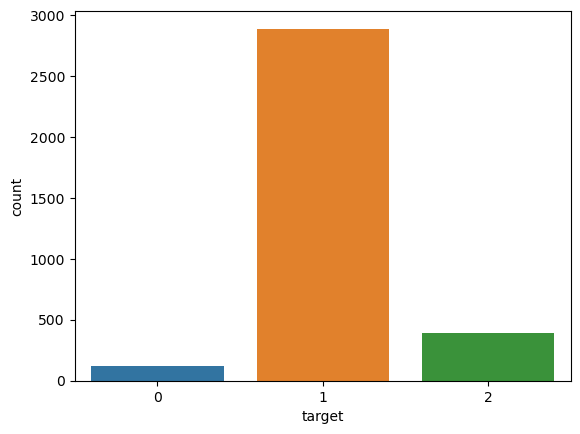

In [65]:
#visualisation of the target variable of the train data as we will be balancing 
sns.countplot(x=Y_train,data=X_train)

In [66]:
Y_train.value_counts()

target
1    2890
2     391
0     119
Name: count, dtype: int64

In [67]:
#naming the train data
train_data = pd.concat([X_train, Y_train], axis=1)
train_data.head()

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1750  female   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA4290  female   no       no            no           yes          no    no   
PA3392  female   no       no            no            no          no    no   

       disorder medication_A medication_B  ... surgery treatment_type1  \
id                                         ...                           
PA2489       no           no           no  ...      no              no   
PA1750       no           no           no  ...      no              no   
PA1471       no           no           no  ...      no              no   
PA4290       no           no           no  ...      no              no   
PA3392       no           no           no  ...      no              no   

       suspect age test_X1  test_X2  test_X3  test_X4  test_X5  target  
id                                                                      
PA2489      no  30   2.000      3.5    120.0     1.18    102.0       1  
PA1750      no  25  26.400      2.3     73.0     1.09     67.0       2  
PA1471      no  38   0.400      2.4    102.0     1.12     92.0       1  
PA4290      no  55   0.035      4.4    195.0     0.82    237.0       0  
PA3392      no  70   2.800      2.4    111.0     0.80    139.0       1  

[5 rows x 22 columns]

In [68]:
#naming the validation data
val_data = pd.concat([X_val, Y_val], axis=1)
val_data.head()

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                          
PA3443   male   no       no            no            no          no    no   
PA3880   male   no       no           yes            no          no    no   
PA3806   male   no       no            no            no          no    no   
PA2205   male   no       no            no            no          no    no   
PA2208   male   no       no            no            no          no    no   

       disorder medication_A medication_B  ... surgery treatment_type1  \
id                                         ...                           
PA3443       no           no           no  ...      no              no   
PA3880       no           no           no  ...      no              no   
PA3806       no           no           no  ...      no              no   
PA2205       no           no           no  ...      no              no   
PA2208       no           no           no  ...      no              no   

       suspect age test_X1  test_X2  test_X3  test_X4  test_X5  target  
id                                                                      
PA3443      no  50     1.0  2.00000    101.0     0.94    108.0       1  
PA3880      no  56     2.4  2.03558    101.0     0.79    128.0       1  
PA3806      no  70     1.8  1.50000     59.0     0.79     75.0       1  
PA2205      no  61     1.5  2.30000    104.0     0.92    113.0       1  
PA2208      no  76     7.4  2.03558    122.0     0.94    130.0       2  

[5 rows x 22 columns]

In [69]:
!pip install -U scikit-learn
!pip install -U imbalanced-learn

In [70]:
#balance with the sampling
#only the train data is to be sampled as we want to keep the validation set as real as possible
from sklearn.utils import resample

# Assuming New_Disease_data is your DataFrame and 'target' is the class column.

# Separate classes
df_majority = train_data[train_data.target == 1]
df_minority_0 = train_data[train_data.target == 0]
df_minority_2 = train_data[train_data.target == 2]

# Upsample minority classes
df_minority_0_upsampled = resample(df_minority_0, 
                                   replace=True,     # sample with replacement
                                   n_samples=2890,   # to match majority class
                                   random_state=123) # reproducible results

df_minority_2_upsampled = resample(df_minority_2,
                                   replace=True,     # sample with replacement
                                   n_samples=2890,   # to match majority class
                                   random_state=123) # reproducible results

# Combine the majority class with upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_0_upsampled, df_minority_2_upsampled])

# Show new class counts
print(df_upsampled.target.value_counts())

# Now you can continue with your analysis using df_upsampled


target
1    2890
0    2890
2    2890
Name: count, dtype: int64


In [71]:
#to shpw that the features upsampled as well
df_upsampled.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   8670.000000  8670.000000  8670.000000  8670.000000  8670.000000   
mean      59.740254    17.179590     2.667377   122.971238     0.967023   
std      703.423661    53.622362     1.924689    67.579196     0.188084   
min        1.000000     0.005000     0.050000     2.000000     0.280000   
25%       38.000000     0.150000     1.800000    83.000000     0.870000   
50%       55.000000     2.500000     2.035580   109.000000     0.970000   
75%       66.000000     8.799999     3.100000   151.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5       target  
count  8670.000000  8670.000000  
mean    134.584155     1.000000  
std      88.473117     0.816544  
min       1.400000     0.000000  
25%      88.000000     0.000000  
50%     110.090834     1.000000  
75%     163.000000     2.000000  
max     642.000000     2.000000

In [72]:
#explaining the describe of the unsampled

In [73]:
# Separae train_x and train_y from balanced train data
Y_train = df_upsampled.target
X_train = df_upsampled[Disease_features]

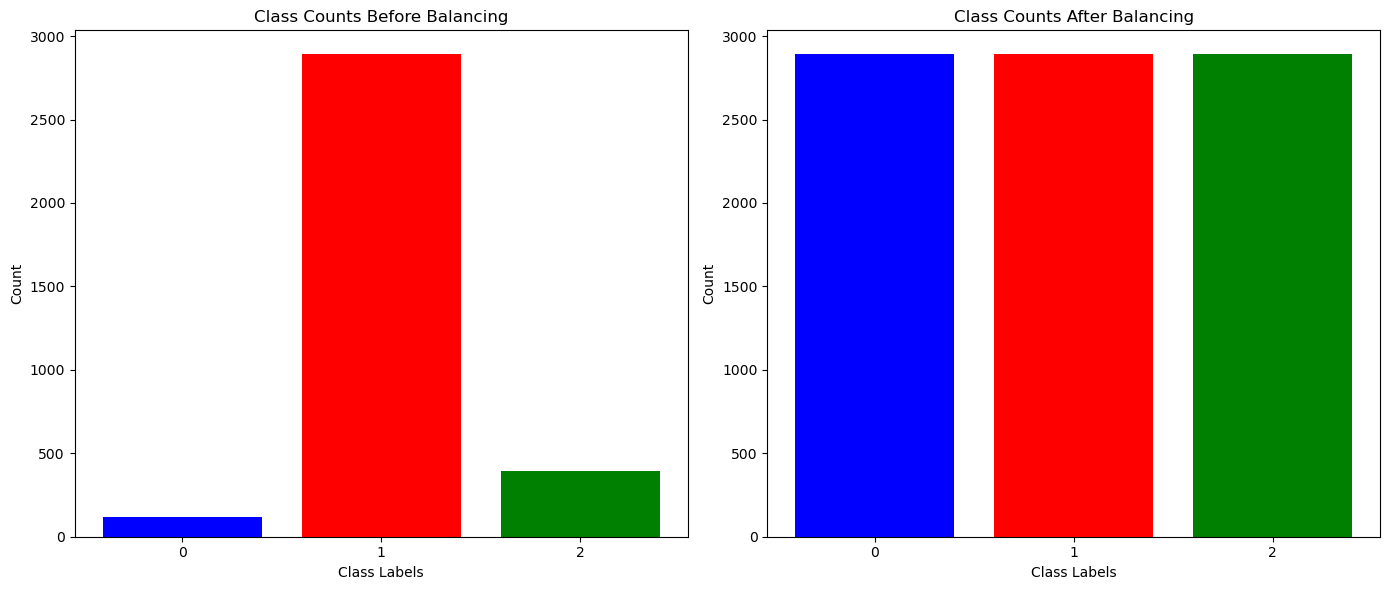

In [74]:
#visualisation of sampling
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'train_data' is your original DataFrame and 'df_upsampled' is after balancing

# Count the occurrences of each class before and after balancing
class_counts_before = train_data['target'].value_counts().sort_index()
class_counts_after = df_upsampled['target'].value_counts().sort_index()

# Set up the figure and axes for a side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), tight_layout=True)

# Plot before balancing
axes[0].bar(class_counts_before.index, class_counts_before.values, color=['blue', 'red', 'green'])
axes[0].set_title('Class Counts Before Balancing')
axes[0].set_xlabel('Class Labels')
axes[0].set_ylabel('Count')
axes[0].set_xticks(class_counts_before.index)  # Ensure class labels are shown on x-axis

# Plot after balancing
axes[1].bar(class_counts_after.index, class_counts_after.values, color=['blue', 'red', 'green'])
axes[1].set_title('Class Counts After Balancing')
axes[1].set_xlabel('Class Labels')
axes[1].set_ylabel('Count')
axes[1].set_xticks(class_counts_after.index)  # Ensure class labels are shown on x-axis

# Display the plots
plt.show()

In [75]:
Y_train

id
PA2489    1
PA1471    1
PA3392    1
PA1089    1
PA3945    1
         ..
PA2676    2
PA2171    2
PA5200    2
PA4351    2
PA1148    2
Name: target, Length: 8670, dtype: int32

In [76]:
X_train#well balanced features
Y_train#well balanced target
New_Disease_data#datset with no missing values
X_val
Y_val

id
PA3443    1
PA3880    1
PA3806    1
PA2205    1
PA2208    2
         ..
PA1935    0
PA2255    1
PA4109    1
PA2921    1
PA4751    1
Name: target, Length: 850, dtype: int32

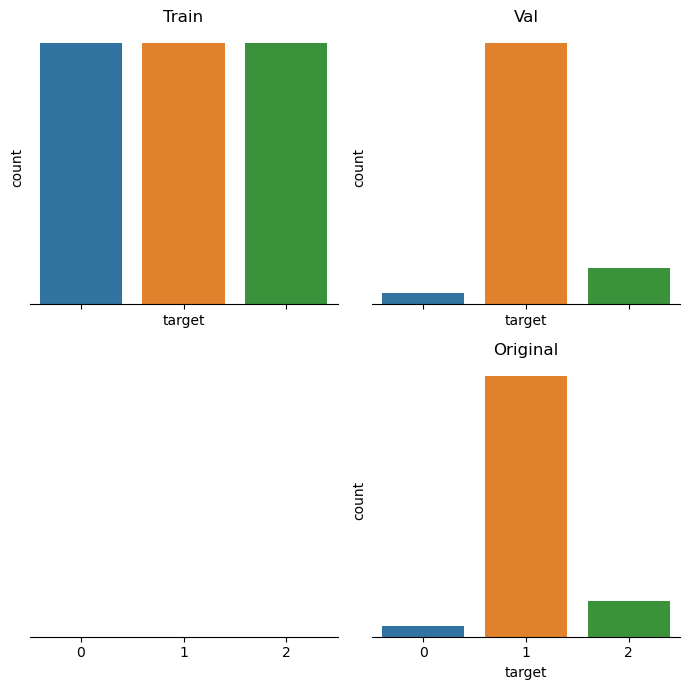

In [77]:
#visualisation of balance data for train, val and original(lab)5
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
#Train data
df=Y_train.to_frame()
sns.countplot(x='target',data=df,ax=axes[0, 0]).set_title("Train")
#Validation data
df=Y_val.to_frame()
sns.countplot(x='target',data=df,ax=axes[0, 1]).set_title("Val")
#original data
sns.countplot(x='target',data=New_Disease_data,ax=axes[1, 1]).set_title("Original")
plt.setp(axes, yticks=[])
plt.tight_layout()

## Preprocessing and Feature Extraction

### feature extraction:bringing a column from another column
feature construction:bringing a column from combination of one than more column


In [78]:
#here we will extract age group from the age column and also remove the age row with 65,000 as seen it is a big outlier and seemed to be removed from the dataset
#normalise, encode and check for correlataion of the columns
#check the important feature of it

In [79]:
X_train

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA3392  female   no       no            no            no          no    no   
PA1089  female   no       no            no            no          no    no   
PA3945  female   no       no            no            no          no    no   
...        ...  ...      ...           ...           ...         ...   ...   
PA2676  female   no       no            no            no          no    no   
PA2171  female   no       no            no            no          no    no   
PA5200  female   no       no            no           yes          no    no   
PA4351  female   no       no            no            no          no    no   
PA1148  female   no       no            no            no          no    no   

       disorder medication_A medication_B  ... mood_stabiliser surgery  \
id                                         ...                           
PA2489       no           no           no  ...              no      no   
PA1471       no           no           no  ...              no      no   
PA3392       no           no           no  ...              no      no   
PA1089       no           no           no  ...              no      no   
PA3945       no           no           no  ...              no      no   
...         ...          ...          ...  ...             ...     ...   
PA2676       no           no           no  ...              no      no   
PA2171       no           no           no  ...              no      no   
PA5200       no           no           no  ...              no      no   
PA4351       no           no           no  ...              no      no   
PA1148       no           no           no  ...              no      no   

       treatment_type1 suspect age  test_X1  test_X2  test_X3  test_X4  \
id                                                                       
PA2489              no      no  30      2.0  3.50000    120.0     1.18   
PA1471              no      no  38      0.4  2.40000    102.0     1.12   
PA3392              no      no  70      2.8  2.40000    111.0     0.80   
PA1089              no      no  68      1.9  2.03558    140.0     0.96   
PA3945              no      no  39      3.5  2.60000    106.0     1.09   
...                ...     ...  ..      ...      ...      ...      ...   
PA2676              no      no  28     54.0  2.10000     50.0     1.10   
PA2171              no      no  79     19.0  1.30000     69.0     0.99   
PA5200              no      no  48      6.6  1.50000    111.0     0.86   
PA4351              no      no  65    213.0  0.90000     43.0     0.95   
PA1148              no      no  69     26.0  2.00000     89.0     1.50   

        test_X5  
id               
PA2489    102.0  
PA1471     92.0  
PA3392    139.0  
PA1089    146.0  
PA3945     97.0  
...         ...  
PA2676     46.0  
PA2171     70.0  
PA5200    129.0  
PA4351     45.0  
PA1148     59.0  

[8670 rows x 21 columns]

In [80]:
import pandas as pd
import numpy as np

# Assuming 'train_data' is your DataFrame
# train_data = pd.read_csv('your_dataset.csv')  # Uncomment if needed

# Define the conditions for each age group
conditions = [
    (X_train['age'] < 18),  # Minor
    (X_train['age'] >= 18) & (X_train['age'] < 35),  # Young Adult
    (X_train['age'] >= 35) & (X_train['age'] < 50),  # Middle Age
    (X_train['age'] >= 50) & (X_train['age'] < 65),  # Senior Adult
    (X_train['age'] >= 65) & (X_train['age'] <= 100),  # Elderly
    (X_train['age'] > 100)  # Centenarian
]

# Define the corresponding labels for each condition
choices = [
    'Minor',
    'Young Adult',
    'Middle Age',
    'Senior Adult',
    'Elderly',
    'Centenarian'  # For those rare cases above 100
]

# Create the 'age_group' column using numpy.select
X_train['age_group'] = np.select(conditions, choices, default='Not Specified')

# Check the output to ensure the new column is correct
print(X_train[['age', 'age_group']].head())

        age    age_group
id                      
PA2489   30  Young Adult
PA1471   38   Middle Age
PA3392   70      Elderly
PA1089   68      Elderly
PA3945   39   Middle Age


In [81]:
X_train.age_group.value_counts()

age_group
Senior Adult    2697
Elderly         2438
Middle Age      1707
Young Adult     1587
Minor            239
Centenarian        2
Name: count, dtype: int64

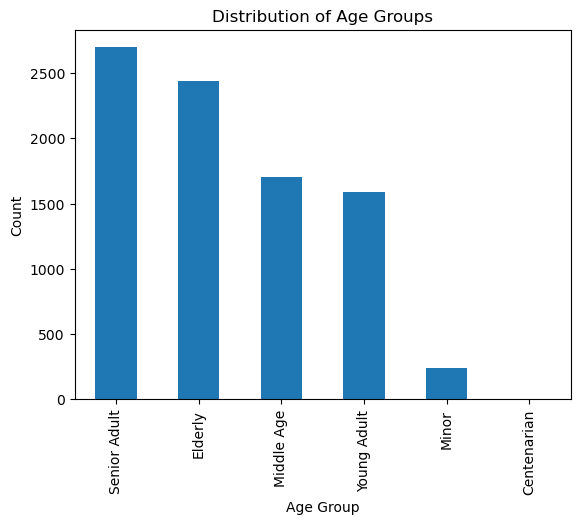

In [82]:
import matplotlib.pyplot as plt

# Create a bar chart of age group counts
X_train['age_group'].value_counts().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

C:\Users\chibu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


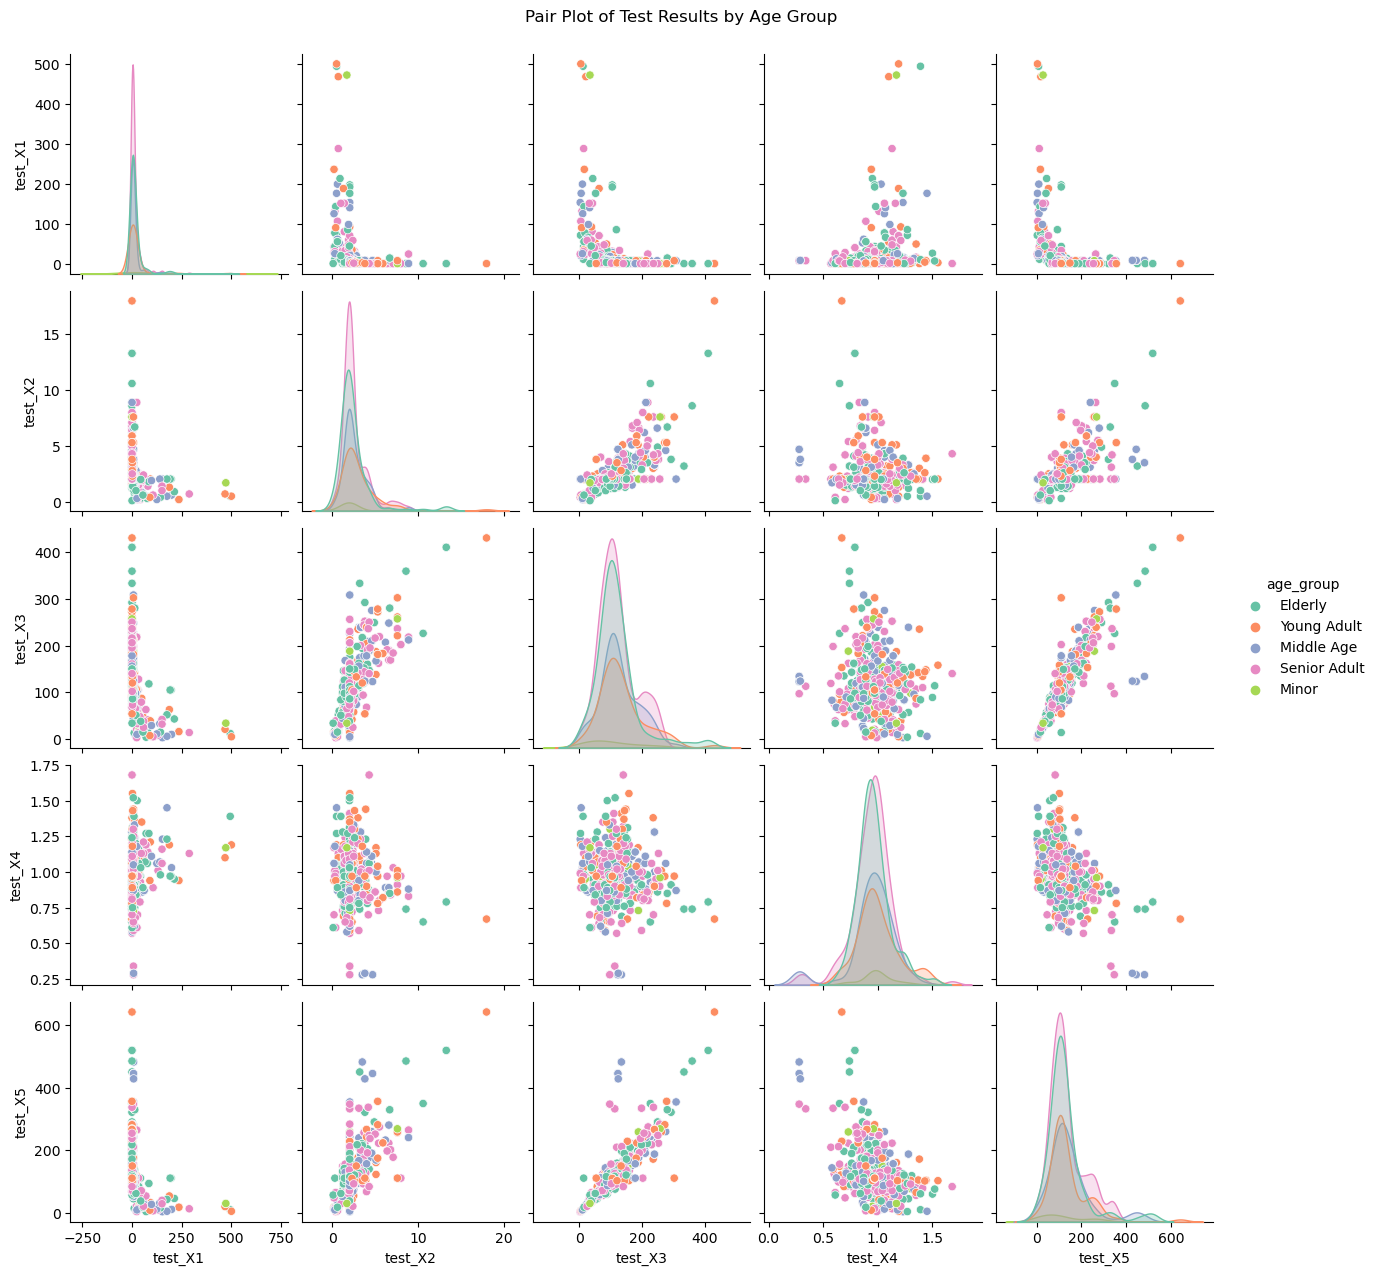

In [83]:
import seaborn as sns

# Sample the data for visualization clarity
sample_data = X_train[['age_group', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']].dropna().sample(frac=0.1)

# Creating a pair plot
sns.pairplot(sample_data, hue='age_group', palette='Set2', diag_kind='kde')
plt.suptitle('Pair Plot of Test Results by Age Group', y=1.02)  # Adjust title location
plt.show()

### Variability in Test Results: Each test shows unique distributions that vary by age, highlighting physiological differences.
Correlations Among Tests: Certain age groups exhibit strong correlations between tests, suggesting related health factors.

In [84]:
#dropping the disorder column as it only has only value with is no, which is likely to make no difference in the prediction
#we will use train X
X_train.drop('disorder', axis=1, inplace=True)

In [85]:
#confirming its dropped
X_train.columns

Index(['gender', 'sick', 'pregnant', 'concern_type1', 'concern_type2',
       'enlargement', 'tumor', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect', 'age',
       'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'age_group'],
      dtype='object')

In [86]:
#try to do feature extraction on concern type colum

## Encoding the categorical columns and getting the inputs and target that will be used for prediction

### since we have done some feature extraction we will have to adjust the features and also the categorical columns.

In [87]:
X_train#well balanced features
#Y_train#well balanced target
#X_val
#Y_val
#New_Disease_data#datset with no missing values
#train_data#dataset with balanced features and target

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA3392  female   no       no            no            no          no    no   
PA1089  female   no       no            no            no          no    no   
PA3945  female   no       no            no            no          no    no   
...        ...  ...      ...           ...           ...         ...   ...   
PA2676  female   no       no            no            no          no    no   
PA2171  female   no       no            no            no          no    no   
PA5200  female   no       no            no           yes          no    no   
PA4351  female   no       no            no            no          no    no   
PA1148  female   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... surgery treatment_type1  \
id                                              ...                           
PA2489           no           no           yes  ...      no              no   
PA1471           no           no            no  ...      no              no   
PA3392           no           no           yes  ...      no              no   
PA1089           no           no            no  ...      no              no   
PA3945           no           no            no  ...      no              no   
...             ...          ...           ...  ...     ...             ...   
PA2676           no           no            no  ...      no              no   
PA2171           no           no            no  ...      no              no   
PA5200           no           no            no  ...      no              no   
PA4351           no           no            no  ...      no              no   
PA1148           no           no            no  ...      no              no   

       suspect age  test_X1  test_X2  test_X3  test_X4  test_X5    age_group  
id                                                                            
PA2489      no  30      2.0  3.50000    120.0     1.18    102.0  Young Adult  
PA1471      no  38      0.4  2.40000    102.0     1.12     92.0   Middle Age  
PA3392      no  70      2.8  2.40000    111.0     0.80    139.0      Elderly  
PA1089      no  68      1.9  2.03558    140.0     0.96    146.0      Elderly  
PA3945      no  39      3.5  2.60000    106.0     1.09     97.0   Middle Age  
...        ...  ..      ...      ...      ...      ...      ...          ...  
PA2676      no  28     54.0  2.10000     50.0     1.10     46.0  Young Adult  
PA2171      no  79     19.0  1.30000     69.0     0.99     70.0      Elderly  
PA5200      no  48      6.6  1.50000    111.0     0.86    129.0   Middle Age  
PA4351      no  65    213.0  0.90000     43.0     0.95     45.0      Elderly  
PA1148      no  69     26.0  2.00000     89.0     1.50     59.0      Elderly  

[8670 rows x 21 columns]

In [88]:
X_train.head()

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA3392  female   no       no            no            no          no    no   
PA1089  female   no       no            no            no          no    no   
PA3945  female   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... surgery treatment_type1  \
id                                              ...                           
PA2489           no           no           yes  ...      no              no   
PA1471           no           no            no  ...      no              no   
PA3392           no           no           yes  ...      no              no   
PA1089           no           no            no  ...      no              no   
PA3945           no           no            no  ...      no              no   

       suspect age  test_X1  test_X2  test_X3  test_X4  test_X5    age_group  
id                                                                            
PA2489      no  30      2.0  3.50000    120.0     1.18    102.0  Young Adult  
PA1471      no  38      0.4  2.40000    102.0     1.12     92.0   Middle Age  
PA3392      no  70      2.8  2.40000    111.0     0.80    139.0      Elderly  
PA1089      no  68      1.9  2.03558    140.0     0.96    146.0      Elderly  
PA3945      no  39      3.5  2.60000    106.0     1.09     97.0   Middle Age  

[5 rows x 21 columns]

In [89]:
#now we will also drop the disorder column and add the age group column in the validation and test dataset
#so they can have the same column to be used when predicting the modeliing

import pandas as pd
import numpy as np

# Assuming 'train_data' is your DataFrame
# train_data = pd.read_csv('your_dataset.csv')  # Uncomment if needed

X_val.drop('disorder',axis=1, inplace=True)

# Define the conditions for each age group
conditions = [
    (X_val['age'] < 18),  # Minor
    (X_val['age'] >= 18) & (X_val['age'] < 35),  # Young Adult
    (X_val['age'] >= 35) & (X_val['age'] < 50),  # Middle Age
    (X_val['age'] >= 50) & (X_val['age'] < 65),  # Senior Adult
    (X_val['age'] >= 65) & (X_val['age'] <= 100),  # Elderly
    (X_val['age'] > 100)  # Centenarian
]

# Define the corresponding labels for each condition
choices = [
    'Minor',
    'Young Adult',
    'Middle Age',
    'Senior Adult',
    'Elderly',
    'Centenarian'  # For those rare cases above 100
]

# Create the 'age_group' column using numpy.select
X_val['age_group'] = np.select(conditions, choices, default='Not Specified')

# Check the output to ensure the new column is correct
print(X_val[['age', 'age_group']].head())

        age     age_group
id                       
PA3443   50  Senior Adult
PA3880   56  Senior Adult
PA3806   70       Elderly
PA2205   61  Senior Adult
PA2208   76       Elderly


In [90]:
#to see that the age group has beena dded
X_val

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA3443    male   no       no            no            no          no    no   
PA3880    male   no       no           yes            no          no    no   
PA3806    male   no       no            no            no          no    no   
PA2205    male   no       no            no            no          no    no   
PA2208    male   no       no            no            no          no    no   
...        ...  ...      ...           ...           ...         ...   ...   
PA1935  female   no       no            no           yes          no    no   
PA2255  female   no       no            no           yes          no    no   
PA4109  female   no       no           yes            no          no    no   
PA2921  female   no       no            no            no          no    no   
PA4751  female   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... surgery treatment_type1  \
id                                              ...                           
PA3443           no           no            no  ...      no              no   
PA3880           no           no            no  ...      no              no   
PA3806           no           no            no  ...      no              no   
PA2205           no           no            no  ...      no              no   
PA2208           no           no            no  ...      no              no   
...             ...          ...           ...  ...     ...             ...   
PA1935           no           no            no  ...      no              no   
PA2255           no           no            no  ...      no              no   
PA4109           no           no            no  ...      no              no   
PA2921           no           no            no  ...      no              no   
PA4751          yes           no            no  ...      no              no   

       suspect age   test_X1  test_X2     test_X3   test_X4     test_X5  \
id                                                                        
PA3443      no  50  1.000000  2.00000  101.000000  0.940000  108.000000   
PA3880      no  56  2.400000  2.03558  101.000000  0.790000  128.000000   
PA3806      no  70  1.800000  1.50000   59.000000  0.790000   75.000000   
PA2205      no  61  1.500000  2.30000  104.000000  0.920000  113.000000   
PA2208      no  76  7.400000  2.03558  122.000000  0.940000  130.000000   
...        ...  ..       ...      ...         ...       ...         ...   
PA1935      no  33  0.005000  3.20000  185.000000  0.910000  206.000000   
PA2255      no  55  4.500000  1.70000   91.000000  1.090000   84.000000   
PA4109      no  55  1.200000  2.40000   95.000000  1.050000   90.000000   
PA2921      no  82  7.342463  2.03558  104.919623  0.970846  110.090834   
PA4751      no  67  0.020000  2.03558  121.000000  0.960000  127.000000   

           age_group  
id                    
PA3443  Senior Adult  
PA3880  Senior Adult  
PA3806       Elderly  
PA2205  Senior Adult  
PA2208       Elderly  
...              ...  
PA1935   Young Adult  
PA2255  Senior Adult  
PA4109  Senior Adult  
PA2921       Elderly  
PA4751       Elderly  

[850 rows x 21 columns]

In [91]:
#to see changes on the val data as well
val_data = pd.concat([X_val, Y_val], axis=1)
val_data.head()

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                          
PA3443   male   no       no            no            no          no    no   
PA3880   male   no       no           yes            no          no    no   
PA3806   male   no       no            no            no          no    no   
PA2205   male   no       no            no            no          no    no   
PA2208   male   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... treatment_type1 suspect  \
id                                              ...                           
PA3443           no           no            no  ...              no      no   
PA3880           no           no            no  ...              no      no   
PA3806           no           no            no  ...              no      no   
PA2205           no           no            no  ...              no      no   
PA2208           no           no            no  ...              no      no   

       age test_X1  test_X2  test_X3  test_X4  test_X5     age_group  target  
id                                                                            
PA3443  50     1.0  2.00000    101.0     0.94    108.0  Senior Adult       1  
PA3880  56     2.4  2.03558    101.0     0.79    128.0  Senior Adult       1  
PA3806  70     1.8  1.50000     59.0     0.79     75.0       Elderly       1  
PA2205  61     1.5  2.30000    104.0     0.92    113.0  Senior Adult       1  
PA2208  76     7.4  2.03558    122.0     0.94    130.0       Elderly       2  

[5 rows x 22 columns]

In [92]:
#to see that all the changes made on the X_train, had effect on the train_data as well
#the train data has both the features and the target columns
train_data = pd.concat([X_train, Y_train], axis=1)
train_data.head()

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA3392  female   no       no            no            no          no    no   
PA1089  female   no       no            no            no          no    no   
PA3945  female   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... treatment_type1 suspect  \
id                                              ...                           
PA2489           no           no           yes  ...              no      no   
PA1471           no           no            no  ...              no      no   
PA3392           no           no           yes  ...              no      no   
PA1089           no           no            no  ...              no      no   
PA3945           no           no            no  ...              no      no   

       age test_X1  test_X2  test_X3  test_X4  test_X5    age_group  target  
id                                                                           
PA2489  30     2.0  3.50000    120.0     1.18    102.0  Young Adult       1  
PA1471  38     0.4  2.40000    102.0     1.12     92.0   Middle Age       1  
PA3392  70     2.8  2.40000    111.0     0.80    139.0      Elderly       1  
PA1089  68     1.9  2.03558    140.0     0.96    146.0      Elderly       1  
PA3945  39     3.5  2.60000    106.0     1.09     97.0   Middle Age       1  

[5 rows x 22 columns]

In [93]:
#After upsampling, here is the new shape of our datasets
train_data.shape

(8670, 22)

In [94]:
val_data.shape

(850, 22)

In [95]:
#Designate the input and target columns for the data, as some features has been added
input_col=["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                "tumor","medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                "surgery", "treatment_type1", "suspect","age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5",'age_group']

In [96]:
target_col = 'target'

In [97]:
train_inputs = train_data[input_col].copy()
train_targets = train_data[target_col].copy()

In [98]:
val_inputs = val_data[input_col].copy()
val_targets = val_data[target_col].copy()

### Redefining the categorical and numerical colum, also encoding the categorical and using the standard scaler for the numerical column

In [99]:
#findind out if new column made is always categorical column

In [100]:
#we will also redefined our nemerical and categorical column as some feature extraction was alsready done
CATEGORICAL_COLUMNS= ["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                       "tumor","medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                       "surgery", "treatment_type1", "suspect",'age_group']
NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5"]

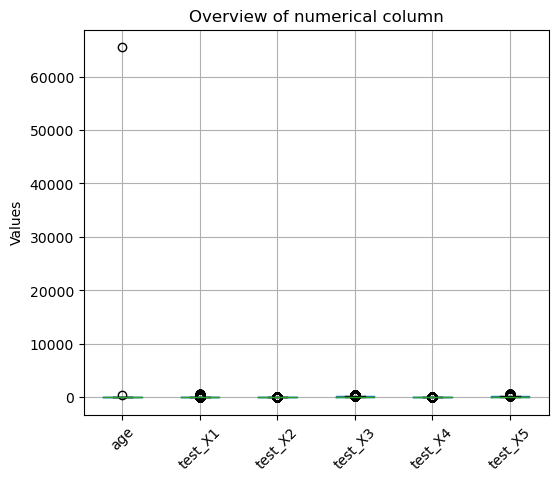

In [101]:
#recall we said we will take care of the outlier individually in both the train and val data
#checking for outlier in the train data
#checking for the outlier of the numerical columns with a boxplot
plt.figure(figsize=(6, 5))
X_train.boxplot(column=NUMERICAL_COLUMNS)
plt.title('Overview of numerical column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

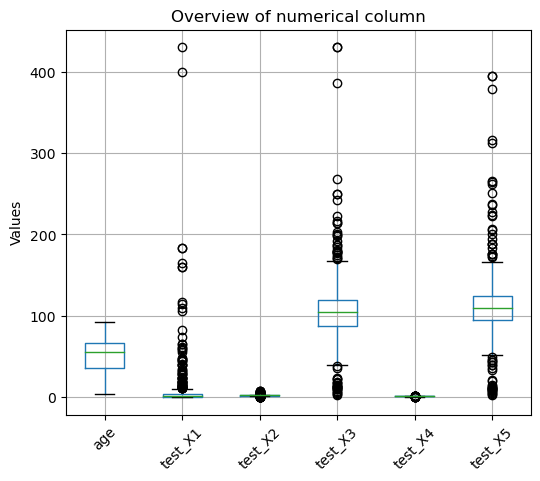

In [102]:
#recall we said we will take care of the outlier individually in both the train and val data
#checking for outlier in the train data
#checking for the outlier of the numerical columns with a boxplot
plt.figure(figsize=(6, 5))
X_val.boxplot(column=NUMERICAL_COLUMNS)
plt.title('Overview of numerical column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [103]:
#looking at the outliers both in the train and validation data, we will replace the outlier in the train data with the mean,
#while we leave the outliers in the validation data,so the model can be finetuned more
#let us know the exact outlier number to be replaced by mean, as it seems to be the highest number in the age column
X_train.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   8670.000000  8670.000000  8670.000000  8670.000000  8670.000000   
mean      59.740254    17.179590     2.667377   122.971238     0.967023   
std      703.423661    53.622362     1.924689    67.579196     0.188084   
min        1.000000     0.005000     0.050000     2.000000     0.280000   
25%       38.000000     0.150000     1.800000    83.000000     0.870000   
50%       55.000000     2.500000     2.035580   109.000000     0.970000   
75%       66.000000     8.799999     3.100000   151.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  8670.000000  
mean    134.584155  
std      88.473117  
min       1.400000  
25%      88.000000  
50%     110.090834  
75%     163.000000  
max     642.000000

#### Replacing outliers with the median instead of the mean is often more effective because the median is robust to outliers, ensuring it isn't skewed by extreme values. This makes it particularly suitable for skewed distributions, where it better represents the central tendency. Using the median also minimizes distortion to the overall data distribution, preserving its original characteristics more faithfully than the mean would. Additionally, the median's simplicity and clarity make it an ideal choice for maintaining data integrity and accuracy when correcting for outliers.

In [104]:
# Calculate the median age, which is less sensitive to outliers
median_age = X_train['age'].median()

# Identify the maximum age value
max_age = X_train['age'].max()

# Replace only the maximum age value with the median age
X_train['age'].replace(max_age, median_age, inplace=True)

In [105]:
#you can see that we have taken care of that initial maxmimum value of age
X_train.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count  8670.000000  8670.000000  8670.000000  8670.000000  8670.000000   
mean     52.188812    17.179590     2.667377   122.971238     0.967023   
std      19.024769    53.622362     1.924689    67.579196     0.188084   
min       1.000000     0.005000     0.050000     2.000000     0.280000   
25%      38.000000     0.150000     1.800000    83.000000     0.870000   
50%      55.000000     2.500000     2.035580   109.000000     0.970000   
75%      66.000000     8.799999     3.100000   151.000000     1.060000   
max     455.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  8670.000000  
mean    134.584155  
std      88.473117  
min       1.400000  
25%      88.000000  
50%     110.090834  
75%     163.000000  
max     642.000000

In [106]:
train_inputs = train_data[input_col].copy()
train_targets = train_data[target_col].copy()

In [107]:
train_inputs.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   8670.000000  8670.000000  8670.000000  8670.000000  8670.000000   
mean      59.740254    17.179590     2.667377   122.971238     0.967023   
std      703.423661    53.622362     1.924689    67.579196     0.188084   
min        1.000000     0.005000     0.050000     2.000000     0.280000   
25%       38.000000     0.150000     1.800000    83.000000     0.870000   
50%       55.000000     2.500000     2.035580   109.000000     0.970000   
75%       66.000000     8.799999     3.100000   151.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  8670.000000  
mean    134.584155  
std      88.473117  
min       1.400000  
25%      88.000000  
50%     110.090834  
75%     163.000000  
max     642.000000

In [108]:
val_inputs = val_data[input_col].copy()
val_targets = val_data[target_col].copy()

In [109]:
val_inputs.describe()

age     test_X1     test_X2     test_X3     test_X4     test_X5
count  850.000000  850.000000  850.000000  850.000000  850.000000  850.000000
mean    51.547059    6.727332    1.997934  104.979865    0.958201  111.149469
std     18.945170   26.208939    0.689080   36.753916    0.140587   36.246668
min      4.000000    0.005000    0.200000    3.000000    0.250000    3.000000
25%     36.000000    0.692500    1.700000   87.000000    0.870000   95.000000
50%     55.000000    1.700000    2.035580  104.000000    0.970000  110.090834
75%     66.000000    4.375000    2.100000  119.000000    1.030000  124.000000
max     92.000000  430.000000    7.600000  430.000000    1.680000  395.000000

In [110]:
from sklearn.preprocessing import StandardScaler


# Define your numerical columns
NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3", "test_X4", "test_X5"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_inputs[NUMERICAL_COLUMNS])

# Transform the training, validation, and test data
train_inputs[NUMERICAL_COLUMNS] = scaler.transform(train_inputs[NUMERICAL_COLUMNS])
val_inputs[NUMERICAL_COLUMNS] = scaler.transform(val_inputs[NUMERICAL_COLUMNS])

## Report on Standardizing Numerical Columns in Medical Data Analysis
Standardization of numerical variables such as "age" and test results ("test_X1" to "test_X5") was performed using scikit-learn's StandardScaler. This preprocessing step is crucial for several reasons:

Uniformity in Scale: It ensures all features contribute equally by transforming data to have zero mean and unit variance, eliminating bias from varying scales.

Enhanced Model Performance: Standardization aids in optimizing machine learning algorithms that assume normally distributed data, improving convergence speed and overall model accuracy.

Consistency and Robustness: Applying the same scale to training, validation, and test sets ensures consistent model training and evaluation, while reducing the influence of outliers.

This process is vital for accurate data analysis, ensuring that our predictive models perform reliably in medical diagnostics.

In [111]:
#checking the value count of the unique values to know which encoding to try out
for col in train_inputs[CATEGORICAL_COLUMNS]:
    print ("---- %s ---" % col)
    print (train_inputs[col].value_counts())

---- gender ---
gender
female    6340
male      2330
Name: count, dtype: int64
---- sick ---
sick
no     8421
yes     249
Name: count, dtype: int64
---- pregnant ---
pregnant
no     8658
yes      12
Name: count, dtype: int64
---- concern_type1 ---
concern_type1
no     8557
yes     113
Name: count, dtype: int64
---- concern_type2 ---
concern_type2
no     7040
yes    1630
Name: count, dtype: int64
---- enlargement ---
enlargement
no     8639
yes      31
Name: count, dtype: int64
---- tumor ---
tumor
no     8305
yes     365
Name: count, dtype: int64
---- medication_A ---
medication_A
no     8122
yes     548
Name: count, dtype: int64
---- medication_B ---
medication_B
no     8525
yes     145
Name: count, dtype: int64
---- mental_health ---
mental_health
no     8475
yes     195
Name: count, dtype: int64
---- mood_stabiliser ---
mood_stabiliser
no     8609
yes      61
Name: count, dtype: int64
---- surgery ---
surgery
no     8607
yes      63
Name: count, dtype: int64
---- treatment_type1 ---

In [112]:
CATEGORICAL_COLUMNS

['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect',
 'age_group']

In [113]:
NUMERICAL_COLUMNS

['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

In [114]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Assuming df_train and df_val are your training and validation DataFrames

# Define your columns
categorical_columns = ['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect',]
numerical_columns = ['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']  # replace with your actual numerical columns
ordinal_column = ['age_group']

# Set up the ColumnTransformer with OneHotEncoder and OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_column)
    ])

# Fit and transform the training data
encoded_train_inputs = preprocessor.fit_transform(train_inputs)
encoded_val_inputs = preprocessor.transform(val_inputs)

# Column names for the encoded features
encoded_feature_names = (numerical_columns +
                         list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)) +
                         ordinal_column)

# Convert to DataFrame (optional, if you need a DataFrame for further processing)
encoded_train_df = pd.DataFrame(encoded_train_inputs, columns=encoded_feature_names, index=train_inputs.index)
encoded_val_df = pd.DataFrame(encoded_val_inputs, columns=encoded_feature_names, index=val_inputs.index)

# Now create your X_train and X_val
X_train = encoded_train_df
X_val = encoded_val_df

## In processing our medical dataset, we employed One-Hot Encoding for most categorical variables including 'gender', 'sick', 'pregnant', and others due to their nominal nature, ensuring no artificial ordinal relationship influences the models. This method converts categories into separate binary columns, ideal for maintaining unbiased model inputs across non-ordinal data.

For 'age_group', which exhibits a clear ordinal structure (e.g., Young < Middle Age < Elderly), we utilized Ordinal Encoding. This preserves the natural ordering of the categories, providing meaningful information to the model that aligns with the intrinsic progression of age.

These encoding choices optimize data representation for machine learning, enhancing model compatibility and efficiency while preventing the introduction of bias, thereby supporting more accurate and reliable predictive outcomes.

In [115]:
X_train

age   test_X1   test_X2   test_X3   test_X4   test_X5  \
id                                                                   
PA2489 -0.042282 -0.283100  0.432626 -0.043969  1.132415 -0.368316   
PA1471 -0.030908 -0.312940 -0.138928 -0.310339  0.813390 -0.481351   
PA3392  0.014586 -0.268180 -0.138928 -0.177154 -0.888075  0.049915   
PA1089  0.011743 -0.284965 -0.328278  0.251997 -0.037342  0.129039   
PA3945 -0.029486 -0.255125 -0.035009 -0.251146  0.653878 -0.424833   
...          ...       ...       ...       ...       ...       ...   
PA2676 -0.045125  0.686701 -0.294806 -1.079851  0.707049 -1.001313   
PA2171  0.027382  0.033951 -0.710482 -0.798683  0.122170 -0.730028   
PA5200 -0.016691 -0.197309 -0.606563 -0.177154 -0.569050 -0.063121   
PA4351  0.007478  3.652053 -0.918319 -1.183439 -0.090513 -1.012616   
PA1148  0.013165  0.164501 -0.346765 -0.502717  2.833880 -0.854367   

        gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                                     ...                      
PA2489            0.0          1.0      1.0       0.0  ...                1.0   
PA1471            1.0          0.0      1.0       0.0  ...                0.0   
PA3392            1.0          0.0      1.0       0.0  ...                1.0   
PA1089            1.0          0.0      1.0       0.0  ...                0.0   
PA3945            1.0          0.0      1.0       0.0  ...                0.0   
...               ...          ...      ...       ...  ...                ...   
PA2676            1.0          0.0      1.0       0.0  ...                0.0   
PA2171            1.0          0.0      1.0       0.0  ...                0.0   
PA5200            1.0          0.0      1.0       0.0  ...                0.0   
PA4351            1.0          0.0      1.0       0.0  ...                0.0   
PA1148            1.0          0.0      1.0       0.0  ...                0.0   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA2489                 1.0                  0.0         1.0          0.0   
PA1471                 1.0                  0.0         1.0          0.0   
PA3392                 1.0                  0.0         1.0          0.0   
PA1089                 1.0                  0.0         1.0          0.0   
PA3945                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA2676                 1.0                  0.0         1.0          0.0   
PA2171                 1.0                  0.0         1.0          0.0   
PA5200                 1.0                  0.0         1.0          0.0   
PA4351                 1.0                  0.0         1.0          0.0   
PA1148                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA2489                 1.0                  0.0         1.0          0.0   
PA1471                 1.0                  0.0         1.0          0.0   
PA3392                 1.0                  0.0         1.0          0.0   
PA1089                 1.0                  0.0         1.0          0.0   
PA3945                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA2676                 1.0                  0.0         1.0          0.0   
PA2171                 1.0                  0.0         1.0          0.0   
PA5200                 1.0                  0.0         1.0          0.0   
PA4351                 1.0                  0.0         1.0          0.0   
PA1148                 1.0                  0.0         1.0          0.0   

        age_group  
id                 
PA2489        5.0  
PA1471    

In [116]:
Y_train=train_targets
Y_val=val_targets

In [117]:
X_train.isnull().sum()

age                    0
test_X1                0
test_X2                0
test_X3                0
test_X4                0
test_X5                0
gender_female          0
gender_male            0
sick_no                0
sick_yes               0
pregnant_no            0
pregnant_yes           0
concern_type1_no       0
concern_type1_yes      0
concern_type2_no       0
concern_type2_yes      0
enlargement_no         0
enlargement_yes        0
tumor_no               0
tumor_yes              0
medication_A_no        0
medication_A_yes       0
medication_B_no        0
medication_B_yes       0
mental_health_no       0
mental_health_yes      0
mood_stabiliser_no     0
mood_stabiliser_yes    0
surgery_no             0
surgery_yes            0
treatment_type1_no     0
treatment_type1_yes    0
suspect_no             0
suspect_yes            0
age_group              0
dtype: int64

In [118]:
Y_train

id
PA2489    1
PA1471    1
PA3392    1
PA1089    1
PA3945    1
         ..
PA2676    2
PA2171    2
PA5200    2
PA4351    2
PA1148    2
Name: target, Length: 8670, dtype: int32

In [119]:
#manual balancing
#X_train
#X_val
#Y_train
#Y_val

# Smote balanced dataset

In [120]:
X.columns

Index(['gender', 'sick', 'pregnant', 'concern_type1', 'concern_type2',
       'enlargement', 'tumor', 'disorder', 'medication_A', 'medication_B',
       'mental_health', 'mood_stabiliser', 'surgery', 'treatment_type1',
       'suspect', 'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4',
       'test_X5'],
      dtype='object')

In [121]:
X.isnull().sum()

gender             0
sick               0
pregnant           0
concern_type1      0
concern_type2      0
enlargement        0
tumor              0
disorder           0
medication_A       0
medication_B       0
mental_health      0
mood_stabiliser    0
surgery            0
treatment_type1    0
suspect            0
age                0
test_X1            0
test_X2            0
test_X3            0
test_X4            0
test_X5            0
dtype: int64

In [122]:
#Recal that we have X and Y as the datasets beofre any splitting and preprocesing
#we will be apply all the same preprocessing we did earlier to the smooe balanced dataset
#first we will split
#we will be dividing our train data into train and validation, as we already have a test data given to us
from sklearn.model_selection import train_test_split

#  X and Y are  feature matrix and target vector respectively
# Splitting the data into training and validation sets with stratification 
X_train_2, X_val_2, Y_train_2, Y_val_2 = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

In [123]:
print("Train data:",X_train_2.shape)
print("Val data:",X_val_2.shape)
Y_train_2.value_counts()

Train data: (3400, 21)
Val data: (850, 21)


target
1    2890
2     391
0     119
Name: count, dtype: int64

In [124]:
#naming the train data and val data
train_data_2 = pd.concat([X_train_2, Y_train_2], axis=1)

In [125]:
# we will do the preprocessing that was done in the oversampling data first
#we will start with dropping the disorder column and the adding the ge group colum
#now we will also drop the disorder column and add the age group column in the validation and test dataset
#so they can have the same column to be used when predicting the modeliing

import pandas as pd
import numpy as np

# Assuming 'train_data' is your DataFrame
# train_data = pd.read_csv('your_dataset.csv')  # Uncomment if needed

X_train_2.drop('disorder',axis=1, inplace=True)

# Define the conditions for each age group
conditions = [
    (X_train_2['age'] < 18),  # Minor
    (X_train_2['age'] >= 18) & (X_train_2['age'] < 35),  # Young Adult
    (X_train_2['age'] >= 35) & (X_train_2['age'] < 50),  # Middle Age
    (X_train_2['age'] >= 50) & (X_train_2['age'] < 65),  # Senior Adult
    (X_train_2['age'] >= 65) & (X_train_2['age'] <= 100),  # Elderly
    (X_train_2['age'] > 100)  # Centenarian
]

# Define the corresponding labels for each condition
choices = [
    'Minor',
    'Young Adult',
    'Middle Age',
    'Senior Adult',
    'Elderly',
    'Centenarian'  # For those rare cases above 100
]

# Create the 'age_group' column using numpy.select
X_train_2['age_group'] = np.select(conditions, choices, default='Not Specified')

# Check the output to ensure the new column is correct
print(X_train_2[['age', 'age_group']].head())

        age     age_group
id                       
PA2489   30   Young Adult
PA1750   25   Young Adult
PA1471   38    Middle Age
PA4290   55  Senior Adult
PA3392   70       Elderly


In [126]:
#to check the smooth column has dropped and age group added
X_train_2.columns

Index(['gender', 'sick', 'pregnant', 'concern_type1', 'concern_type2',
       'enlargement', 'tumor', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect', 'age',
       'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5', 'age_group'],
      dtype='object')

In [127]:
#taking care of the outlier in the train_data
#we have earlier done the visualisation on the first train data
#for now lets just use the describe to know
X_train_2.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   3400.000000  3400.000000  3400.000000  3400.000000  3400.000000   
mean      71.331765     7.496246     2.044992   104.904563     0.974007   
std     1123.044449    32.134074     0.793819    34.023339     0.158013   
min        1.000000     0.005000     0.050000     2.000000     0.280000   
25%       37.000000     0.700000     1.800000    88.000000     0.880000   
50%       55.000000     1.700000     2.035580   104.000000     0.970846   
75%       67.000000     4.600000     2.200000   120.000000     1.060000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  3400.000000  
mean    109.826175  
std      38.401835  
min       1.400000  
25%      93.000000  
50%     110.000000  
75%     122.250000  
max     642.000000

In [128]:
#now we will replace the obvious outlier with the median
# Calculate the median age, which is less sensitive to outliers
median_age = X_train_2['age'].median()

# Identify the maximum age value
max_age = X_train_2['age'].max()

# Replace only the maximum age value with the median age
X_train_2['age'].replace(max_age, median_age, inplace=True)

In [129]:
#to show the outlier has been taken care of
X_train_2.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count  3400.000000  3400.000000  3400.000000  3400.000000  3400.000000   
mean     52.075588     7.496246     2.044992   104.904563     0.974007   
std      19.875766    32.134074     0.793819    34.023339     0.158013   
min       1.000000     0.005000     0.050000     2.000000     0.280000   
25%      37.000000     0.700000     1.800000    88.000000     0.880000   
50%      55.000000     1.700000     2.035580   104.000000     0.970846   
75%      67.000000     4.600000     2.200000   120.000000     1.060000   
max     455.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  3400.000000  
mean    109.826175  
std      38.401835  
min       1.400000  
25%      93.000000  
50%     110.000000  
75%     122.250000  
max     642.000000

In [130]:
#now we will have to standardise the numerical column and encode the categorical colum, so we can use the smoothe method for balancing the datset
train_data_2 = pd.concat([X_train_2, Y_train_2], axis=1)
train_data_2

gender sick pregnant concern_type1 concern_type2 enlargement tumor  \
id                                                                           
PA2489    male   no       no            no            no          no    no   
PA1750  female   no       no            no            no          no    no   
PA1471  female   no       no            no            no          no    no   
PA4290  female   no       no            no           yes          no    no   
PA3392  female   no       no            no            no          no    no   
...        ...  ...      ...           ...           ...         ...   ...   
PA1321  female   no       no            no            no          no    no   
PA3747  female   no       no            no            no          no    no   
PA4026  female  yes       no            no           yes          no    no   
PA1800    male   no       no            no           yes          no    no   
PA4311    male   no       no            no            no          no    no   

       medication_A medication_B mental_health  ... treatment_type1 suspect  \
id                                              ...                           
PA2489           no           no           yes  ...              no      no   
PA1750           no           no            no  ...              no      no   
PA1471           no           no            no  ...              no      no   
PA4290           no           no            no  ...              no      no   
PA3392           no           no           yes  ...              no      no   
...             ...          ...           ...  ...             ...     ...   
PA1321           no           no            no  ...              no      no   
PA3747           no           no            no  ...              no      no   
PA4026          yes           no            no  ...              no     yes   
PA1800           no           no            no  ...              no     yes   
PA4311           no           no            no  ...              no      no   

       age    test_X1  test_X2  test_X3  test_X4  test_X5     age_group  \
id                                                                        
PA2489  30   2.000000  3.50000    120.0     1.18    102.0   Young Adult   
PA1750  25  26.400000  2.30000     73.0     1.09     67.0   Young Adult   
PA1471  38   0.400000  2.40000    102.0     1.12     92.0    Middle Age   
PA4290  55   0.035000  4.40000    195.0     0.82    237.0  Senior Adult   
PA3392  70   2.800000  2.40000    111.0     0.80    139.0       Elderly   
...     ..        ...      ...      ...      ...      ...           ...   
PA1321  50   7.600000  1.70000    128.0     1.08    118.0  Senior Adult   
PA3747  45  15.000000  2.10000     83.0     1.24     67.0    Middle Age   
PA4026  49   0.085000  2.70000    157.0     1.06    148.0    Middle Age   
PA1800  27   9.099999  1.70000    135.0     0.93    145.0   Young Adult   
PA4311  43   3.000000  2.03558     93.0     0.69    135.0    Middle Age   

        target  
id              
PA2489       1  
PA1750       2  
PA1471       1  
PA4290       0  
PA3392       1  
...        ...  
PA1321       2  
PA3747       2  
PA4026       1  
PA1800       2  
PA4311       1  

[3400 rows x 22 columns]

In [131]:
train_inputs_2 = train_data_2[input_col].copy()
train_targets_2 = train_data_2[target_col].copy()

In [132]:
train_inputs_2.isnull().sum()

gender             0
sick               0
pregnant           0
concern_type1      0
concern_type2      0
enlargement        0
tumor              0
medication_A       0
medication_B       0
mental_health      0
mood_stabiliser    0
surgery            0
treatment_type1    0
suspect            0
age                0
test_X1            0
test_X2            0
test_X3            0
test_X4            0
test_X5            0
age_group          0
dtype: int64

In [133]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Assuming df_train and df_val are your training and validation DataFrames

# Define your columns
categorical_columns = ['gender',
 'sick',
 'pregnant',
 'concern_type1',
 'concern_type2',
 'enlargement',
 'tumor',
 'medication_A',
 'medication_B',
 'mental_health',
 'mood_stabiliser',
 'surgery',
 'treatment_type1',
 'suspect',]
numerical_columns = ['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']  # replace with your actual numerical columns
ordinal_column = ['age_group']

# Set up the ColumnTransformer with OneHotEncoder and OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_column)
    ])

# Fit and transform the training data
encoded_train_inputs = preprocessor.fit_transform(train_inputs_2)


# Column names for the encoded features
encoded_feature_names = (numerical_columns +
                         list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)) +
                         ordinal_column)

# Convert to DataFrame (optional, if you need a DataFrame for further processing)
encoded_train_df = pd.DataFrame(encoded_train_inputs, columns=encoded_feature_names, index=train_inputs_2.index)


# Now create your X_train and X_val
X_train_2 = encoded_train_df

In [134]:
X_train_2

age    test_X1  test_X2  test_X3  test_X4  test_X5  gender_female  \
id                                                                           
PA2489  30.0   2.000000  3.50000    120.0     1.18    102.0            0.0   
PA1750  25.0  26.400000  2.30000     73.0     1.09     67.0            1.0   
PA1471  38.0   0.400000  2.40000    102.0     1.12     92.0            1.0   
PA4290  55.0   0.035000  4.40000    195.0     0.82    237.0            1.0   
PA3392  70.0   2.800000  2.40000    111.0     0.80    139.0            1.0   
...      ...        ...      ...      ...      ...      ...            ...   
PA1321  50.0   7.600000  1.70000    128.0     1.08    118.0            1.0   
PA3747  45.0  15.000000  2.10000     83.0     1.24     67.0            1.0   
PA4026  49.0   0.085000  2.70000    157.0     1.06    148.0            1.0   
PA1800  27.0   9.099999  1.70000    135.0     0.93    145.0            0.0   
PA4311  43.0   3.000000  2.03558     93.0     0.69    135.0            0.0   

        gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                      ...                      
PA2489          1.0      1.0       0.0  ...                1.0   
PA1750          0.0      1.0       0.0  ...                0.0   
PA1471          0.0      1.0       0.0  ...                0.0   
PA4290          0.0      1.0       0.0  ...                0.0   
PA3392          0.0      1.0       0.0  ...                1.0   
...             ...      ...       ...  ...                ...   
PA1321          0.0      1.0       0.0  ...                0.0   
PA3747          0.0      1.0       0.0  ...                0.0   
PA4026          0.0      0.0       1.0  ...                0.0   
PA1800          1.0      1.0       0.0  ...                0.0   
PA4311          1.0      1.0       0.0  ...                0.0   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA2489                 1.0                  0.0         1.0          0.0   
PA1750                 1.0                  0.0         1.0          0.0   
PA1471                 1.0                  0.0         1.0          0.0   
PA4290                 1.0                  0.0         1.0          0.0   
PA3392                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA1321                 1.0                  0.0         1.0          0.0   
PA3747                 1.0                  0.0         1.0          0.0   
PA4026                 1.0                  0.0         1.0          0.0   
PA1800                 1.0                  0.0         1.0          0.0   
PA4311                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA2489                 1.0                  0.0         1.0          0.0   
PA1750                 1.0                  0.0         1.0          0.0   
PA1471                 1.0                  0.0         1.0          0.0   
PA4290                 1.0                  0.0         1.0          0.0   
PA3392                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA1321                 1.0                  0.0         1.0          0.0   
PA3747                 1.0                  0.0         1.0          0.0   
PA4026                 1.0                  0.0         0.0          1.0   
PA1800                 1.0                  0.0         0.0          1.0   
PA4311                 1.0                  0.0         1.0          0.0   

        age_group  
id                 
PA2489        5.0  
PA1750        5.0  
PA1471        2.0  
PA4290        4.0  
PA3392        1.0  
...           ...

Class Counts Before Balancing:
(array([0, 1, 2]), array([ 119, 2890,  391], dtype=int64))

Class Counts After Balancing:
(array([0, 1, 2]), array([2890, 2890, 2890], dtype=int64))


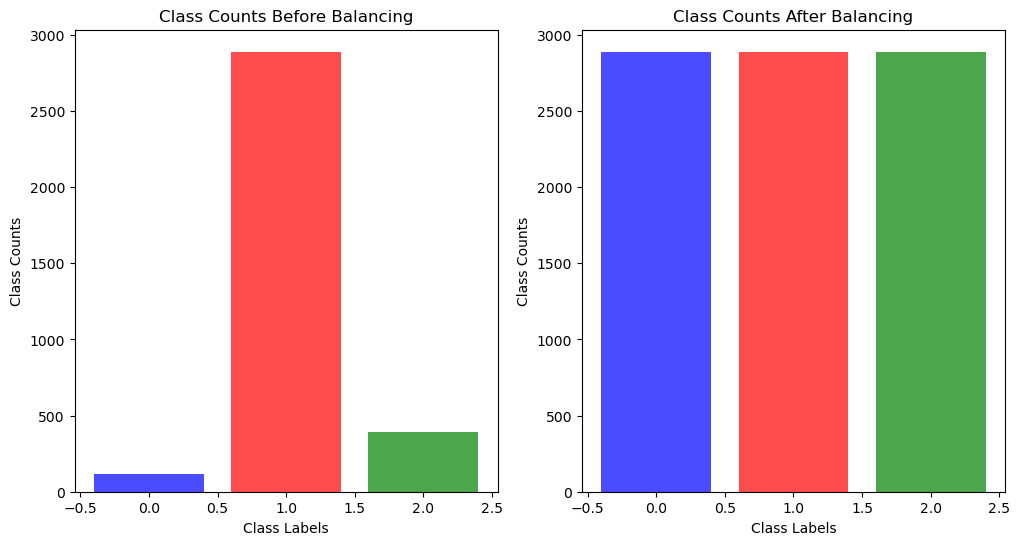

In [135]:
#balancing with smote
from imblearn.over_sampling import SMOTE
class_counts = np.unique(Y_train_2, return_counts=True)

# Display the class counts before balancing
print("Class Counts Before Balancing:")
print(class_counts)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
train_X_smote, train_y_smote = smote.fit_resample(X_train_2, Y_train_2)

# Count the occurrences of each class after balancing
balanced_class_counts = np.unique(train_y_smote, return_counts=True)

# Display the class counts after balancing
print("\nClass Counts After Balancing:")
print(balanced_class_counts)

import matplotlib.pyplot as plt

# Assuming `class_counts` and `balanced_class_counts` contain the class labels and counts before and after SMOTE
# You should replace `class_counts` and `balanced_class_counts` with your actual data if these are placeholders

# Unpack the class labels and counts from the tuples
class_labels_before, counts_before = class_counts[0], class_counts[1]
class_labels_after, counts_after = balanced_class_counts[0], balanced_class_counts[1]

# Specify colors for each class
colors_before = ['blue', 'red', 'green'] # Adjust or extend the colors as needed
colors_after = ['blue', 'red', 'green'] # Adjust or extend the colors as needed

# Plotting class counts before and after balancing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for before balancing
ax1.bar(class_labels_before, counts_before, color=colors_before, alpha=0.7)
ax1.set_title('Class Counts Before Balancing')
ax1.set_xlabel('Class Labels')
ax1.set_ylabel('Class Counts')

# Bar plot for after balancing
ax2.bar(class_labels_after, counts_after, color=colors_after, alpha=0.7)
ax2.set_title('Class Counts After Balancing')
ax2.set_xlabel('Class Labels')
ax2.set_ylabel('Class Counts')

plt.show()

In [136]:
!pip install --upgrade numpy scipy threadpoolctl


In [137]:
#the new smote cell
train_X_smote

age     test_X1   test_X2     test_X3   test_X4     test_X5  \
0     30.000000    2.000000  3.500000  120.000000  1.180000  102.000000   
1     25.000000   26.400000  2.300000   73.000000  1.090000   67.000000   
2     38.000000    0.400000  2.400000  102.000000  1.120000   92.000000   
3     55.000000    0.035000  4.400000  195.000000  0.820000  237.000000   
4     70.000000    2.800000  2.400000  111.000000  0.800000  139.000000   
...         ...         ...       ...         ...       ...         ...   
8665   2.484422  472.181658  1.710160   34.333040  1.173936   29.151382   
8666  66.724935    7.582519  1.730960  108.431234  1.030000  105.431234   
8667  56.737594   28.170226  0.600000   21.695038  0.869220   26.170226   
8668  60.949650   19.546854  2.063999  104.251748  0.975335  109.733813   
8669  83.577878   33.947235  0.789701   52.633183  1.112638   47.422122   

      gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
0          0.000000     1.000000      1.0       0.0  ...                1.0   
1          1.000000     0.000000      1.0       0.0  ...                0.0   
2          1.000000     0.000000      1.0       0.0  ...                0.0   
3          1.000000     0.000000      1.0       0.0  ...                0.0   
4          1.000000     0.000000      1.0       0.0  ...                1.0   
...             ...          ...      ...       ...  ...                ...   
8665       1.000000     0.000000      1.0       0.0  ...                0.0   
8666       1.000000     0.000000      1.0       0.0  ...                0.0   
8667       0.652481     0.347519      1.0       0.0  ...                0.0   
8668       0.000000     1.000000      1.0       0.0  ...                0.0   
8669       1.000000     0.000000      1.0       0.0  ...                0.0   

      mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
0                    1.0                  0.0         1.0          0.0   
1                    1.0                  0.0         1.0          0.0   
2                    1.0                  0.0         1.0          0.0   
3                    1.0                  0.0         1.0          0.0   
4                    1.0                  0.0         1.0          0.0   
...                  ...                  ...         ...          ...   
8665                 1.0                  0.0         1.0          0.0   
8666                 1.0                  0.0         1.0          0.0   
8667                 1.0                  0.0         1.0          0.0   
8668                 1.0                  0.0         1.0          0.0   
8669                 1.0                  0.0         1.0          0.0   

      treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
0                    1.0                  0.0         1.0          0.0   
1                    1.0                  0.0         1.0          0.0   
2                    1.0                  0.0         1.0          0.0   
3                    1.0                  0.0         1.0          0.0   
4                    1.0                  0.0         1.0          0.0   
...                  ...                  ...         ...          ...   
8665                 1.0                  0.0         1.0          0.0   
8666                 1.0                  0.0         1.0          0.0   
8667                 1.0                  0.0         1.0          0.0   
8668                 1.0                  0.0         1.0          0.0   
8669                 1.0                  0.0         1.0          0.0   

      age_group  
0      5.000000  
1      5.000000  
2      2.000000  
3      4.000000  
4      1.000000  
...         ...  
8665   3.060553  
8666   1.000000  
8667   4.000000  
8668   4.000000  
8669   1.000000  

[8670 rows x 35 columns]

In [138]:
#the new smote
train_y_smote.value_counts()

target
1    2890
2    2890
0    2890
Name: count, dtype: int64

In [139]:
from sklearn.preprocessing import StandardScaler


# Define your numerical columns
NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3", "test_X4", "test_X5"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_X_smote[NUMERICAL_COLUMNS])

# Transform the training, validation, and test data
train_X_smote[NUMERICAL_COLUMNS] = scaler.transform(train_X_smote[NUMERICAL_COLUMNS])


In [140]:
train_X_smote

age   test_X1   test_X2   test_X3   test_X4   test_X5  \
0    -1.225312 -0.281992  0.531669 -0.039213  1.234531 -0.376717   
1    -1.499720  0.197469 -0.199614 -0.755814  0.713085 -0.789694   
2    -0.786259 -0.313432 -0.138674 -0.313656  0.886901 -0.494710   
3     0.146729 -0.320604  1.080131  1.104300 -0.851252  1.216196   
4     0.969954 -0.266272 -0.138674 -0.176434 -0.967129  0.059859   
...        ...       ...       ...       ...       ...       ...   
8665 -2.735412  8.957087 -0.559064 -1.345362  1.199397 -1.236283   
8666  0.790213 -0.172295 -0.546389 -0.215600  0.365455 -0.336230   
8667  0.242091  0.232254 -1.235599 -1.538052 -0.566082 -1.271459   
8668  0.473256  0.062804 -0.343434 -0.279324  0.048734 -0.285463   
8669  1.715130  0.345772 -1.119995 -1.066343  0.844248 -1.020700   

      gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
0          0.000000     1.000000      1.0       0.0  ...                1.0   
1          1.000000     0.000000      1.0       0.0  ...                0.0   
2          1.000000     0.000000      1.0       0.0  ...                0.0   
3          1.000000     0.000000      1.0       0.0  ...                0.0   
4          1.000000     0.000000      1.0       0.0  ...                1.0   
...             ...          ...      ...       ...  ...                ...   
8665       1.000000     0.000000      1.0       0.0  ...                0.0   
8666       1.000000     0.000000      1.0       0.0  ...                0.0   
8667       0.652481     0.347519      1.0       0.0  ...                0.0   
8668       0.000000     1.000000      1.0       0.0  ...                0.0   
8669       1.000000     0.000000      1.0       0.0  ...                0.0   

      mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
0                    1.0                  0.0         1.0          0.0   
1                    1.0                  0.0         1.0          0.0   
2                    1.0                  0.0         1.0          0.0   
3                    1.0                  0.0         1.0          0.0   
4                    1.0                  0.0         1.0          0.0   
...                  ...                  ...         ...          ...   
8665                 1.0                  0.0         1.0          0.0   
8666                 1.0                  0.0         1.0          0.0   
8667                 1.0                  0.0         1.0          0.0   
8668                 1.0                  0.0         1.0          0.0   
8669                 1.0                  0.0         1.0          0.0   

      treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
0                    1.0                  0.0         1.0          0.0   
1                    1.0                  0.0         1.0          0.0   
2                    1.0                  0.0         1.0          0.0   
3                    1.0                  0.0         1.0          0.0   
4                    1.0                  0.0         1.0          0.0   
...                  ...                  ...         ...          ...   
8665                 1.0                  0.0         1.0          0.0   
8666                 1.0                  0.0         1.0          0.0   
8667                 1.0                  0.0         1.0          0.0   
8668                 1.0                  0.0         1.0          0.0   
8669                 1.0                  0.0         1.0          0.0   

      age_group  
0      5.000000  
1      5.000000  
2      2.000000  
3      4.000000  
4      1.000000  
...         ...  
8665   3.060553  
8666   1.000000  
8667   4.000000  
8668   4.000000  
8669   1.000000  

[8670 rows x 35 columns]

In [141]:
#Data to train with
#train data 1
train_X_smote
train_y_smote
#train data 2
X_train
Y_train
#val data
X_val 
Y_val

id
PA3443    1
PA3880    1
PA3806    1
PA2205    1
PA2208    2
         ..
PA1935    0
PA2255    1
PA4109    1
PA2921    1
PA4751    1
Name: target, Length: 850, dtype: int32

In [142]:
#to check the val train has the same as the train data
X_val

age   test_X1   test_X2   test_X3   test_X4   test_X5  \
id                                                                   
PA3443 -0.013848 -0.301750 -0.346765 -0.325137 -0.143684 -0.300495   
PA3880 -0.005318 -0.275640 -0.328278 -0.325137 -0.941245 -0.074424   
PA3806  0.014586 -0.286830 -0.606563 -0.946666 -0.941245 -0.673511   
PA2205  0.001791 -0.292425 -0.190887 -0.280742 -0.250025 -0.243977   
PA2208  0.023116 -0.182389 -0.328278 -0.014373 -0.143684 -0.051817   
...          ...       ...       ...       ...       ...       ...   
PA1935 -0.038017 -0.320306  0.276748  0.917921 -0.303196  0.807250   
PA2255 -0.006739 -0.236474 -0.502644 -0.473120  0.653878 -0.571779   
PA4109 -0.006739 -0.298020 -0.138928 -0.413927  0.441195 -0.503958   
PA2921  0.031647 -0.183463 -0.328278 -0.267133  0.020327 -0.276861   
PA4751  0.010321 -0.320027 -0.328278 -0.029171 -0.037342 -0.085728   

        gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                                     ...                      
PA3443            0.0          1.0      1.0       0.0  ...                0.0   
PA3880            0.0          1.0      1.0       0.0  ...                0.0   
PA3806            0.0          1.0      1.0       0.0  ...                0.0   
PA2205            0.0          1.0      1.0       0.0  ...                0.0   
PA2208            0.0          1.0      1.0       0.0  ...                0.0   
...               ...          ...      ...       ...  ...                ...   
PA1935            1.0          0.0      1.0       0.0  ...                0.0   
PA2255            1.0          0.0      1.0       0.0  ...                0.0   
PA4109            1.0          0.0      1.0       0.0  ...                0.0   
PA2921            1.0          0.0      1.0       0.0  ...                0.0   
PA4751            1.0          0.0      1.0       0.0  ...                0.0   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA3443                 1.0                  0.0         1.0          0.0   
PA3880                 1.0                  0.0         1.0          0.0   
PA3806                 1.0                  0.0         1.0          0.0   
PA2205                 1.0                  0.0         1.0          0.0   
PA2208                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA1935                 1.0                  0.0         1.0          0.0   
PA2255                 1.0                  0.0         1.0          0.0   
PA4109                 1.0                  0.0         1.0          0.0   
PA2921                 1.0                  0.0         1.0          0.0   
PA4751                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA3443                 1.0                  0.0         1.0          0.0   
PA3880                 1.0                  0.0         1.0          0.0   
PA3806                 1.0                  0.0         1.0          0.0   
PA2205                 1.0                  0.0         1.0          0.0   
PA2208                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA1935                 1.0                  0.0         1.0          0.0   
PA2255                 1.0                  0.0         1.0          0.0   
PA4109                 1.0                  0.0         1.0          0.0   
PA2921                 1.0                  0.0         1.0          0.0   
PA4751                 1.0                  0.0         1.0          0.0   

        age_group  
id                 
PA3443        4.0  
PA3880    

In [143]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume X_train is your features DataFrame and y_train is the series with target variables
# Ensure that X_train and y_train are properly prepared as pandas DataFrame and Series, respectively

# Check the type of X_train to ensure it's a DataFrame
print(type(train_X_smote))

# Specify the number of top features you want to keep, for example, 12
k = 35  # Adjust 'k' as needed based on the total number of features or desired number of top features

# Initialize and fit the SelectKBest with the f_classif (ANOVA F-value between label/feature for classification tasks)
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(train_X_smote, train_y_smote)

# Retrieve the column names for the selected columns
selected_features =train_X_smote.columns[selector.get_support()]

# Retrieve the scores for the selected columns
scores = selector.scores_[selector.get_support()]

# Pair the feature names with their corresponding scores
names_scores = list(zip(selected_features, scores))

# Store the information in a DataFrame and sort it
ns_df = pd.DataFrame(data=names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(by=['F_Scores', 'Feat_names'], ascending=[False, True])

# Output the sorted DataFrame and the shape of the transformed data
print(ns_df_sorted)
print("Shape of transformed data:", X_new.shape)

<class 'pandas.core.frame.DataFrame'>
             Feat_names     F_Scores
3               test_X3  6099.034683
5               test_X5  4981.862992
2               test_X2  4198.036512
14     concern_type2_no  1167.375471
15    concern_type2_yes  1167.375471
1               test_X1   810.314499
4               test_X4   258.541086
20      medication_A_no   185.490242
21     medication_A_yes   185.490242
33          suspect_yes   152.889186
32           suspect_no   152.889186
24     mental_health_no   122.570165
25    mental_health_yes   122.570165
6         gender_female    59.029845
7           gender_male    59.029845
22      medication_B_no    46.326804
23     medication_B_yes    46.326804
19            tumor_yes    39.975064
18             tumor_no    39.975064
34            age_group    38.822159
17      enlargement_yes    31.325289
16       enlargement_no    31.325289
28           surgery_no    28.775945
29          surgery_yes    28.775945
27  mood_stabiliser_yes    25.980552


In [144]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assume X_train is your features DataFrame and y_train is the series with target variables
# Ensure that X_train and y_train are properly prepared as pandas DataFrame and Series, respectively

# Check the type of X_train to ensure it's a DataFrame
print(type(X_train))

# Specify the number of top features you want to keep, for example, 12
k = 35  # Adjust 'k' as needed based on the total number of features or desired number of top features

# Initialize and fit the SelectKBest with the f_classif (ANOVA F-value between label/feature for classification tasks)
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X_train, Y_train)

# Retrieve the column names for the selected columns
selected_features =X_train.columns[selector.get_support()]

# Retrieve the scores for the selected columns
scores = selector.scores_[selector.get_support()]

# Pair the feature names with their corresponding scores
names_scores = list(zip(selected_features, scores))

# Store the information in a DataFrame and sort it
ns_df = pd.DataFrame(data=names_scores, columns=['Feat_names', 'F_Scores'])
ns_df_sorted = ns_df.sort_values(by=['F_Scores', 'Feat_names'], ascending=[False, True])

# Output the sorted DataFrame and the shape of the transformed data
print(ns_df_sorted)
print("Shape of transformed data:", X_new.shape)

<class 'pandas.core.frame.DataFrame'>
             Feat_names     F_Scores
3               test_X3  5334.536608
5               test_X5  4217.756717
2               test_X2  2837.076046
15    concern_type2_yes   958.883927
14     concern_type2_no   958.883927
1               test_X1   818.769057
4               test_X4   227.973432
21     medication_A_yes   163.166274
20      medication_A_no   163.166274
33          suspect_yes   119.815988
32           suspect_no   119.815988
24     mental_health_no   102.444448
25    mental_health_yes   102.444448
34            age_group    58.331452
18             tumor_no    44.456552
19            tumor_yes    44.456552
7           gender_male    38.230520
6         gender_female    38.230520
17      enlargement_yes    31.325289
16       enlargement_no    31.325289
22      medication_B_no    29.315437
23     medication_B_yes    29.315437
28           surgery_no    26.097721
29          surgery_yes    26.097721
27  mood_stabiliser_yes    15.419793


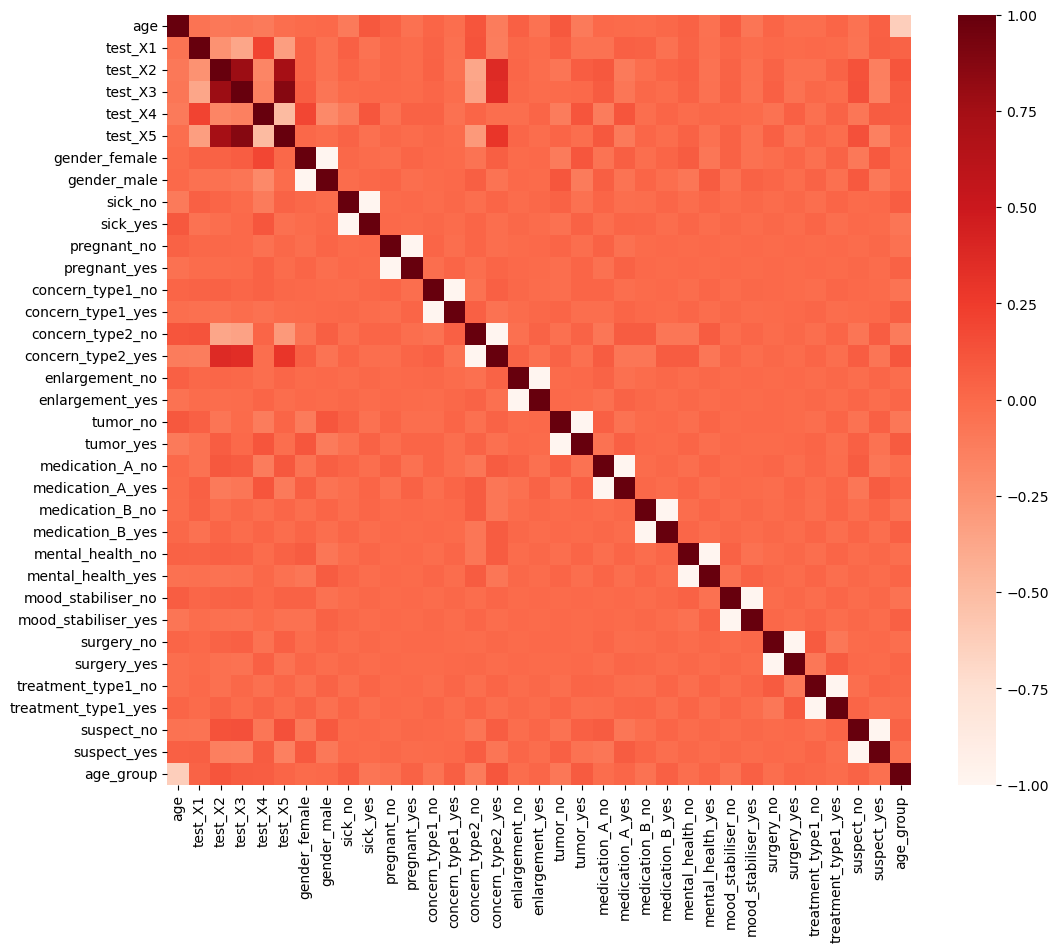

In [145]:
#check for correlation and selected columns that are highly correlated
corr_1 = train_X_smote.corr()
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr_1, annot=False, cmap=plt.cm.Reds)
plt.show()


In [146]:
columns = np.full((corr_1.shape[0],), True, dtype=bool)
for i in range(corr_1.shape[0]):
    for j in range(i+1, corr_1.shape[0]):
        if corr_1.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = train_X_smote.columns[columns]
selected_columns

Index(['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
       'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
       'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
       'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
       'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
       'medication_B_yes', 'mental_health_no', 'mental_health_yes',
       'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
       'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
       'suspect_no', 'suspect_yes', 'age_group'],
      dtype='object')

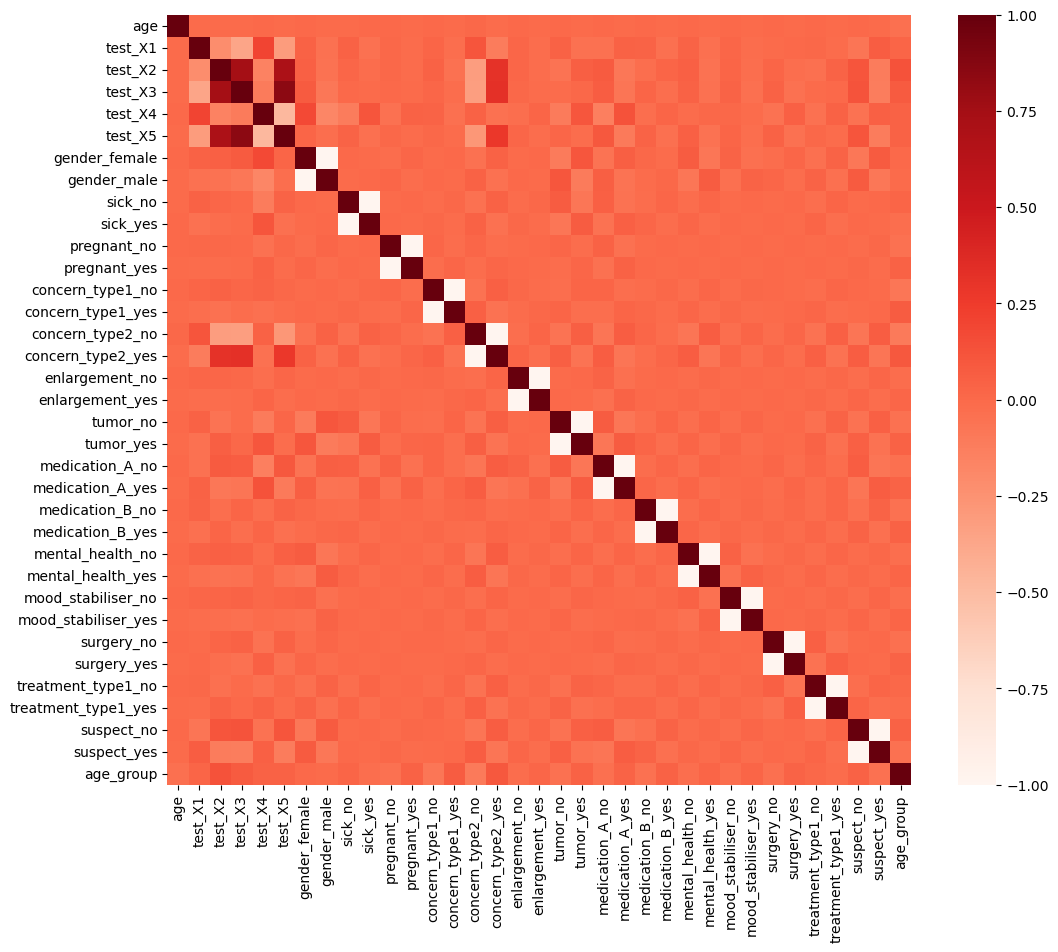

In [147]:
#check for correlation and selected columns that are highly correlated

#check for correlation and selected columns that are highly correlated
corr_2 = X_train.corr()
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(corr_2, annot=False, cmap=plt.cm.Reds)
plt.show()

In [148]:
columns = np.full((corr_2.shape[0],), True, dtype=bool)
for i in range(corr_2.shape[0]):
    for j in range(i+1, corr_2.shape[0]):
        if corr_2.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = X_train.columns[columns]
selected_columns

Index(['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
       'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
       'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
       'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
       'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
       'medication_B_yes', 'mental_health_no', 'mental_health_yes',
       'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
       'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
       'suspect_no', 'suspect_yes', 'age_group'],
      dtype='object')

In [149]:
X_train.columns

Index(['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5',
       'gender_female', 'gender_male', 'sick_no', 'sick_yes', 'pregnant_no',
       'pregnant_yes', 'concern_type1_no', 'concern_type1_yes',
       'concern_type2_no', 'concern_type2_yes', 'enlargement_no',
       'enlargement_yes', 'tumor_no', 'tumor_yes', 'medication_A_no',
       'medication_A_yes', 'medication_B_no', 'medication_B_yes',
       'mental_health_no', 'mental_health_yes', 'mood_stabiliser_no',
       'mood_stabiliser_yes', 'surgery_no', 'surgery_yes',
       'treatment_type1_no', 'treatment_type1_yes', 'suspect_no',
       'suspect_yes', 'age_group'],
      dtype='object')

## Summary of Feature Selection and Correlation Analysis for Medical Predictive Modeling
Executive Summary:
This report presents the feature selection and correlation analysis conducted on a medical dataset, focusing on optimizing predictive modeling by using all features and those selected after addressing multicollinearity.

Methods and Results:

Feature Selection: Applied the F-score method, identifying key predictive features such as 'test_X3', 'test_X5', and 'test_X2'.
Correlation Analysis: Used a correlation threshold to highlight and address highly correlated features, especially between 'test_X3' and 'test_X5'.
Model Development Strategy:

Dual Approach: Models are being developed using both the complete set of features and a refined subset post-correlation analysis, allowing for effective comparison and optimal use of data.

## Modelling
Note: for the gridsearch, we will write references on the most important parameters used for the hyperparameter tunning

In [150]:
#Data to train with
#train data 1
train_X_smote
train_y_smote
#train data 2
X_train
Y_train
#val data
X_val 
Y_val

id
PA3443    1
PA3880    1
PA3806    1
PA2205    1
PA2208    2
         ..
PA1935    0
PA2255    1
PA4109    1
PA2921    1
PA4751    1
Name: target, Length: 850, dtype: int32

## Knn Model

In [151]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()
# Get the parameters of the KNN model
params = knn.get_params()
print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [152]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

## Manual Balanced Data

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline KNN model with all features
knn_model_all_tune = KNeighborsClassifier(n_neighbors=3)
knn_model_all_tune.fit(X_train, Y_train)
pred_train_all = knn_model_all_tune.predict(X_train)
pred_val_all = knn_model_all_tune.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(Y_train, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(Y_train, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(Y_train, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()

# KNN model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]

knn_model_corr_tune = KNeighborsClassifier(n_neighbors=3)
knn_model_corr_tune.fit(X_train_corr, Y_train)
pred_train_corr = knn_model_corr_tune.predict(X_train_corr)
pred_val_corr = knn_model_corr_tune.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(Y_train, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(Y_train, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(Y_train, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))

Training Accuracy with all features: 0.9868512110726644
Validation Accuracy with all features: 0.8494117647058823
Training Precision with all features: 0.9871933512758669
Validation Precision with all features: 0.7037167891464104
Training Recall with all features: 0.9868512110726644
Validation Recall with all features: 0.7447227090282097

Training Accuracy with correlated features: 0.9865051903114187
Validation Accuracy with correlated features: 0.8435294117647059
Training Precision with correlated features: 0.9868522922232615
Validation Precision with correlated features: 0.6749446344563693
Training Recall with correlated features: 0.9865051903114187
Validation Recall with correlated features: 0.7211154452547408


In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline KNN model with all features
knn_model_all = KNeighborsClassifier()
knn_model_all.fit(X_train, Y_train)
pred_train_all = knn_model_all.predict(X_train)
pred_val_all = knn_model_all.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(Y_train, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(Y_train, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(Y_train, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()

# KNN model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]

knn_model_corr = KNeighborsClassifier()
knn_model_corr.fit(X_train_corr, Y_train)
pred_train_corr = knn_model_corr.predict(X_train_corr)
pred_val_corr = knn_model_corr.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(Y_train, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(Y_train, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(Y_train, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))


Training Accuracy with all features: 0.9697808535178778
Validation Accuracy with all features: 0.8211764705882353
Training Precision with all features: 0.9714418570629051
Validation Precision with all features: 0.6747927396125514
Training Recall with all features: 0.9697808535178778
Validation Recall with all features: 0.7600994968624569

Training Accuracy with correlated features: 0.9718569780853518
Validation Accuracy with correlated features: 0.8129411764705883
Training Precision with correlated features: 0.9732587744468432
Validation Precision with correlated features: 0.6366245133213942
Training Recall with correlated features: 0.9718569780853518
Validation Recall with correlated features: 0.7373992625674463


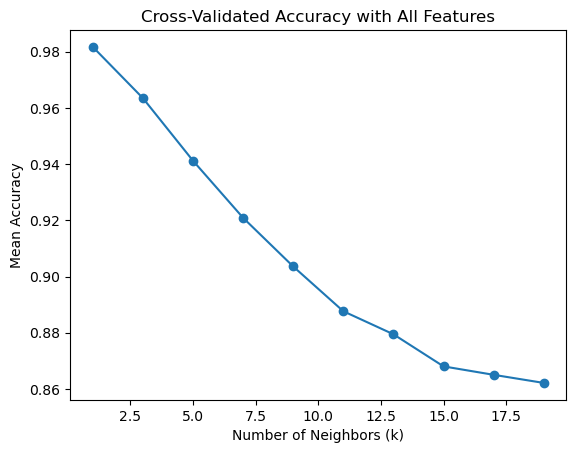

The best value of k for Cross-Validated Accuracy with All Features is: 1


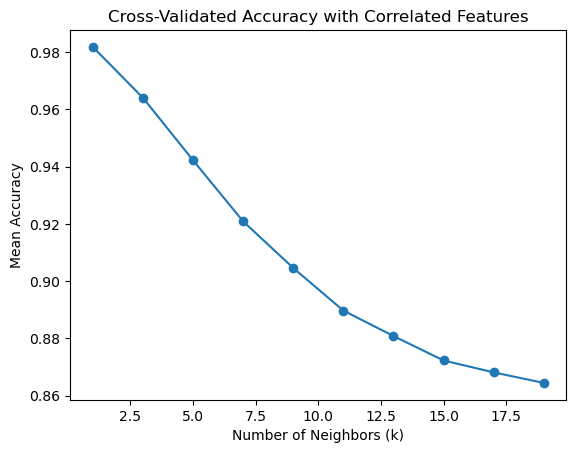

The best value of k for Cross-Validated Accuracy with Correlated Features is: 1


In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# All features
X_train_all = X_train  # Assuming X_train has all features
Y_train_all = Y_train


# Correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]

# Create a range of odd k values to try
k_values = np.arange(1, 21, 2)

# Function to perform cross-validation and plot results
def evaluate_knn(X, y, k_values, title):
    mean_accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracies = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        mean_accuracies.append(np.mean(accuracies))
    plt.plot(k_values, mean_accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Accuracy')
    plt.title(title)
    plt.show()
    best_k = k_values[np.argmax(mean_accuracies)]
    print(f'The best value of k for {title} is: {best_k}')

# Evaluate all features
evaluate_knn(X_train_all, Y_train_all, k_values, 'Cross-Validated Accuracy with All Features')


# Evaluate correlated features
evaluate_knn(X_train_corr, Y_train_all, k_values, 'Cross-Validated Accuracy with Correlated Features')

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_train, Y_train, X_val, Y_val are already defined as per your subsets

# Define the parameter grid
parameters = {
    "n_neighbors": range(1, 21, 2),
    "weights": ['uniform', 'distance'],
    "algorithm": ['ball_tree', 'kd_tree', 'brute'],
    "p": [1, 2]
}

# Function to perform Grid Search CV and print results, including both training and validation accuracy
def perform_grid_search_and_evaluate(X_train, Y_train, X_val, Y_val, parameters, feature_set_name):
    kNN = KNeighborsClassifier()
    clf = GridSearchCV(kNN, param_grid=parameters, cv=5, scoring='accuracy')
    clf.fit(X_train, Y_train)
    print(f"Best parameters for {feature_set_name}:", clf.best_params_)

    # Predict on the training set using the best estimator
    y_pred_train = clf.best_estimator_.predict(X_train)
    train_accuracy = accuracy_score(Y_train, y_pred_train)
    print(f"Training Accuracy for {feature_set_name}: {train_accuracy:.2f}")

    # Predict on the validation set using the best estimator
    y_pred_val = clf.best_estimator_.predict(X_val)
    val_accuracy = accuracy_score(Y_val, y_pred_val)
    print(f"Validation Accuracy for {feature_set_name}: {val_accuracy:.2f}")

    return clf

# Perform Grid Search and evaluate on validation data for all features
clf_all = perform_grid_search_and_evaluate(X_train_all, Y_train_all, X_val, Y_val, parameters, "all features")


# Perform Grid Search and evaluate on validation data for correlated features
clf_corr = perform_grid_search_and_evaluate(X_train_corr, Y_train_all, X_val[corr_features], Y_val, parameters, "correlated features")

Best parameters for all features: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy for all features: 1.00
Validation Accuracy for all features: 0.88
Best parameters for correlated features: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy for correlated features: 1.00
Validation Accuracy for correlated features: 0.89


# smote balanced data

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline KNN model with all features
knn_model_all_smote = KNeighborsClassifier()
knn_model_all_smote.fit(train_X_smote, train_y_smote)
pred_train_all = knn_model_all_smote.predict(train_X_smote)
pred_val_all = knn_model_all_smote.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(train_y_smote, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()


# KNN model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]

knn_model_corr_smote = KNeighborsClassifier()
knn_model_corr_smote.fit(X_train_corr, train_y_smote)
pred_train_corr = knn_model_corr_smote.predict(X_train_corr)
pred_val_corr = knn_model_corr_smote.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(train_y_smote, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))

Training Accuracy with all features: 0.970242214532872
Validation Accuracy with all features: 0.7788235294117647
Training Precision with all features: 0.9709422214600352
Validation Precision with all features: 0.6143246874281357
Training Recall with all features: 0.9702422145328718
Validation Recall with all features: 0.70637244740925

Training Accuracy with correlated features: 0.9693194925028835
Validation Accuracy with correlated features: 0.768235294117647
Training Precision with correlated features: 0.9700283081971156
Validation Precision with correlated features: 0.5900840153210737
Training Recall with correlated features: 0.9693194925028835
Validation Recall with correlated features: 0.7323352240249749


In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline KNN model with all features
knn_model_all_smotuned = KNeighborsClassifier(n_neighbors=3)
knn_model_all_smotuned.fit(train_X_smote, train_y_smote)
pred_train_all = knn_model_all_smotuned.predict(train_X_smote)
pred_val_all = knn_model_all_smotuned.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(train_y_smote, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()

# KNN model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]

knn_model_corr_smotuned = KNeighborsClassifier(n_neighbors=3)
knn_model_corr_smotuned.fit(X_train_corr, train_y_smote)
pred_train_corr = knn_model_corr_smotuned.predict(X_train_corr)
pred_val_corr = knn_model_corr_smotuned.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(train_y_smote, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))

Training Accuracy with all features: 0.9835063437139562
Validation Accuracy with all features: 0.7917647058823529
Training Precision with all features: 0.9837713379384878
Validation Precision with all features: 0.6297541397592444
Training Recall with all features: 0.9835063437139562
Validation Recall with all features: 0.705571573042883

Training Accuracy with correlated features: 0.9829296424452134
Validation Accuracy with correlated features: 0.7905882352941176
Training Precision with correlated features: 0.9831879994010954
Validation Precision with correlated features: 0.6245098039215686
Training Recall with correlated features: 0.9829296424452134
Validation Recall with correlated features: 0.7381674738224007


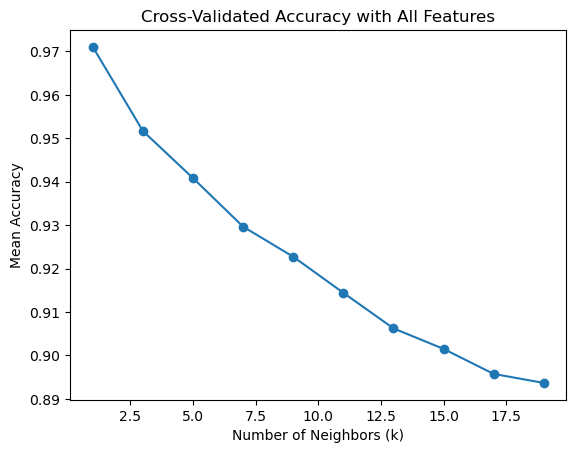

The best value of k for Cross-Validated Accuracy with All Features is: 1


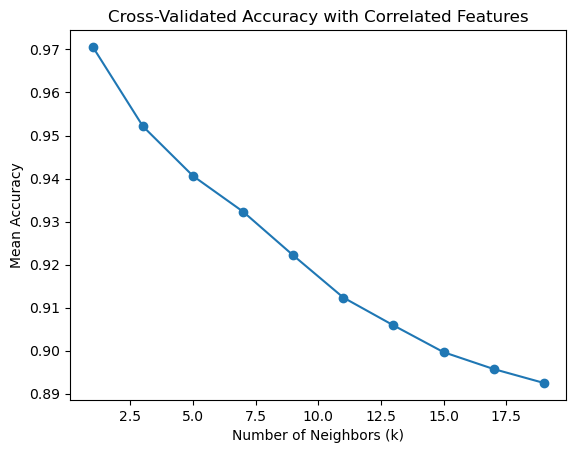

The best value of k for Cross-Validated Accuracy with Correlated Features is: 1


In [159]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

# All features
X_train_all = train_X_smote  # Assuming X_train has all features
Y_train_all = train_y_smote


# Correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]

# Create a range of odd k values to try
k_values = np.arange(1, 21, 2)

# Function to perform cross-validation and plot results
def evaluate_knn(X, y, k_values, title):
    mean_accuracies = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        accuracies = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
        mean_accuracies.append(np.mean(accuracies))
    plt.plot(k_values, mean_accuracies, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Accuracy')
    plt.title(title)
    plt.show()
    best_k = k_values[np.argmax(mean_accuracies)]
    print(f'The best value of k for {title} is: {best_k}')

# Evaluate all features
evaluate_knn(X_train_all, Y_train_all, k_values, 'Cross-Validated Accuracy with All Features')


# Evaluate correlated features
evaluate_knn(X_train_corr, Y_train_all, k_values, 'Cross-Validated Accuracy with Correlated Features')

In [160]:
#classification report for the best value of k on train, on the val data with all features
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assume you have already determined the best k value. Let's say it was found to be:
best_k = 1

# Initialize the KNeighborsClassifier using the best k
knn_best = KNeighborsClassifier(n_neighbors=best_k)

# Assuming X_train_all and Y_train_all are your full training datasets
# and X_val, Y_val are your validation datasets
knn_best.fit(X_train_all, Y_train_all)  # Train the classifier on the full training dataset

# Predict on the validation set
Y_pred_val = knn_best.predict(X_val)

# Generate and print the classification report
report = classification_report(Y_val, Y_pred_val)
print("Classification Report for Best k on Validation Data:")
print(report)

Classification Report for Best k on Validation Data:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        30
           1       0.91      0.86      0.89       722
           2       0.35      0.48      0.40        98

    accuracy                           0.82       850
   macro avg       0.65      0.70      0.67       850
weighted avg       0.84      0.82      0.83       850



In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

def perform_grid_search_and_evaluate(train_X_smote, train_y_smote, X_val, Y_val, parameters, feature_set_name):
    kNN = KNeighborsClassifier()
    clf = GridSearchCV(kNN, param_grid=parameters, cv=5, scoring='accuracy')
    clf.fit(train_X_smote, train_y_smote)
    
    # Get the best estimator and predict on both training and validation sets
    best_knn = clf.best_estimator_
    y_train_pred = best_knn.predict(train_X_smote)  # Predict on training set
    y_val_pred = best_knn.predict(X_val)  # Predict on validation set
    
    # Calculate accuracy for both sets
    train_accuracy = accuracy_score(train_y_smote, y_train_pred)
    val_accuracy = accuracy_score(Y_val, y_val_pred)
    
    # Print best parameters and accuracies
    print(f"Best parameters for {feature_set_name}: {clf.best_params_}")
    print(f"Training Accuracy for {feature_set_name}: {train_accuracy:.2f}")
    print(f"Validation Accuracy for {feature_set_name}: {val_accuracy:.2f}")
    

    return clf

# Example usage
clf_all_smote = perform_grid_search_and_evaluate(X_train_all, Y_train_all, X_val, Y_val, parameters, "all features")
clf_corr_smote = perform_grid_search_and_evaluate(X_train_corr, Y_train_all, X_val[corr_features], Y_val, parameters, "correlated features")

Best parameters for all features: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy for all features: 1.00
Validation Accuracy for all features: 0.86
Best parameters for correlated features: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy for correlated features: 1.00
Validation Accuracy for correlated features: 0.85


### classification report for the best knn model, from the gridsearch, on the manual balanced data, with the results after checking  correlated features

Classification Report for Best k on Validation Data:
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.92      0.95      0.93       722
           2       0.62      0.46      0.53        98

    accuracy                           0.89       850
   macro avg       0.77      0.69      0.73       850
weighted avg       0.88      0.89      0.88       850



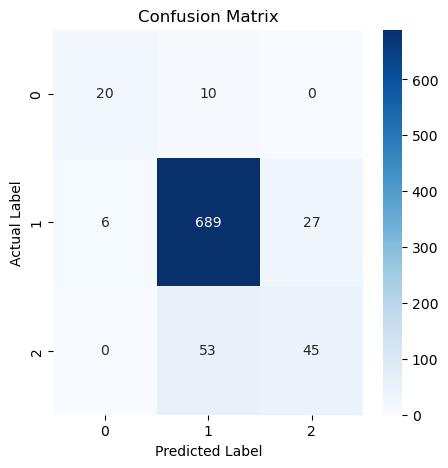

In [162]:
#classification report for the best knn model, from the gridsearch, on the manual balanced data, with the results after 
#checking 
#correlated features

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the KNeighborsClassifier using the best k
knn_best = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree', p=1, weights='uniform')

# Assuming X_train[corr_features] and Y_train are your training datasets
# and X_val[corr_features], Y_val are your validation datasets
knn_best.fit(X_train[corr_features], Y_train)  # Train the classifier on the training dataset using correlated features

# Predict on the validation set
Y_pred_val = knn_best.predict(X_val[corr_features])

# Generate and print the classification report
report = classification_report(Y_val, Y_pred_val)
print("Classification Report for Best k on Validation Data:")
print(report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_val, Y_pred_val)

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### check for overfitting and under fitting

In [163]:
#knn models all performed so well on both the manual and smothe balanced data on the training set, but the model used for the mnual balancing, performed better on the validation set.

### SVM Model

In [164]:
#checking the default parameter of svm model
from sklearn.svm import SVC

svc = SVC()
# Get the parameters of the KNN model
params = svc.get_params()
print(params)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [165]:
#checking the default parameter of svm model
#using the shift+tab key to key the other options for the various parameters
from sklearn.svm import SVC

svc = SVC()

## Manual Balanced Data

In [166]:
#using the deafult parameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline SVC model with all features
svc_model_all = SVC()
svc_model_all.fit(X_train, Y_train)
pred_train_all = svc_model_all.predict(X_train)
pred_val_all = svc_model_all.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(Y_train, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(Y_train, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(Y_train, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()


# SVC model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]

svc_model_corr = SVC()
svc_model_corr.fit(X_train_corr, Y_train)
pred_train_corr = svc_model_corr.predict(X_train_corr)
pred_val_corr = svc_model_corr.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(Y_train, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(Y_train, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(Y_train, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))

Training Accuracy with all features: 0.942560553633218
Validation Accuracy with all features: 0.9364705882352942
Training Precision with all features: 0.9438755530408649
Validation Precision with all features: 0.8159255742397944
Training Recall with all features: 0.9425605536332179
Validation Recall with all features: 0.8913160093215495

Training Accuracy with correlated features: 0.9412918108419839
Validation Accuracy with correlated features: 0.94
Training Precision with correlated features: 0.9423707815365612
Validation Precision with correlated features: 0.8141976076116689
Training Recall with correlated features: 0.9412918108419839
Validation Recall with correlated features: 0.9092298415210959


Classification Report for Validation Data with Correlated Features:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        30
           1       0.98      0.95      0.96       722
           2       0.79      0.88      0.83        98

    accuracy                           0.94       850
   macro avg       0.81      0.91      0.86       850
weighted avg       0.95      0.94      0.94       850

Classification Report for training Data with Correlated Features:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2890
           1       0.89      0.94      0.91      2890
           2       0.96      0.89      0.92      2890

    accuracy                           0.94      8670
   macro avg       0.94      0.94      0.94      8670
weighted avg       0.94      0.94      0.94      8670



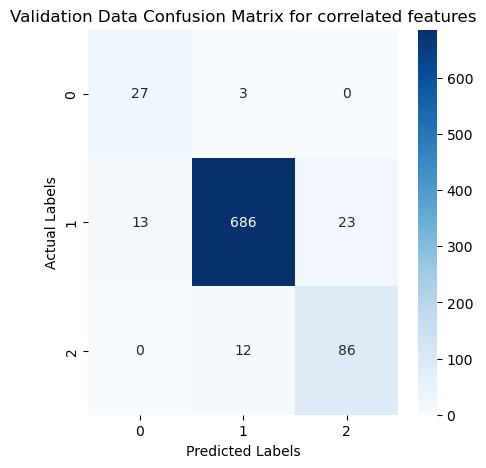

In [167]:
# Generate and print the classification reports for the best model up which is with output after checking correlated features
report_train = classification_report(Y_train, pred_train_corr)
report_val = classification_report(Y_val, pred_val_corr)

print("Classification Report for Validation Data with Correlated Features:")
print(report_val)

print("Classification Report for training Data with Correlated Features:")
print(report_train)

#confusion matrix for manual balance data, best model on val, which is the base model on correlated features
#tunning worked better on the train but not on the val
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix for validation data
conf_matrix_val = confusion_matrix(Y_val, pred_val_corr)

# Visualize the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_val, annot=True, fmt="d", cmap='Blues')
plt.title('Validation Data Confusion Matrix for correlated features')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

In [168]:
#IT WORKED THE SAME WAY ON BOTH THE TRAINING AND VAL DATA SET

In [169]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd  # Import pandas for DataFrame handling

# Function to train and evaluate the model with different feature sets
def train_and_evaluate(features, X_train, Y_train, X_val, Y_val):
    X_train_subset = X_train[features]
    X_val_subset = X_val[features]

    # Pipeline for SVC
    classifier_svc = SVC(random_state=3)
    pipeline_svc = Pipeline([
        ('classifier', classifier_svc)
    ])

    # Hyperparameters for grid search
    param_grid_svc = {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly'],
        'classifier__gamma': ['scale', 'auto']
    }

    # Grid search for optimal hyperparameters
    grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
    grid_search_svc.fit(X_train_subset, Y_train)

    # Evaluate the model on both training and validation sets
    Y_train_pred = grid_search_svc.predict(X_train_subset)
    Y_val_pred = grid_search_svc.predict(X_val_subset)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    val_accuracy = accuracy_score(Y_val, Y_val_pred)
    class_report = classification_report(Y_val, Y_val_pred)

    return grid_search_svc.best_params_, train_accuracy, val_accuracy, class_report

# Evaluate and print results for all feature sets
for feature_set_name, feature_set in [("All Features", X_train.columns.tolist()), 
                                      ("Correlated Features", corr_features)]:
    best_params, train_accuracy, val_accuracy, class_report = train_and_evaluate(feature_set, X_train, Y_train, X_val, Y_val)
    print(f"\n{feature_set_name} - Best Hyperparameters:", best_params)
    print(f"{feature_set_name} - Training Accuracy: {train_accuracy}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy}")
    print(f"{feature_set_name} - Classification Report:\n{class_report}")


All Features - Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
All Features - Training Accuracy: 0.9625144175317186
All Features - Validation Accuracy: 0.9105882352941177
All Features - Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.98      0.91      0.95       722
           2       0.61      0.96      0.75        98

    accuracy                           0.91       850
   macro avg       0.80      0.88      0.82       850
weighted avg       0.93      0.91      0.92       850


Correlated Features - Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Correlated Features - Training Accuracy: 0.9630911188004614
Correlated Features - Validation Accuracy: 0.9129411764705883
Correlated Features - Classification Report:
              precision    recall  f1-score   support

      

In [170]:
#check for overfitting and underfitting
#the tunning performed better on the training, but poorly on the validation data

## Smote Balanced Data

In [171]:
#using the deafult parameters
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Baseline SVC model with all features
svc_model_all_smote = SVC()
svc_model_all_smote.fit(train_X_smote, train_y_smote)
pred_train_all = svc_model_all_smote.predict(train_X_smote)
pred_val_all = svc_model_all_smote.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(train_y_smote, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Training Precision with all features:', precision_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Precision with all features:', precision_score(Y_val, pred_val_all, average='macro'))
print('Training Recall with all features:', recall_score(train_y_smote, pred_train_all, average='macro'))
print('Validation Recall with all features:', recall_score(Y_val, pred_val_all, average='macro'))
print()


# SVC model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]

svc_model_corr_smote = SVC()
svc_model_corr_smote.fit(X_train_corr, Y_train)
pred_train_corr = svc_model_corr_smote.predict(X_train_corr)
pred_val_corr = svc_model_corr_smote.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(train_y_smote, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Training Precision with correlated features:', precision_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Precision with correlated features:', precision_score(Y_val, pred_val_corr, average='macro'))
print('Training Recall with correlated features:', recall_score(train_y_smote, pred_train_corr, average='macro'))
print('Validation Recall with correlated features:', recall_score(Y_val, pred_val_corr, average='macro'))

Training Accuracy with all features: 0.9552479815455595
Validation Accuracy with all features: 0.9317647058823529
Training Precision with all features: 0.955776161253591
Validation Precision with all features: 0.8258648450078941
Training Recall with all features: 0.9552479815455595
Validation Recall with all features: 0.8747708871175432

Training Accuracy with correlated features: 0.913840830449827
Validation Accuracy with correlated features: 0.9
Training Precision with correlated features: 0.9242546851446664
Validation Precision with correlated features: 0.7611078539943108
Training Recall with correlated features: 0.913840830449827
Validation Recall with correlated features: 0.7686239408043919


In [172]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd  # Assuming you need to import pandas for DataFrame handling

# Define the feature sets

corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]

# Function to train and evaluate the model with different feature sets
def train_and_evaluate(features, train_X_smote, train_y_smote, X_val, Y_val):
    X_train_subset = train_X_smote[features]
    X_val_subset = X_val[features]

    # Pipeline for SVC
    classifier_svc = SVC(random_state=3)
    pipeline_svc = Pipeline([
        ('classifier', classifier_svc)
    ])

    # Hyperparameters for grid search
    param_grid_svc = {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto'],
    }

    # Grid search for optimal hyperparameters
    grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, scoring='accuracy')
    grid_search_svc.fit(X_train_subset, train_y_smote)

    # Evaluate the model on both training and validation sets
    Y_train_pred = grid_search_svc.predict(X_train_subset)
    Y_val_pred = grid_search_svc.predict(X_val_subset)
    train_accuracy = accuracy_score(train_y_smote, Y_train_pred)
    val_accuracy = accuracy_score(Y_val, Y_val_pred)
    class_report = classification_report(Y_val, Y_val_pred)

    return grid_search_svc.best_params_, train_accuracy, val_accuracy, class_report

# Evaluate and print results for all feature sets
for feature_set_name, feature_set in [("All Features", X_train.columns.tolist()),  
                                      ("Correlated Features", corr_features)]:
    best_params, train_accuracy, val_accuracy, class_report = train_and_evaluate(feature_set, train_X_smote, train_y_smote, X_val, Y_val)
    print(f"\n{feature_set_name} - Best Hyperparameters:", best_params)
    print(f"{feature_set_name} - Training Accuracy: {train_accuracy}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy}")
    print(f"{feature_set_name} - Classification Report:\n{class_report}")


All Features - Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
All Features - Training Accuracy: 0.972087658592849
All Features - Validation Accuracy: 0.9270588235294117
All Features - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1       0.97      0.94      0.96       722
           2       0.71      0.86      0.77        98

    accuracy                           0.93       850
   macro avg       0.83      0.85      0.83       850
weighted avg       0.93      0.93      0.93       850


Correlated Features - Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Correlated Features - Training Accuracy: 0.9718569780853518
Correlated Features - Validation Accuracy: 0.9258823529411765
Correlated Features - Classification Report:
              precision    recall  f1-score   support

       

In [173]:
#The model worked more on the parameter of the smoothe data on the training set, but the model with tunning
#does not work well on the validation both on the manual balaned data and on the smoothe data

#BASE MODEL WORKED BETTER ON VALIDATION SET
#TINNING WORKED BETTER ON TRAINING SET

In [174]:
#the model seems to be predicting more of 1 target variable
#base model wroked better on val, tunning worked better on train

## Decision tree

In [175]:
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier()

# Get the parameters of the Decision Tree model
params = dt.get_params()
print(params)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [176]:
#using the shift+tab on the keyboard to check the other values of parameters
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier
dt = DecisionTreeClassifier()

## Manual Balanced data

In [177]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline Decision Tree model with all features
dt_model_all = DecisionTreeClassifier(random_state=42)
dt_model_all.fit(X_train, Y_train)
pred_train_all = dt_model_all.predict(X_train)
pred_val_all = dt_model_all.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(Y_train, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Classification Report for Validation with all features:')
print(classification_report(Y_val, pred_val_all))
print()


# Decision Tree model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]

dt_model_corr = DecisionTreeClassifier(random_state=42)
dt_model_corr.fit(X_train_corr, Y_train)
pred_train_corr = dt_model_corr.predict(X_train_corr)
pred_val_corr = dt_model_corr.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(Y_train, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Classification Report for Validation with correlated features:')
print(classification_report(Y_val, pred_val_corr))

Training Accuracy with all features: 1.0
Validation Accuracy with all features: 0.9858823529411764
Classification Report for Validation with all features:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.99      0.99      0.99       722
           2       1.00      0.99      0.99        98

    accuracy                           0.99       850
   macro avg       0.95      0.92      0.93       850
weighted avg       0.99      0.99      0.99       850


Training Accuracy with correlated features: 1.0
Validation Accuracy with correlated features: 0.9870588235294118
Classification Report for Validation with correlated features:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.99      0.99      0.99       722
           2       1.00      1.00      1.00        98

    accuracy                           0.99       850
   macro avg   

In [178]:
#in the decision tree, the feature selections did not have any impact of the modelling 

Confusion Matrix for Correlated Features:
[[ 23   7   0]
 [  4 718   0]
 [  0   0  98]]


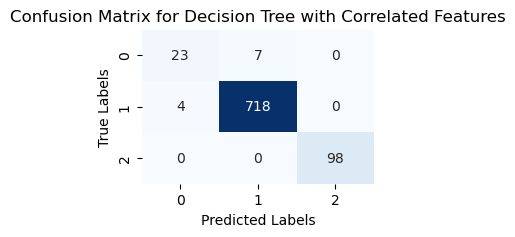

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_corr, Y_train, X_val_corr, Y_val are previously defined datasets

# Initialize the Decision Tree classifier with a random state for reproducibility
dt_model_corr = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data with correlated features
dt_model_corr.fit(X_train_corr, Y_train)

# Predict on the validation data with correlated features
pred_val_corr = dt_model_corr.predict(X_val_corr)

# Generate the confusion matrix
cm = confusion_matrix(Y_val, pred_val_corr)

# Print the confusion matrix
print("Confusion Matrix for Correlated Features:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.title('Confusion Matrix for Decision Tree with Correlated Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [180]:
#Hypertunning

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the feature sets

corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]

# Define hyperparameter grids for grid search
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to apply GridSearch and evaluate model
def train_evaluate_decision_tree(X_train, Y_train, X_val, Y_val, feature_set_name):
    classifier_decision_tree = DecisionTreeClassifier(random_state=42)
    grid_search_decision_tree = GridSearchCV(estimator=classifier_decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
    grid_search_decision_tree.fit(X_train, Y_train)
    
    # Get the best hyperparameters
    best_params = grid_search_decision_tree.best_params_
    print(f"Best Hyperparameters for {feature_set_name}:", best_params)

    # Retrain using the best estimator
    tuned_decision_tree = grid_search_decision_tree.best_estimator_
    tuned_decision_tree.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred_train = tuned_decision_tree.predict(X_train)
    Y_pred_val = tuned_decision_tree.predict(X_val)

    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    val_accuracy = accuracy_score(Y_val, Y_pred_val)

    print(f"\n{feature_set_name} - Training Accuracy: {train_accuracy:.4f}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy:.4f}")
    print(f"\n{feature_set_name} - Validation Classification Report:")
    print(classification_report(Y_val, Y_pred_val))

# All Features
train_evaluate_decision_tree(X_train, Y_train, X_val, Y_val, 'All Features')

# Correlated Features
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]
train_evaluate_decision_tree(X_train_corr, Y_train, X_val_corr, Y_val, 'Correlated Features')

Best Hyperparameters for All Features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

All Features - Training Accuracy: 1.0000
All Features - Validation Accuracy: 0.9882

All Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.99      1.00      0.99       722
           2       1.00      1.00      1.00        98

    accuracy                           0.99       850
   macro avg       0.96      0.92      0.94       850
weighted avg       0.99      0.99      0.99       850

Best Hyperparameters for Correlated Features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Correlated Features - Training Accuracy: 1.0000
Correlated Features - Validation Accuracy: 0.9847

Correlated Features - Validation Classification Report:
              precision    recall  f1-score   support

      

In [182]:
#confusion matrix
#using the best parameter gotten from the grid search to create a confusing matrix

Confusion Matrix for Decision Tree with All Features:
[[ 23   7   0]
 [  3 719   0]
 [  0   0  98]]


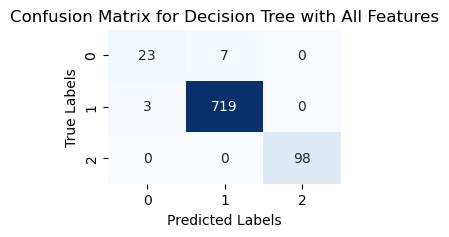

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train, Y_train, X_val, Y_val are already defined and preprocessed
# Initialize the Decision Tree classifier with the best parameters (replace with your best parameters if known)
classifier_decision_tree_1 = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Fit the model on the entire training dataset
classifier_decision_tree_1.fit(X_train, Y_train)

# Predict on the validation dataset
Y_pred_val = classifier_decision_tree_1.predict(X_val)

# Generate the confusion matrix
cm = confusion_matrix(Y_val, Y_pred_val)

# Print the confusion matrix
print("Confusion Matrix for Decision Tree with All Features:")
print(cm)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)  # 'cbar=False' disables the color bar
plt.title('Confusion Matrix for Decision Tree with All Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [184]:
# it seems like the model seems to work well on the target encoded as 1 and was accuracte for 2

## smote Balanced Data

## To recall(you are copying the code form above but just changing the datset)
#model for manual balanced data-X_train,Y_train,X_val,Y_val

model__all

model_top

model_corr

if just tuned

model__all_tune

model_top_tune

model_corr_tune

#model for smote balanced data-train_X_smote,train_y_smote,X_val,Y_val
model__all_smote

model_top_smote

model_corr_smote

if just tuned
model__all_smote_tune

model_top_smote_tune

model_corr_smote_tune

In [185]:
#model for manual balanced data-X_train,Y_train,X_val,Y_val
#model__all
#model_top
#model_corr
#if just tuned
#model__all_tune
#model_top_tune
#model_corr_tune
#model for smote balanced data-train_X_smote,train_y_smote,X_val,Y_val
#model__all_smote
#model_top_smote
#model_corr_smote
#if just tuned
#model__all_smote_tune
#model_top_smote_tune
#model_corr_smote_tune
#do visualisation of tree for the best model

In [186]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline Decision Tree model with all features
dt_model_all_smote = DecisionTreeClassifier(random_state=42)
dt_model_all_smote.fit(train_X_smote, train_y_smote)
pred_train_all = dt_model_all_smote.predict(train_X_smote)
pred_val_all = dt_model_all_smote.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(train_y_smote, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Classification Report for Validation with all features:')
print(classification_report(Y_val, pred_val_all))
print()


# Decision Tree model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]

dt_model_corr_smote = DecisionTreeClassifier(random_state=42)
dt_model_corr_smote.fit(X_train_corr, train_y_smote)
pred_train_corr = dt_model_corr_smote.predict(X_train_corr)
pred_val_corr = dt_model_corr_smote.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(train_y_smote, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Classification Report for Validation with correlated features:')
print(classification_report(Y_val, pred_val_corr))

Training Accuracy with all features: 1.0
Validation Accuracy with all features: 0.9035294117647059
Classification Report for Validation with all features:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        30
           1       0.99      0.90      0.94       722
           2       0.59      0.96      0.73        98

    accuracy                           0.90       850
   macro avg       0.78      0.89      0.82       850
weighted avg       0.93      0.90      0.91       850


Training Accuracy with correlated features: 1.0
Validation Accuracy with correlated features: 0.8976470588235295
Classification Report for Validation with correlated features:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.99      0.89      0.94       722
           2       0.57      0.96      0.71        98

    accuracy                           0.90       850
   macro avg   

In [187]:
#hypertunning smoothe

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the feature sets

corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]

# Define hyperparameter grids for grid search
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to apply GridSearch and evaluate model
def train_evaluate_decision_tree(train_X_smote, train_y_smote, X_val, Y_val, feature_set_name):
    classifier_decision_tree = DecisionTreeClassifier(random_state=42)
    grid_search_decision_tree = GridSearchCV(estimator=classifier_decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='accuracy')
    grid_search_decision_tree.fit(train_X_smote, train_y_smote)
    
    # Get the best hyperparameters
    best_params = grid_search_decision_tree.best_params_
    print(f"Best Hyperparameters for {feature_set_name}:", best_params)

    # Retrain using the best estimator
    tuned_decision_tree = grid_search_decision_tree.best_estimator_
    tuned_decision_tree.fit(train_X_smote, train_y_smote)

    # Predict and evaluate
    Y_pred_train = tuned_decision_tree.predict(train_X_smote)
    Y_pred_val = tuned_decision_tree.predict(X_val)

    train_accuracy = accuracy_score(train_y_smote, Y_pred_train)
    val_accuracy = accuracy_score(Y_val, Y_pred_val)

    print(f"\n{feature_set_name} - Training Accuracy: {train_accuracy:.4f}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy:.4f}")
    print(f"\n{feature_set_name} - Validation Classification Report:")
    print(classification_report(Y_val, Y_pred_val))

# All Features
train_evaluate_decision_tree(train_X_smote, train_y_smote, X_val, Y_val, 'All Features')


# Correlated Features
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]
train_evaluate_decision_tree(X_train_corr, train_y_smote, X_val_corr, Y_val, 'Correlated Features')

Best Hyperparameters for All Features: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

All Features - Training Accuracy: 0.9998
All Features - Validation Accuracy: 0.9047

All Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        30
           1       0.99      0.90      0.94       722
           2       0.58      0.97      0.73        98

    accuracy                           0.90       850
   macro avg       0.80      0.89      0.83       850
weighted avg       0.94      0.90      0.91       850

Best Hyperparameters for Correlated Features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

Correlated Features - Training Accuracy: 0.9983
Correlated Features - Validation Accuracy: 0.8906

Correlated Features - Validation Classification Report:
              precision    recall  f1-score   support

       

In [189]:
#for this the decision  model  work  better on the train and val of the manual data than the smoote data 
#so we will go with it on the manual balanced data 
#we can also see overfitting her as well
#mostly we have observed that the model seem to work more on the low risk, which initially had the highest distibution before balancing

## Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
rf = RandomForestClassifier()

# Get the parameters of the Random Forest model
params = rf.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [191]:
#using the shift+tab to check to the other options of rf parameters
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
rf = RandomForestClassifier()


## Manual Balanced data

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline RandomForest model with all features
rf_model_all = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_all.fit(X_train, Y_train)
pred_train_all = rf_model_all.predict(X_train)
pred_val_all = rf_model_all.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(Y_train, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Classification Report for Validation with all features:')
print(classification_report(Y_val, pred_val_all))
print()


# RandomForest model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]

rf_model_corr = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_corr.fit(X_train_corr, Y_train)
pred_train_corr = rf_model_corr.predict(X_train_corr)
pred_val_corr = rf_model_corr.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(Y_train, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Classification Report for Validation with correlated features:')
print(classification_report(Y_val, pred_val_corr))

Training Accuracy with all features: 1.0
Validation Accuracy with all features: 0.9858823529411764
Classification Report for Validation with all features:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.99      1.00      0.99       722
           2       1.00      0.98      0.99        98

    accuracy                           0.99       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.99      0.99      0.99       850


Training Accuracy with correlated features: 1.0
Validation Accuracy with correlated features: 0.9823529411764705
Classification Report for Validation with correlated features:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        30
           1       0.98      1.00      0.99       722
           2       1.00      0.96      0.98        98

    accuracy                           0.98       850
   macro avg   

Confusion Matrix for RandomForest with all Features:
[[ 22   8   0]
 [  2 720   0]
 [  0   2  96]]


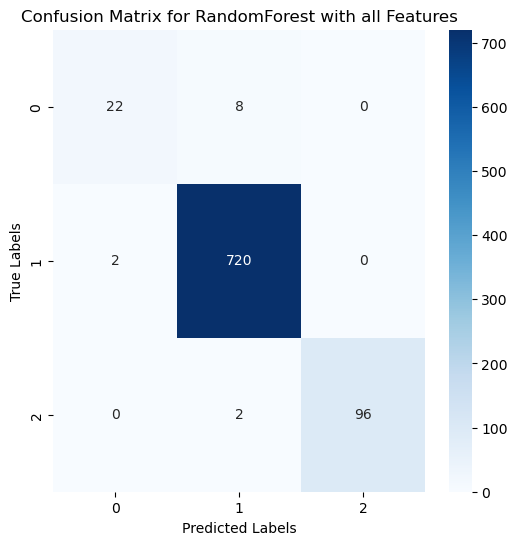

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train_top, Y_train, X_val_top, Y_val are already defined
# Train the RandomForest model with all features
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train, Y_train)

# Predict on the validation set
pred_val = rf_model.predict(X_val)

# Generate the confusion matrix
cm_top = confusion_matrix(Y_val, pred_val)

# Print the confusion matrix
print("Confusion Matrix for RandomForest with all Features:")
print(cm_top)

# Plot the confusion matrix using matplotlib and seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm_top, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for RandomForest with all Features')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## tree visualisation for random forest
we will still change the size of picture and estimator if need be

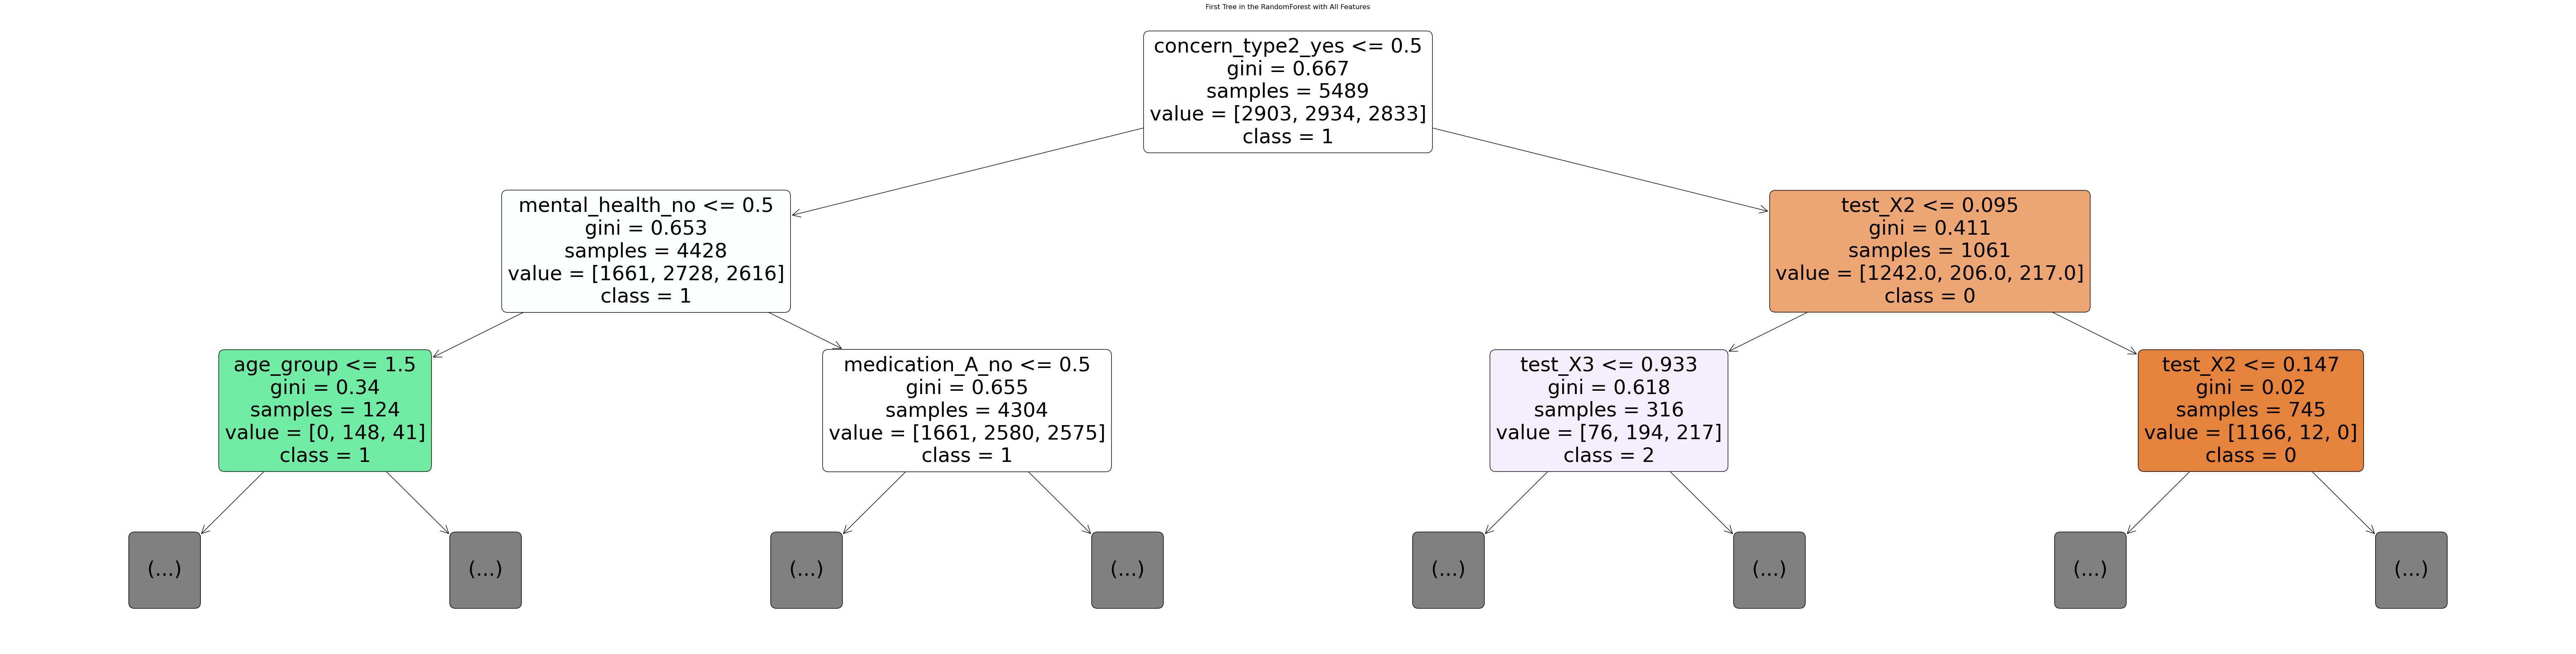

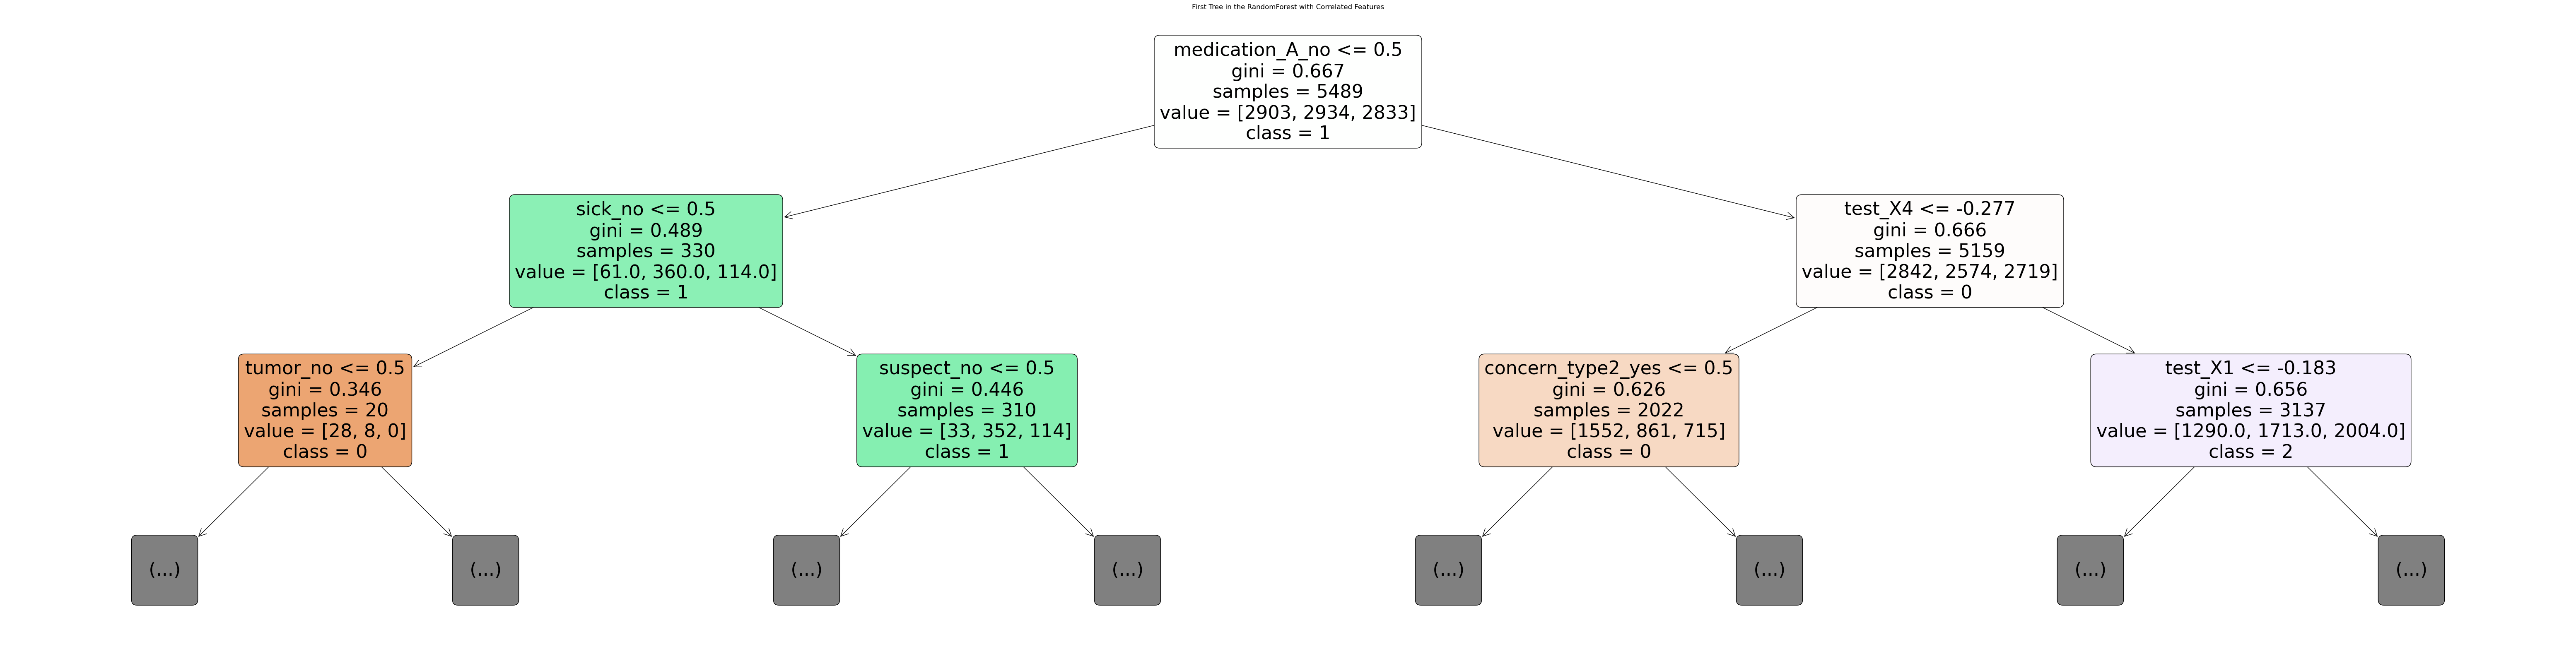

In [194]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first tree from the RandomForest model trained on all features
plt.figure(figsize=(80, 20))
plot_tree(rf_model_all.estimators_[0], max_depth=2, feature_names=X_train.columns.tolist(), filled=True, rounded=True, class_names=rf_model_all.classes_.astype(str).tolist())
plt.title('First Tree in the RandomForest with All Features')
plt.show()


# Visualize the first tree from the RandomForest model trained on correlated features
plt.figure(figsize=(80, 20))
plot_tree(rf_model_corr.estimators_[0], max_depth=2, feature_names=X_train_corr.columns.tolist(), filled=True, rounded=True, class_names=rf_model_corr.classes_.astype(str).tolist())
plt.title('First Tree in the RandomForest with Correlated Features')
plt.show()

## Hyperparameter tunning

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]

# Define hyperparameter grids for grid search
param_grid_random_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

# Function to apply GridSearch and evaluate model
def train_evaluate_random_forest(X_train, Y_train, X_val, Y_val, feature_set_name):
    classifier_random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search_random_forest = GridSearchCV(estimator=classifier_random_forest, param_grid=param_grid_random_forest, cv=5, scoring='accuracy')
    grid_search_random_forest.fit(X_train, Y_train)
    
    # Get the best hyperparameters
    best_params = grid_search_random_forest.best_params_
    print(f"Best Hyperparameters for {feature_set_name}:", best_params)

    # Retrain using the best estimator
    tuned_random_forest = grid_search_random_forest.best_estimator_
    tuned_random_forest.fit(X_train, Y_train)

    # Predict and evaluate
    Y_pred_train = tuned_random_forest.predict(X_train)
    Y_pred_val = tuned_random_forest.predict(X_val)

    train_accuracy = accuracy_score(Y_train, Y_pred_train)
    val_accuracy = accuracy_score(Y_val, Y_pred_val)

    print(f"\n{feature_set_name} - Training Accuracy: {train_accuracy:.4f}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy:.4f}")
    print(f"\n{feature_set_name} - Validation Classification Report:")
    print(classification_report(Y_val, Y_pred_val))

# All Features
train_evaluate_random_forest(X_train, Y_train, X_val, Y_val, 'All Features')


# Correlated Features
X_train_corr = X_train[corr_features]
X_val_corr = X_val[corr_features]
train_evaluate_random_forest(X_train_corr, Y_train, X_val_corr, Y_val, 'Correlated Features')

Best Hyperparameters for All Features: {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}

All Features - Training Accuracy: 1.0000
All Features - Validation Accuracy: 0.9835

All Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.98      1.00      0.99       722
           2       1.00      0.96      0.98        98

    accuracy                           0.98       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.98      0.98      0.98       850

Best Hyperparameters for Correlated Features: {'bootstrap': False, 'max_depth': 20, 'n_estimators': 100}

Correlated Features - Training Accuracy: 1.0000
Correlated Features - Validation Accuracy: 0.9824

Correlated Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.67      0.78        30
           1  

## Smote balanced data

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Baseline RandomForest model with all features
rf_model_all_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_all_smote.fit(train_X_smote, train_y_smote)
pred_train_all = rf_model_all_smote.predict(train_X_smote)
pred_val_all = rf_model_all_smote.predict(X_val)
print('Training Accuracy with all features:', accuracy_score(train_y_smote, pred_train_all))
print('Validation Accuracy with all features:', accuracy_score(Y_val, pred_val_all))
print('Classification Report for Validation with all features:')
print(classification_report(Y_val, pred_val_all))
print()



# RandomForest model with highly correlated features
corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]

rf_model_corr_smote = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model_corr_smote.fit(X_train_corr, train_y_smote)
pred_train_corr = rf_model_corr_smote.predict(X_train_corr)
pred_val_corr = rf_model_corr_smote.predict(X_val_corr)
print('Training Accuracy with correlated features:', accuracy_score(train_y_smote, pred_train_corr))
print('Validation Accuracy with correlated features:', accuracy_score(Y_val, pred_val_corr))
print('Classification Report for Validation with correlated features:')
print(classification_report(Y_val, pred_val_corr))

Training Accuracy with all features: 1.0
Validation Accuracy with all features: 0.9341176470588235
Classification Report for Validation with all features:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       0.99      0.94      0.96       722
           2       0.69      0.95      0.80        98

    accuracy                           0.93       850
   macro avg       0.85      0.91      0.87       850
weighted avg       0.95      0.93      0.94       850


Training Accuracy with correlated features: 1.0
Validation Accuracy with correlated features: 0.9270588235294117
Classification Report for Validation with correlated features:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        30
           1       0.98      0.93      0.96       722
           2       0.68      0.94      0.79        98

    accuracy                           0.93       850
   macro avg   

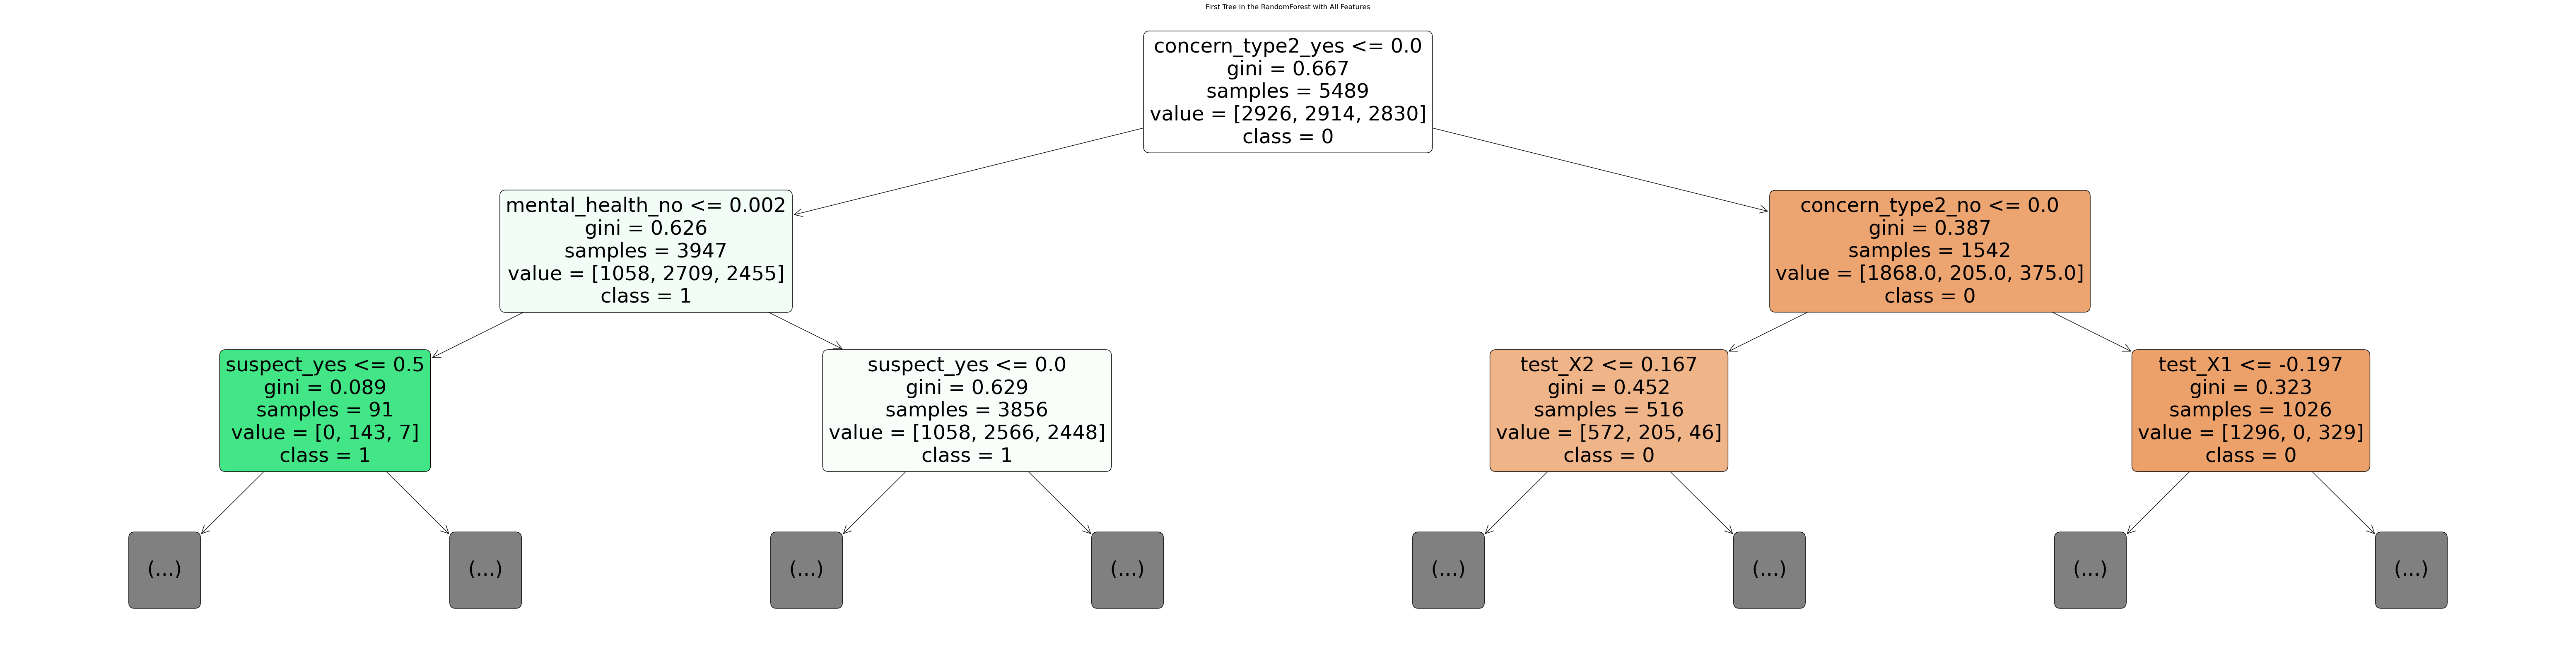

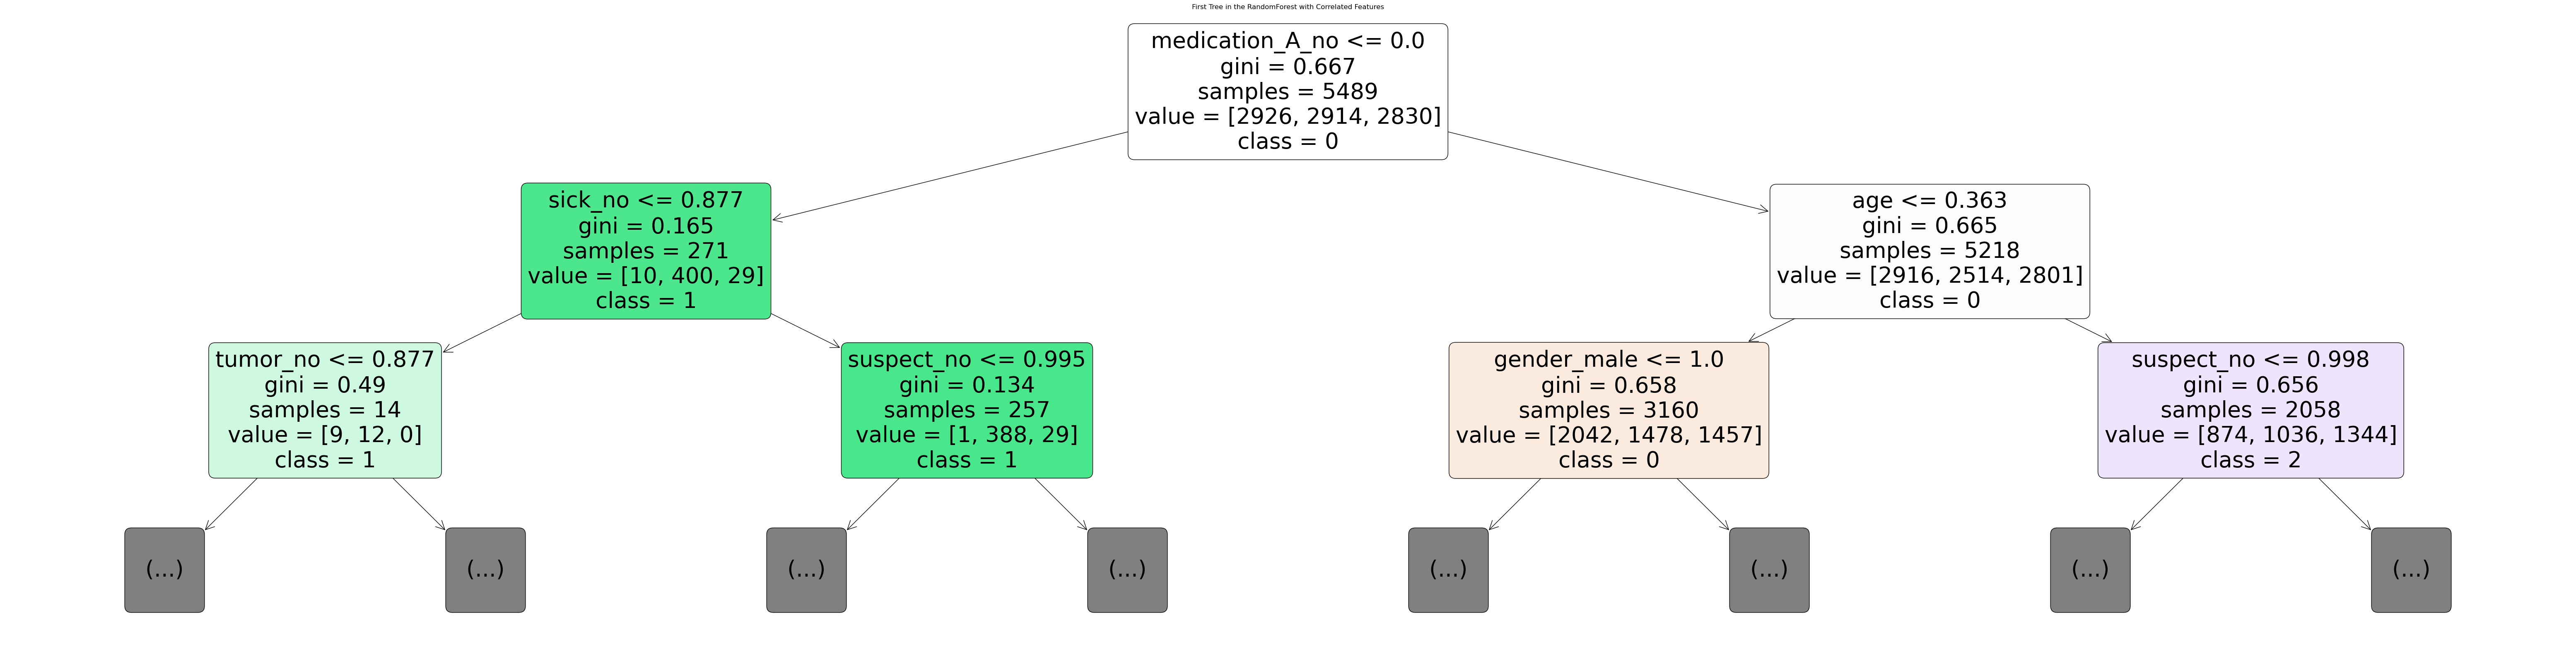

In [197]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the first tree from the RandomForest model trained on all features
plt.figure(figsize=(80, 20))
plot_tree(rf_model_all_smote.estimators_[0], max_depth=2, feature_names=X_train.columns.tolist(), filled=True, rounded=True, class_names=rf_model_all.classes_.astype(str).tolist())
plt.title('First Tree in the RandomForest with All Features')
plt.show()


# Visualize the first tree from the RandomForest model trained on correlated features
plt.figure(figsize=(80, 20))
plot_tree(rf_model_corr_smote.estimators_[0], max_depth=2, feature_names=X_train_corr.columns.tolist(), filled=True, rounded=True, class_names=rf_model_corr.classes_.astype(str).tolist())
plt.title('First Tree in the RandomForest with Correlated Features')
plt.show()

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


corr_features = [
    'age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'gender_female',
    'gender_male', 'sick_no', 'sick_yes', 'pregnant_no', 'pregnant_yes',
    'concern_type1_no', 'concern_type1_yes', 'concern_type2_no',
    'concern_type2_yes', 'enlargement_no', 'enlargement_yes', 'tumor_no',
    'tumor_yes', 'medication_A_no', 'medication_A_yes', 'medication_B_no',
    'medication_B_yes', 'mental_health_no', 'mental_health_yes',
    'mood_stabiliser_no', 'mood_stabiliser_yes', 'surgery_no',
    'surgery_yes', 'treatment_type1_no', 'treatment_type1_yes',
    'suspect_no', 'suspect_yes', 'age_group'
]

# Define hyperparameter grids for grid search
param_grid_random_forest = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'bootstrap': [True, False]
}

# Function to apply GridSearch and evaluate model
def train_evaluate_random_forest(train_X_smote, train_y_smote, X_val, Y_val, feature_set_name):
    classifier_random_forest = RandomForestClassifier(random_state=42, n_jobs=-1)
    grid_search_random_forest = GridSearchCV(estimator=classifier_random_forest, param_grid=param_grid_random_forest, cv=5, scoring='accuracy')
    grid_search_random_forest.fit(train_X_smote, train_y_smote)
    
    # Get the best hyperparameters
    best_params = grid_search_random_forest.best_params_
    print(f"Best Hyperparameters for {feature_set_name}:", best_params)

    # Retrain using the best estimator
    tuned_random_forest = grid_search_random_forest.best_estimator_
    tuned_random_forest.fit(train_X_smote, train_y_smote)

    # Predict and evaluate
    Y_pred_train = tuned_random_forest.predict(train_X_smote)
    Y_pred_val = tuned_random_forest.predict(X_val)

    train_accuracy = accuracy_score(train_y_smote, Y_pred_train)
    val_accuracy = accuracy_score(Y_val, Y_pred_val)

    print(f"\n{feature_set_name} - Training Accuracy: {train_accuracy:.4f}")
    print(f"{feature_set_name} - Validation Accuracy: {val_accuracy:.4f}")
    print(f"\n{feature_set_name} - Validation Classification Report:")
    print(classification_report(Y_val, Y_pred_val))

# All Features
train_evaluate_random_forest(train_X_smote, train_y_smote, X_val, Y_val, 'All Features')


# Correlated Features
X_train_corr = train_X_smote[corr_features]
X_val_corr = X_val[corr_features]
train_evaluate_random_forest(X_train_corr, train_y_smote, X_val_corr, Y_val, 'Correlated Features')

Best Hyperparameters for All Features: {'bootstrap': False, 'max_depth': None, 'n_estimators': 500}

All Features - Training Accuracy: 1.0000
All Features - Validation Accuracy: 0.9353

All Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.98      0.94      0.96       722
           2       0.70      0.91      0.79        98

    accuracy                           0.94       850
   macro avg       0.86      0.89      0.87       850
weighted avg       0.94      0.94      0.94       850

Best Hyperparameters for Correlated Features: {'bootstrap': False, 'max_depth': 20, 'n_estimators': 200}

Correlated Features - Training Accuracy: 1.0000
Correlated Features - Validation Accuracy: 0.9247

Correlated Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77        30
           1  

## random forest and decision tree, both model worked well on manual balancing of  the train data of 100 percent accuracy,

but when it trains on the  smoothe balanced data, for base model it works well on the train data, for tunning it worked well on the val data


## Recommendation on Data Balancing Technique for Medical Data Analysis

In the context of our current medical data analysis, manual upsampling has emerged as a preferable technique for addressing class imbalance. This method's adoption is primarily justified by its consistent performance enhancement observed during validation phases compared to other techniques such as Synthetic Minority Over-sampling Technique (SMOTE). Manual upsampling replicates existing minority class instances, thereby maintaining the integrity of the original medical data.

Justification for Manual Upsampling
Validation Performance: Manual upsampling has demonstrated superior validation performance across multiple tests. This consistent outcome underpins its preference as it suggests a higher likelihood of similar performance in practical, clinical settings.

Data Integrity: Unlike methods that generate synthetic data, manual upsampling preserves the exact characteristics of the original samples. This is particularly crucial in medical applications where the authenticity of data can significantly impact diagnostic accuracy and treatment decisions.

Regulatory and Ethical Compliance: Employing manual upsampling aids in complying with stringent medical data regulations. It ensures that the data manipulation processes do not introduce artificial biases or deviations that could potentially lead to ethical concerns or compromise patient safety.

Model Transparency and Interpretability: Models developed from manually upsampled data tend to be more interpretable. This transparency is essential in a medical context, where stakeholders require clear insights into the decision-making process of automated systems to ensure trust and reliability.

##

1. MODEL NAME-knn_best
Metrics and classification report;
Best parameters for selected features after correlation: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Training Accuracy for selected features after correlation: 1.00
Validation Accuracy for selected features after correlations: 0.89
Classification Report for Best k on Validation Data:
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.92      0.95      0.93       722
           2       0.62      0.46      0.53        98

    accuracy                           0.89       850
   macro avg       0.77      0.69      0.73       850
weighted avg       0.88      0.89      0.88       850

2. Model NAme: svm_model_corr
metrics and classification report;
Training Accuracy for featuresfor selected features after correlation: 94
Classification Report for Validation Data for selected features after correlation:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        30
           1       0.98      0.95      0.96       722
           2       0.79      0.88      0.83        98

    accuracy                           0.94       850
   macro avg       0.81      0.91      0.86       850
weighted avg       0.95      0.94      0.94       850

3.Model Name:classifier_decision_tree_1
Best Hyperparameters for All Features: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

All Features - Training Accuracy: 1.0000
All Features - Validation Accuracy: 0.9882

All Features - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.99      1.00      0.99       722
           2       1.00      1.00      1.00        98

    accuracy                           0.99       850
   macro avg       0.96      0.92      0.94       850
weighted avg       0.99      0.99      0.99       850

5.model name:rf_model
metrics and classification report
Training Accuracy with all features: 1.0
Validation Accuracy with all features: 0.9858823529411764
Classification Report for Validation with all features:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.99      1.00      0.99       722
           2       1.00      0.98      0.99        98

    accuracy                           0.99       850
   macro avg       0.97      0.90      0.93       850
weighted avg       0.99      0.99      0.99       850

## why i use micro averages
Using the macro average for precision, recall, and F1-score in the context of multi-class classification problems, such as yours, is particularly important for several reasons:

Balanced Measure Across Classes
Equality of Classes: Macro averaging treats all classes equally, assigning equal weight to the performance on each class. This is crucial in datasets where some classes are underrepresented (i.e., have fewer samples). Without macro averaging, the performance on smaller classes could be overshadowed by the performance on larger classes, which might dominate the metrics due to their larger sample size.

Identify Model Bias: It helps to identify if the model is biased towards any particular class. If a model performs exceptionally well on frequent classes but poorly on rare classes, macro averages will reveal this, as they compute the metric independently for each class and then take the average — thus not allowing the large classes to dominate.

Specific to Your Data
Importance of Each Class: In medical datasets, every class, often representing different conditions or diagnoses, is crucial. A model might perform well overall (high accuracy) but still fail critically on one rare yet vital condition. Using macro averages ensures that the performance on these critical but perhaps less frequent conditions is not overlooked.
Mathematical Context
Calculation: Macro average is calculated by taking the arithmetic mean of precision (or recall or F1-score) across all classes. It doesn't take label imbalance into account, which means it provides a measure of how the model performs on average across all classes. Here’s how each is calculated:
Precision (Macro Avg): 
Average
=
1
𝑁
∑
𝑖
=
1
𝑁
Precision
𝑖
Average= 
N
1
​
 ∑ 
i=1
N
​
 Precision 
i
​
 
Recall (Macro Avg): 
Average
=
1
𝑁
∑
𝑖
=
1
𝑁
Recall
𝑖
Average= 
N
1
​
 ∑ 
i=1
N
​
 Recall 
i
​
 
F1-Score (Macro Avg): 
Average
=
1
𝑁
∑
𝑖
=
1
𝑁
F1-Score
𝑖
Average= 
N
1
​
 ∑ 
i=1
N
​
 F1-Score 
i
​
 
Usage in Evaluation
Comprehensive Evaluation: By using macro averages, you can more comprehensively evaluate the efficacy of your model across all categories, which is essential for ensuring that the model is not only accurate but also fair and effective in a variety of scenarios. This is particularly significant in fields like healthcare, where overlooking a rare condition could have severe consequences.
Therefore, in your model comparison, using the macro average allows you to assess model performance in a way that ensures reliability and equity across all classes, making it a preferred choice in diverse and potentially imbalanced datasets.

# Joining all the classification report of the best model amount the four models tested

                        Model  Accuracy  Precision (macro avg)  \
0                    knn_best      0.89               0.770000   
1              svm_model_corr      0.94               0.816667   
2  classifier_decision_tree_1      0.99               0.956667   
3                    rf_model      0.99               0.970000   

   Recall (macro avg)  F1-Score (macro avg)  
0            0.693333              0.723333  
1            0.910000              0.853333  
2            0.923333              0.936667  
3            0.903333              0.930000  


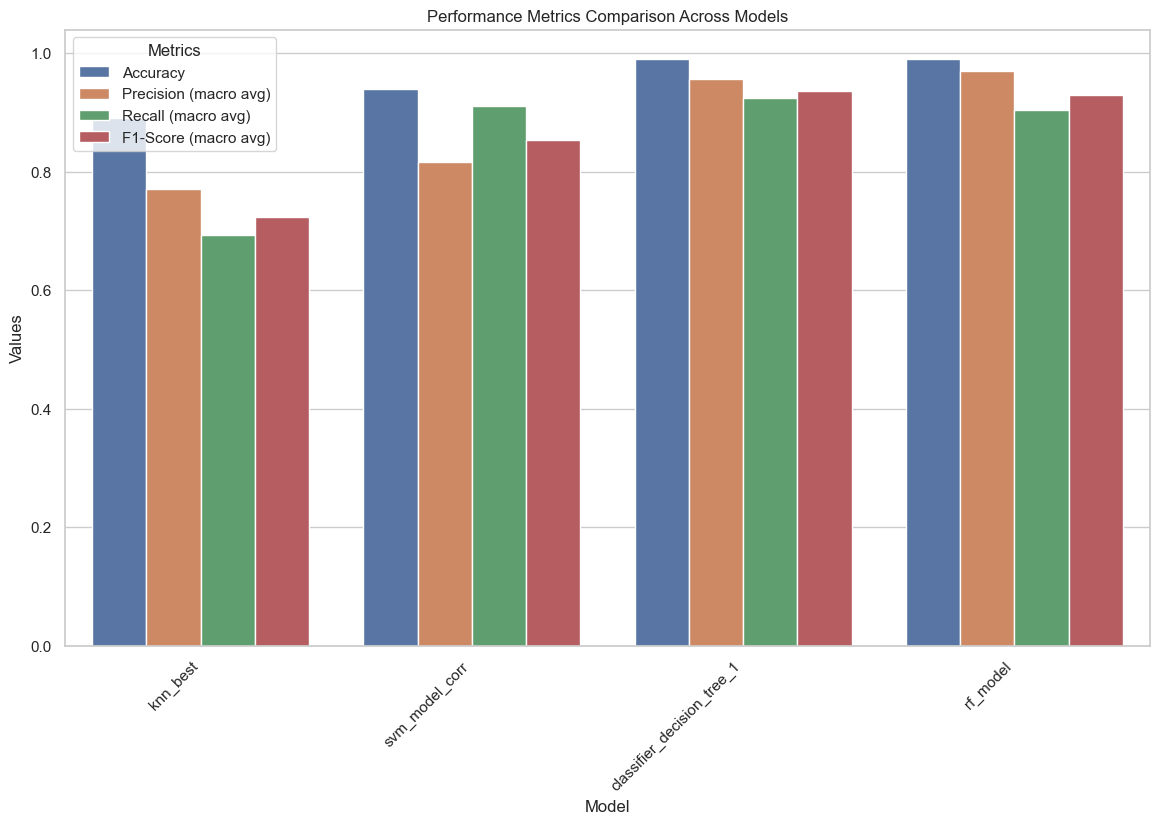

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Updated detailed metrics with actual data for Random Forest with all features
detailed_data = {
    'knn_best': {
        'precision': [0.77, 0.92, 0.62],
        'recall': [0.67, 0.95, 0.46],
        'f1-score': [0.71, 0.93, 0.53]
    },
    'svm_model_corr': {
        'precision': [0.68, 0.98, 0.79],
        'recall': [0.90, 0.95, 0.88],
        'f1-score': [0.77, 0.96, 0.83]
    },
    'classifier_decision_tree_1': {
        'precision': [0.88, 0.99, 1.00],
        'recall': [0.77, 1.00, 1.00],
        'f1-score': [0.82, 0.99, 1.00]
    },
    'rf_model': {
        'precision': [0.92, 0.99, 1.00],
        'recall': [0.73, 1.00, 0.98],
        'f1-score': [0.81, 0.99, 0.99]
    }
}

# Update accuracy to include Random Forest with all features
data = {
    'Model': [],
    'Accuracy': [0.89, 0.94, 0.99, 0.99],  # Update or correct as needed
    'Precision (macro avg)': [],
    'Recall (macro avg)': [],
    'F1-Score (macro avg)': []
}

for model, metrics in detailed_data.items():
    data['Model'].append(model)
    data['Precision (macro avg)'].append(np.mean(metrics['precision']))
    data['Recall (macro avg)'].append(np.mean(metrics['recall']))
    data['F1-Score (macro avg)'].append(np.mean(metrics['f1-score']))

# Create DataFrame
df_metrics = pd.DataFrame(data)

# Print the DataFrame
print(df_metrics)

# Plot the metrics for comparison
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")
df_melted = df_metrics.melt('Model', var_name='Metrics', value_name='Values')
chart = sns.barplot(x='Model', y='Values', hue='Metrics', data=df_melted)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Performance Metrics Comparison Across Models')
plt.show()

## Detailed Examination of Each Model:
1. KNN Model (knn_best)
Precision: Moderately accurate in identifying positive instances across all classes.
Recall: Struggles particularly with Class 2, indicating a higher chance of missing cases in this category.
F1-Score: Reflects the poor balance between precision and recall, especially for Class 2.
Overall Accuracy: At 0.89, this is lower compared to the other models, suggesting it may not perform as well under validation conditions.
2. SVM Model (svm_model_corr)
Precision: High precision for Class 1 and 2, somewhat lower for Class 0.
Recall: Excellent for Class 0, showing it can identify this risk condition well; also good for Class 2.
F1-Score: Good balance across all classes, especially strong in Class 2.
Overall Accuracy: At 0.94, it shows a better validation performance than KNN.
3. Decision Tree (classifier_decision_tree_1)
Precision: Very high across all classes, perfect for Class 2.
Recall: Excellent for Class 1 and 2, slightly lower for Class 0.
F1-Score: High across all classes, indicating a good balance of precision and recall.
Overall Accuracy: The highest among the models at 0.99, indicating superior general performance.
5. Random Forest (rf_model)
Precision: Excellent, particularly high for Classes 1 and 2.
Recall: Slightly lower for Class 0, but perfect for Class 1 and nearly perfect for Class 2.
F1-Score: Reflects high efficiency in integrating precision and recall, especially for Class 2.
Overall Accuracy: Similar to the Decision Tree at 0.99, very high.

## Preprocessing the test data to use in the best model to predict on the test data

In [200]:
#recall that our test data is disease test
Disease_test

id  age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
0    PA6001   22  female   no       no    0.500      1.7     83.0     0.86   
1    PA6002   42    male   no       no    0.060      2.0     79.0     0.81   
2    PA6003   42    male   no       no    0.045      2.1    111.0     0.89   
3    PA6004   42  female   no       no    1.900      2.0    114.0     1.33   
4    PA6005   55    male   no       no    0.570      1.4     75.0     0.72   
..      ...  ...     ...  ...      ...      ...      ...      ...      ...   
745  PA6746   55    male   no       no    1.300      NaN     72.0     0.75   
746  PA6747   62  female   no       no    1.400      NaN    104.0     1.12   
747  PA6748   54  female   no       no    1.900      2.0     88.0     0.95   
748  PA6749   69  female   no       no    0.010      2.4    127.0     0.84   
749  PA6750   51  female   no       no    4.000      1.7     70.0     0.90   

     test_X5  ...  enlargement tumor disorder medication_A medication_B  \
0       97.0  ...           no    no       no           no           no   
1       98.0  ...           no    no       no           no           no   
2      125.0  ...           no    no       no           no           no   
3       86.0  ...           no    no       no           no           no   
4      104.0  ...           no    no       no           no           no   
..       ...  ...          ...   ...      ...          ...          ...   
745     96.0  ...           no    no       no           no           no   
746     93.0  ...           no    no       no           no           no   
747     92.0  ...           no    no       no           no           no   
748    152.0  ...           no    no       no           no           no   
749     78.0  ...           no    no       no           no           no   

    mental_health mood_stabiliser surgery treatment_type1 suspect  
0              no              no      no              no      no  
1              no              no      no              no      no  
2              no              no      no              no      no  
3              no              no      no              no      no  
4             yes              no      no              no      no  
..            ...             ...     ...             ...     ...  
745            no              no      no              no      no  
746            no              no      no              no      no  
747            no              no      no              no      no  
748            no              no      no              no      no  
749            no              no      no              no      no  

[750 rows x 23 columns]

In [201]:
#checking for duplicates
duplicates = Disease_test.duplicated()
print(duplicates.sum())
print(Disease_test[duplicates])
#no duplicate was found

0
Empty DataFrame
Columns: [id, age, gender, sick, pregnant, test_X1, test_X2, test_X3, test_X4, test_X5, test_X6, concern_type1, concern_type2, enlargement, tumor, disorder, medication_A, medication_B, mental_health, mood_stabiliser, surgery, treatment_type1, suspect]
Index: []

[0 rows x 23 columns]


In [202]:
#checking for missing data
null_counts = Disease_test.isnull().sum()
print(null_counts)

id                   0
age                  0
gender              26
sick                 0
pregnant             0
test_X1             76
test_X2            208
test_X3             33
test_X4             72
test_X5             71
test_X6            725
concern_type1        0
concern_type2        0
enlargement          0
tumor                0
disorder             0
medication_A         0
medication_B         0
mental_health        0
mood_stabiliser      0
surgery              0
treatment_type1      0
suspect              0
dtype: int64


In [203]:
#just like in the train data, there are lot of missing values in test_X6,
#we will drop test_X6 column as well as the disorder colum and make the id column an index, 
#all these was done on the train and validation data
Disease_test.drop('test_X6',axis=1, inplace=True)
Disease_test.drop('disorder',axis=1, inplace=True)

In [204]:
#to check the columns has been dropped
Disease_test.columns

Index(['id', 'age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2',
       'test_X3', 'test_X4', 'test_X5', 'concern_type1', 'concern_type2',
       'enlargement', 'tumor', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect'],
      dtype='object')

In [205]:
#making the id the index
Disease_test.set_index('id',inplace=True)
Disease_test

age  gender sick pregnant  test_X1  test_X2  test_X3  test_X4  \
id                                                                      
PA6001   22  female   no       no    0.500      1.7     83.0     0.86   
PA6002   42    male   no       no    0.060      2.0     79.0     0.81   
PA6003   42    male   no       no    0.045      2.1    111.0     0.89   
PA6004   42  female   no       no    1.900      2.0    114.0     1.33   
PA6005   55    male   no       no    0.570      1.4     75.0     0.72   
...     ...     ...  ...      ...      ...      ...      ...      ...   
PA6746   55    male   no       no    1.300      NaN     72.0     0.75   
PA6747   62  female   no       no    1.400      NaN    104.0     1.12   
PA6748   54  female   no       no    1.900      2.0     88.0     0.95   
PA6749   69  female   no       no    0.010      2.4    127.0     0.84   
PA6750   51  female   no       no    4.000      1.7     70.0     0.90   

        test_X5 concern_type1 concern_type2 enlargement tumor medication_A  \
id                                                                           
PA6001     97.0            no            no          no    no           no   
PA6002     98.0            no           yes          no    no           no   
PA6003    125.0            no           yes          no    no           no   
PA6004     86.0            no            no          no    no           no   
PA6005    104.0            no            no          no    no           no   
...         ...           ...           ...         ...   ...          ...   
PA6746     96.0            no            no          no    no           no   
PA6747     93.0            no           yes          no    no           no   
PA6748     92.0            no            no          no    no           no   
PA6749    152.0            no            no          no    no           no   
PA6750     78.0            no            no          no    no           no   

       medication_B mental_health mood_stabiliser surgery treatment_type1  \
id                                                                          
PA6001           no            no              no      no              no   
PA6002           no            no              no      no              no   
PA6003           no            no              no      no              no   
PA6004           no            no              no      no              no   
PA6005           no           yes              no      no              no   
...             ...           ...             ...     ...             ...   
PA6746           no            no              no      no              no   
PA6747           no            no              no      no              no   
PA6748           no            no              no      no              no   
PA6749           no            no              no      no              no   
PA6750           no            no              no      no              no   

       suspect  
id              
PA6001      no  
PA6002      no  
PA6003      no  
PA6004      no  
PA6005      no  
...        ...  
PA6746      no  
PA6747      no  
PA6748      no  
PA6749      no  
PA6750      no  

[750 rows x 20 columns]

In [206]:
#imputing the missing data with the most frequent and the mean as that is what was done on the train data and validation data
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        # Find most common value with value_counts() which returns 
        # counts in descending order so that the first element is the most frequently-occurring element.
        self.fill = pd.Series([X[c].value_counts().index[0]
            #Use that if type is object otherwise use mean                   
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


#Define the data to be filled as X, we can pass the whole data frame and apply our new class
x = Disease_test
New_Disease_test = DataFrameImputer().fit_transform(x)

print('before...')
#Let us see missing value for the train data before
missing_val_count_by_column = (x.isnull().sum())
print('Missing columns for the  data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

#and after
print('after...')
missing_val_count_by_column = (New_Disease_test.isnull().sum())
print('Missing columns for the  data:\n',missing_val_count_by_column[missing_val_count_by_column>0])

before...
Missing columns for the  data:
 gender      26
test_X1     76
test_X2    208
test_X3     33
test_X4     72
test_X5     71
dtype: int64
after...
Missing columns for the  data:
 Series([], dtype: int64)


In [207]:
#descriptive analysis of the data when missing values has been imputed
#after imputing, we can see that the mean values are still the same and there is no extremely high 
#difference in the median values
New_Disease_test.describe()

age     test_X1     test_X2     test_X3     test_X4     test_X5
count  750.000000  750.000000  750.000000  750.000000  750.000000  750.000000
mean    52.956000    6.674659    2.001181  104.772664    0.963451  111.738586
std     18.639921   24.551751    0.653176   34.636241    0.162832   46.095014
min      1.000000    0.005000    0.200000    2.900000    0.190000    2.400000
25%     38.000000    0.600000    1.700000   87.000000    0.880000   95.000000
50%     56.000000    1.600000    2.001181  104.000000    0.963451  111.738586
75%     68.000000    4.900000    2.100000  120.000000    1.040000  123.000000
max     92.000000  393.000000    8.500000  273.000000    2.120000  839.000000

## Feature Engineering

In [208]:
## the age group feature was added in the train and test column, so this will also be done in the test column
import pandas as pd
import numpy as np

# Assuming 'train_data' is your DataFrame
# train_data = pd.read_csv('your_dataset.csv')  # Uncomment if needed

# Define the conditions for each age group
conditions = [
    (New_Disease_test['age'] < 18),  # Minor
    (New_Disease_test['age'] >= 18) & (New_Disease_test['age'] < 35),  # Young Adult
    (New_Disease_test['age'] >= 35) & (New_Disease_test['age'] < 50),  # Middle Age
    (New_Disease_test['age'] >= 50) & (New_Disease_test['age'] < 65),  # Senior Adult
    (New_Disease_test['age'] >= 65) & (New_Disease_test['age'] <= 100),  # Elderly
    (New_Disease_test['age'] > 100)  # Centenarian
]

# Define the corresponding labels for each condition
choices = [
    'Minor',
    'Young Adult',
    'Middle Age',
    'Senior Adult',
    'Elderly',
    'Centenarian'  # For those rare cases above 100
]

# Create the 'age_group' column using numpy.select
New_Disease_test['age_group'] = np.select(conditions, choices, default='Not Specified')

# Check the output to ensure the new column is correct
print(New_Disease_test[['age', 'age_group']].head())

        age     age_group
id                       
PA6001   22   Young Adult
PA6002   42    Middle Age
PA6003   42    Middle Age
PA6004   42    Middle Age
PA6005   55  Senior Adult


In [209]:
#checking the value count of the age group
New_Disease_test.age_group.value_counts()

age_group
Elderly         234
Senior Adult    223
Middle Age      151
Young Adult     116
Minor            26
Name: count, dtype: int64

In [210]:
#we will also redefined our nemerical and categorical column as some feature extraction was alsready done
TEST_CATEGORICAL_COLUMNS= ["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                       "tumor","medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                       "surgery", "treatment_type1", "suspect",'age_group']
TEST_NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5"]

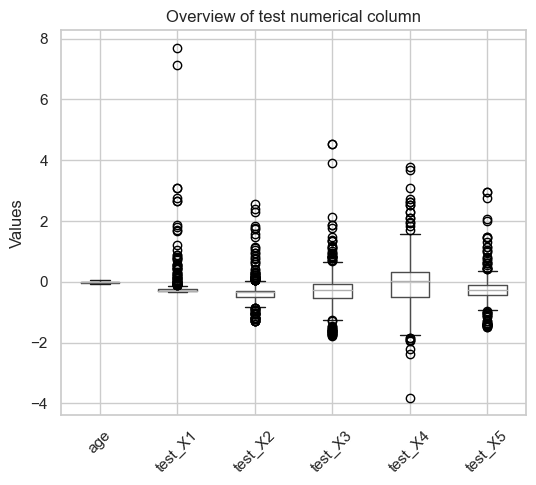

In [211]:
#using a box plot to check if there is any obvious outlier that should be dealth with in the age column
#there ia none
plt.figure(figsize=(6, 5))
X_val.boxplot(column=TEST_NUMERICAL_COLUMNS)
plt.title('Overview of test numerical column')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [212]:
#standardizing the test numerical colum  with a standard scaler as this was also done in the train and val data
from sklearn.preprocessing import StandardScaler


# Define your numerical columns
TEST_NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3", "test_X4", "test_X5"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(New_Disease_test[TEST_NUMERICAL_COLUMNS])

# Transform the training, validation, and test data
New_Disease_test[TEST_NUMERICAL_COLUMNS] = scaler.transform(New_Disease_test[TEST_NUMERICAL_COLUMNS])
New_Disease_test[TEST_NUMERICAL_COLUMNS] = scaler.transform(New_Disease_test[TEST_NUMERICAL_COLUMNS])

In [213]:
#checking if the numerical column had been standardised
New_Disease_test

age  gender sick pregnant   test_X1   test_X2   test_X3  \
id                                                                     
PA6001 -2.932110  female   no       no -0.282299 -3.772693 -3.045135   
PA6002 -2.874470    male   no       no -0.283030 -3.068584 -3.048474   
PA6003 -2.874470    male   no       no -0.283055 -2.833881 -3.021764   
PA6004 -2.874470  female   no       no -0.279974 -3.068584 -3.019260   
PA6005 -2.837004    male   no       no -0.282183 -4.476802 -3.051812   
...          ...     ...  ...      ...       ...       ...       ...   
PA6746 -2.837004    male   no       no -0.280970 -3.065813 -3.054317   
PA6747 -2.816830  female   no       no -0.280804 -3.065813 -3.027607   
PA6748 -2.839886  female   no       no -0.279974 -3.068584 -3.040962   
PA6749 -2.796657  female   no       no -0.283113 -2.129772 -3.008409   
PA6750 -2.848532  female   no       no -0.276485 -3.772693 -3.055986   

          test_X4   test_X5 concern_type1  ... enlargement tumor medication_A  \
id                                         ...                                  
PA6001  -9.827744 -2.432656            no  ...          no    no           no   
PA6002 -11.716045 -2.432185            no  ...          no    no           no   
PA6003  -8.694764 -2.419461            no  ...          no    no           no   
PA6004   7.922284 -2.437840            no  ...          no    no           no   
PA6005 -15.114987 -2.429357            no  ...          no    no           no   
...           ...       ...           ...  ...         ...   ...          ...   
PA6746 -13.982006 -2.433128            no  ...          no    no           no   
PA6747  -0.008580 -2.434541            no  ...          no    no           no   
PA6748  -6.428803 -2.435013            no  ...          no    no           no   
PA6749 -10.583065 -2.406736            no  ...          no    no           no   
PA6750  -8.317104 -2.441610            no  ...          no    no           no   

       medication_B mental_health mood_stabiliser surgery treatment_type1  \
id                                                                          
PA6001           no            no              no      no              no   
PA6002           no            no              no      no              no   
PA6003           no            no              no      no              no   
PA6004           no            no              no      no              no   
PA6005           no           yes              no      no              no   
...             ...           ...             ...     ...             ...   
PA6746           no            no              no      no              no   
PA6747           no            no              no      no              no   
PA6748           no            no              no      no              no   
PA6749           no            no              no      no              no   
PA6750           no            no              no      no              no   

       suspect     age_group  
id                            
PA6001      no   Young Adult  
PA6002      no    Middle Age  
PA6003      no    Middle Age  
PA6004      no    Middle Age  
PA6005      no  Senior Adult  
...        ...           ...  
PA6746      no  Senior Adult  
PA6747      no  Senior Adult  
PA6748      no  Senior Adult  
PA6749      no       Elderly  
PA6750      no  Senior Adult  

[750 rows x 21 columns]

In [214]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer


# Define your columns
categorical_columns = [
    'gender', 'sick', 'pregnant', 'concern_type1', 'concern_type2', 'enlargement',
    'tumor', 'medication_A', 'medication_B', 'mental_health', 'mood_stabiliser',
    'surgery', 'treatment_type1', 'suspect'
]
ordinal_column = ['age_group']
numerical_columns = ['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5']

# Set up the ColumnTransformer with OneHotEncoder and OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns),
        ('ord', OrdinalEncoder(), ordinal_column)
    ])

# Fit and transform the test data (assuming New_Disease_test is your dataset for transformation)
encoded_test_data = preprocessor.fit_transform(New_Disease_test)

# Column names for the encoded features
encoded_feature_names = (
    numerical_columns +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)) +
    ordinal_column
)

# Convert to DataFrame (optional, if you need a DataFrame for further processing)
encoded_test_df = pd.DataFrame(encoded_test_data, columns=encoded_feature_names, index=New_Disease_test.index)

# Print or save your transformed data
print(encoded_test_df.head())

             age   test_X1   test_X2   test_X3    test_X4   test_X5  \
id                                                                    
PA6001 -2.932110 -0.282299 -3.772693 -3.045135  -9.827744 -2.432656   
PA6002 -2.874470 -0.283030 -3.068584 -3.048474 -11.716045 -2.432185   
PA6003 -2.874470 -0.283055 -2.833881 -3.021764  -8.694764 -2.419461   
PA6004 -2.874470 -0.279974 -3.068584 -3.019260   7.922284 -2.437840   
PA6005 -2.837004 -0.282183 -4.476802 -3.051812 -15.114987 -2.429357   

        gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                                     ...                      
PA6001            1.0          0.0      1.0       0.0  ...                0.0   
PA6002            0.0          1.0      1.0       0.0  ...                0.0   
PA6003            0.0          1.0      1.0       0.0  ...                0.0   
PA6004            1.0          0.0      1.0       0.0  ...                0.0   
PA6005          

In [215]:
#the test dataframe has been renamed
encoded_test_df

age   test_X1   test_X2   test_X3    test_X4   test_X5  \
id                                                                    
PA6001 -2.932110 -0.282299 -3.772693 -3.045135  -9.827744 -2.432656   
PA6002 -2.874470 -0.283030 -3.068584 -3.048474 -11.716045 -2.432185   
PA6003 -2.874470 -0.283055 -2.833881 -3.021764  -8.694764 -2.419461   
PA6004 -2.874470 -0.279974 -3.068584 -3.019260   7.922284 -2.437840   
PA6005 -2.837004 -0.282183 -4.476802 -3.051812 -15.114987 -2.429357   
...          ...       ...       ...       ...        ...       ...   
PA6746 -2.837004 -0.280970 -3.065813 -3.054317 -13.982006 -2.433128   
PA6747 -2.816830 -0.280804 -3.065813 -3.027607  -0.008580 -2.434541   
PA6748 -2.839886 -0.279974 -3.068584 -3.040962  -6.428803 -2.435013   
PA6749 -2.796657 -0.283113 -2.129772 -3.008409 -10.583065 -2.406736   
PA6750 -2.848532 -0.276485 -3.772693 -3.055986  -8.317104 -2.441610   

        gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                                     ...                      
PA6001            1.0          0.0      1.0       0.0  ...                0.0   
PA6002            0.0          1.0      1.0       0.0  ...                0.0   
PA6003            0.0          1.0      1.0       0.0  ...                0.0   
PA6004            1.0          0.0      1.0       0.0  ...                0.0   
PA6005            0.0          1.0      1.0       0.0  ...                1.0   
...               ...          ...      ...       ...  ...                ...   
PA6746            0.0          1.0      1.0       0.0  ...                0.0   
PA6747            1.0          0.0      1.0       0.0  ...                0.0   
PA6748            1.0          0.0      1.0       0.0  ...                0.0   
PA6749            1.0          0.0      1.0       0.0  ...                0.0   
PA6750            1.0          0.0      1.0       0.0  ...                0.0   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        age_group  
id                 
PA6001        4.0

In [216]:
#now you will use the best model on the encoded_test_df and also change the prediction name back to it normal names

In [217]:
encoded_test_df

age   test_X1   test_X2   test_X3    test_X4   test_X5  \
id                                                                    
PA6001 -2.932110 -0.282299 -3.772693 -3.045135  -9.827744 -2.432656   
PA6002 -2.874470 -0.283030 -3.068584 -3.048474 -11.716045 -2.432185   
PA6003 -2.874470 -0.283055 -2.833881 -3.021764  -8.694764 -2.419461   
PA6004 -2.874470 -0.279974 -3.068584 -3.019260   7.922284 -2.437840   
PA6005 -2.837004 -0.282183 -4.476802 -3.051812 -15.114987 -2.429357   
...          ...       ...       ...       ...        ...       ...   
PA6746 -2.837004 -0.280970 -3.065813 -3.054317 -13.982006 -2.433128   
PA6747 -2.816830 -0.280804 -3.065813 -3.027607  -0.008580 -2.434541   
PA6748 -2.839886 -0.279974 -3.068584 -3.040962  -6.428803 -2.435013   
PA6749 -2.796657 -0.283113 -2.129772 -3.008409 -10.583065 -2.406736   
PA6750 -2.848532 -0.276485 -3.772693 -3.055986  -8.317104 -2.441610   

        gender_female  gender_male  sick_no  sick_yes  ...  mental_health_yes  \
id                                                     ...                      
PA6001            1.0          0.0      1.0       0.0  ...                0.0   
PA6002            0.0          1.0      1.0       0.0  ...                0.0   
PA6003            0.0          1.0      1.0       0.0  ...                0.0   
PA6004            1.0          0.0      1.0       0.0  ...                0.0   
PA6005            0.0          1.0      1.0       0.0  ...                1.0   
...               ...          ...      ...       ...  ...                ...   
PA6746            0.0          1.0      1.0       0.0  ...                0.0   
PA6747            1.0          0.0      1.0       0.0  ...                0.0   
PA6748            1.0          0.0      1.0       0.0  ...                0.0   
PA6749            1.0          0.0      1.0       0.0  ...                0.0   
PA6750            1.0          0.0      1.0       0.0  ...                0.0   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        age_group  
id                 
PA6001        4.0

In [218]:
classifier_decision_tree_1 
#= DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=1)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [219]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  

#predicting
predictions = classifier_decision_tree_1 .predict(encoded_test_df)

# Decode predictions
risk_levels = {0: 'high', 1: 'low', 2: 'moderate'}
decoded_predictions = [risk_levels[code] for code in predictions]

# Add predictions to DataFrame
encoded_test_df['Predicted Risk Level'] = decoded_predictions

#exporting file
print(encoded_test_df[['Predicted Risk Level']])

# Save the DataFrame with predictions to a CSV file
encoded_test_df.to_csv('predicted_test_data_final.csv', index=False)

print("File saved successfully.")

       Predicted Risk Level
id                         
PA6001                  low
PA6002                  low
PA6003                  low
PA6004                  low
PA6005                  low
...                     ...
PA6746                  low
PA6747                  low
PA6748                  low
PA6749                  low
PA6750                  low

[750 rows x 1 columns]
File saved successfully.


In [220]:
encoded_test_df

age   test_X1   test_X2   test_X3    test_X4   test_X5  \
id                                                                    
PA6001 -2.932110 -0.282299 -3.772693 -3.045135  -9.827744 -2.432656   
PA6002 -2.874470 -0.283030 -3.068584 -3.048474 -11.716045 -2.432185   
PA6003 -2.874470 -0.283055 -2.833881 -3.021764  -8.694764 -2.419461   
PA6004 -2.874470 -0.279974 -3.068584 -3.019260   7.922284 -2.437840   
PA6005 -2.837004 -0.282183 -4.476802 -3.051812 -15.114987 -2.429357   
...          ...       ...       ...       ...        ...       ...   
PA6746 -2.837004 -0.280970 -3.065813 -3.054317 -13.982006 -2.433128   
PA6747 -2.816830 -0.280804 -3.065813 -3.027607  -0.008580 -2.434541   
PA6748 -2.839886 -0.279974 -3.068584 -3.040962  -6.428803 -2.435013   
PA6749 -2.796657 -0.283113 -2.129772 -3.008409 -10.583065 -2.406736   
PA6750 -2.848532 -0.276485 -3.772693 -3.055986  -8.317104 -2.441610   

        gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                     ...   
PA6001            1.0          0.0      1.0       0.0  ...   
PA6002            0.0          1.0      1.0       0.0  ...   
PA6003            0.0          1.0      1.0       0.0  ...   
PA6004            1.0          0.0      1.0       0.0  ...   
PA6005            0.0          1.0      1.0       0.0  ...   
...               ...          ...      ...       ...  ...   
PA6746            0.0          1.0      1.0       0.0  ...   
PA6747            1.0          0.0      1.0       0.0  ...   
PA6748            1.0          0.0      1.0       0.0  ...   
PA6749            1.0          0.0      1.0       0.0  ...   
PA6750            1.0          0.0      1.0       0.0  ...   

        mood_stabiliser_no  mood_stabiliser_yes  surgery_no  surgery_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        treatment_type1_no  treatment_type1_yes  suspect_no  suspect_yes  \
id                                                                         
PA6001                 1.0                  0.0         1.0          0.0   
PA6002                 1.0                  0.0         1.0          0.0   
PA6003                 1.0                  0.0         1.0          0.0   
PA6004                 1.0                  0.0         1.0          0.0   
PA6005                 1.0                  0.0         1.0          0.0   
...                    ...                  ...         ...          ...   
PA6746                 1.0                  0.0         1.0          0.0   
PA6747                 1.0                  0.0         1.0          0.0   
PA6748                 1.0                  0.0         1.0          0.0   
PA6749                 1.0                  0.0         1.0          0.0   
PA6750                 1.0                  0.0         1.0          0.0   

        age_group  Predicted Risk Level  
id                                       
PA6001        4.0                   low  
PA6002        1.0                   low  
PA6003        1.0                   low  
PA6004        1.0                   low  
PA6005        3.0                   low  
...       

## UNSEPERVISED LEARNING(CLUSTERING TECHNIQUES)

In [223]:
#recall we have already done some visualisation and exploration for the data set that will be used in the clustering
#recalling our data that was initially renamed after the imputation method of the missing values and dropping text_X6 column
#as a result of high missing data and made the id the index as well
#we will use the data without balancing for clustering
#renaming the data to a name we can use for clustering
cluster_data=New_Disease_data
cluster_data

age  gender sick pregnant  test_X1  test_X2  test_X3   test_X4  \
id                                                                       
PA1001   59    male   no       no      7.8  2.03558     89.0  0.850000   
PA1002   48  female   no       no      1.5  2.50000    101.0  0.970000   
PA1003   77    male   no       no      7.3  1.20000     57.0  1.280000   
PA1004   42  female   no       no      1.2  2.50000    106.0  0.980000   
PA1005   38  female   no       no      0.6  1.90000     95.0  0.970846   
...     ...     ...  ...      ...      ...      ...      ...       ...   
PA5246   29    male   no       no      0.5  2.30000    105.0  0.860000   
PA5247   46  female   no       no     35.0  1.20000     16.0  0.860000   
PA5248   72  female   no       no      3.4  2.10000     88.0  0.960000   
PA5249   94  female   no       no      3.9  2.03558    157.0  1.020000   
PA5250   41    male   no       no      1.8  2.80000     60.0  0.950000   

           test_X5 concern_type1  ... tumor disorder medication_A  \
id                                ...                               
PA1001  105.000000            no  ...    no       no           no   
PA1002  104.000000            no  ...    no       no          yes   
PA1003   44.000000            no  ...    no       no           no   
PA1004  108.000000            no  ...    no       no           no   
PA1005  110.090834            no  ...    no       no           no   
...            ...           ...  ...   ...      ...          ...   
PA5246  122.000000            no  ...    no       no           no   
PA5247   19.000000            no  ...    no       no           no   
PA5248   92.000000            no  ...    no       no           no   
PA5249  154.000000            no  ...    no       no           no   
PA5250   63.000000            no  ...    no       no           no   

       medication_B mental_health mood_stabiliser surgery treatment_type1  \
id                                                                          
PA1001           no            no              no      no              no   
PA1002           no            no             yes      no              no   
PA1003           no            no              no      no              no   
PA1004           no            no              no      no              no   
PA1005           no            no              no      no              no   
...             ...           ...             ...     ...             ...   
PA5246           no            no              no      no              no   
PA5247           no            no              no      no              no   
PA5248           no            no              no      no              no   
PA5249           no            no              no      no              no   
PA5250           no            no              no      no              no   

       suspect target  
id                     
PA1001      no      2  
PA1002      no      1  
PA1003      no      2  
PA1004      no      1  
PA1005      no      1  
...        ...    ...  
PA5246      no      1  
PA5247      no      2  
PA5248      no      1  
PA5249      no      1  
PA5250      no      1  

[4250 rows x 22 columns]

## Preprocessing

In [224]:
# disorder column will be dropped as well as it has been visualised that they disorder has no variability 
#to be used for clustering 
cluster_data.drop('disorder',axis=1, inplace=True)
cluster_data.columns

Index(['age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2', 'test_X3',
       'test_X4', 'test_X5', 'concern_type1', 'concern_type2', 'enlargement',
       'tumor', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect', 'target'],
      dtype='object')

In [227]:
#we will also drop the target column as this should not be used for clustering as well
cluster_data.drop('target',axis=1, inplace=True)
cluster_data

age  gender sick pregnant  test_X1  test_X2  test_X3   test_X4  \
id                                                                       
PA1001   59    male   no       no      7.8  2.03558     89.0  0.850000   
PA1002   48  female   no       no      1.5  2.50000    101.0  0.970000   
PA1003   77    male   no       no      7.3  1.20000     57.0  1.280000   
PA1004   42  female   no       no      1.2  2.50000    106.0  0.980000   
PA1005   38  female   no       no      0.6  1.90000     95.0  0.970846   
...     ...     ...  ...      ...      ...      ...      ...       ...   
PA5246   29    male   no       no      0.5  2.30000    105.0  0.860000   
PA5247   46  female   no       no     35.0  1.20000     16.0  0.860000   
PA5248   72  female   no       no      3.4  2.10000     88.0  0.960000   
PA5249   94  female   no       no      3.9  2.03558    157.0  1.020000   
PA5250   41    male   no       no      1.8  2.80000     60.0  0.950000   

           test_X5 concern_type1 concern_type2 enlargement tumor medication_A  \
id                                                                              
PA1001  105.000000            no           yes          no    no           no   
PA1002  104.000000            no            no          no    no          yes   
PA1003   44.000000            no            no          no    no           no   
PA1004  108.000000            no            no          no    no           no   
PA1005  110.090834            no            no          no    no           no   
...            ...           ...           ...         ...   ...          ...   
PA5246  122.000000            no            no          no    no           no   
PA5247   19.000000            no           yes          no    no           no   
PA5248   92.000000            no            no          no    no           no   
PA5249  154.000000            no            no          no    no           no   
PA5250   63.000000            no            no          no    no           no   

       medication_B mental_health mood_stabiliser surgery treatment_type1  \
id                                                                          
PA1001           no            no              no      no              no   
PA1002           no            no             yes      no              no   
PA1003           no            no              no      no              no   
PA1004           no            no              no      no              no   
PA1005           no            no              no      no              no   
...             ...           ...             ...     ...             ...   
PA5246           no            no              no      no              no   
PA5247           no            no              no      no              no   
PA5248           no            no              no      no              no   
PA5249           no            no              no      no              no   
PA5250           no            no              no      no              no   

       suspect  
id              
PA1001      no  
PA1002      no  
PA1003      no  
PA1004      no  
PA1005      no  
...        ...  
PA5246      no  
PA5247      no  
PA5248      no  
PA5249      no  
PA5250      no  

[4250 rows x 20 columns]

In [228]:
cluster_data.columns

Index(['age', 'gender', 'sick', 'pregnant', 'test_X1', 'test_X2', 'test_X3',
       'test_X4', 'test_X5', 'concern_type1', 'concern_type2', 'enlargement',
       'tumor', 'medication_A', 'medication_B', 'mental_health',
       'mood_stabiliser', 'surgery', 'treatment_type1', 'suspect'],
      dtype='object')

In [230]:
#taking care of the outragoes oulier in the age column, as we have seen in the visualisations earlier,
#just like we did in the supervised learning
#we can recall from our supervised learning that the two outliers in age which we observed were 65,526 and 455
#These two outliers will be replaced with the median age 
#lets describe once again to know the median of the gae column, i have earlier justified in my supervised learning report,
#the importance of using median to replace
cluster_data.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count   4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean      67.374824     7.342463     2.035580   104.919623     0.970846   
std     1004.518821    31.038321     0.774158    34.582253     0.154798   
min        1.000000     0.005000     0.050000     2.000000     0.250000   
25%       37.000000     0.700000     1.700000    88.000000     0.880000   
50%       55.000000     1.700000     2.035580   104.000000     0.970846   
75%       67.000000     4.500000     2.100000   120.000000     1.050000   
max    65526.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  4250.000000  
mean    110.090834  
std      37.980106  
min       1.400000  
25%      94.000000  
50%     110.000000  
75%     123.000000  
max     642.000000

In [231]:
#it has been observed that the median is 55
# Define the median age (as provided)
median_age = 55

# Replace specific outlier values in the 'age' column with the median age
cluster_data['age'] = cluster_data['age'].replace([65526, 455], median_age)

# Print the modified data to verify the changes
#you can see that the outlier has been taken care off
cluster_data.describe()

age      test_X1      test_X2      test_X3      test_X4  \
count  4250.000000  4250.000000  4250.000000  4250.000000  4250.000000   
mean     51.875765     7.342463     2.035580   104.919623     0.970846   
std      18.696096    31.038321     0.774158    34.582253     0.154798   
min       1.000000     0.005000     0.050000     2.000000     0.250000   
25%      37.000000     0.700000     1.700000    88.000000     0.880000   
50%      55.000000     1.700000     2.035580   104.000000     0.970846   
75%      67.000000     4.500000     2.100000   120.000000     1.050000   
max      97.000000   530.000000    18.000000   430.000000     1.960000   

           test_X5  
count  4250.000000  
mean    110.090834  
std      37.980106  
min       1.400000  
25%      94.000000  
50%     110.000000  
75%     123.000000  
max     642.000000

In [233]:
# we will divide the columns to numerical and categorical columns to use it for the encoding and standardizing process
CLUSTER_CATEGORICAL_COLUMNS= ["gender", "sick", "pregnant", "concern_type1","concern_type2","enlargement",
                       "tumor",  "medication_A", "medication_B", "mental_health", "mood_stabiliser", 
                       "surgery", "treatment_type1", "suspect"]
CLUSTER_NUMERICAL_COLUMNS = ["age", "test_X1", "test_X2", "test_X3",
                      "test_X4","test_X5"]

In [234]:
#using standard scaller for the numerical columns
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(cluster_data[CLUSTER_NUMERICAL_COLUMNS])

# Transform the training, validation, and test data
cluster_data[CLUSTER_NUMERICAL_COLUMNS] = scaler.transform(cluster_data[CLUSTER_NUMERICAL_COLUMNS])

In [235]:
#checking to see if it has standardized
cluster_data

age  gender sick pregnant   test_X1       test_X2   test_X3  \
id                                                                         
PA1001  0.381100    male   no       no  0.014743 -5.737090e-16 -0.460395   
PA1002 -0.207328  female   no       no -0.188256  5.999734e-01 -0.113355   
PA1003  1.343981    male   no       no -0.001368 -1.079468e+00 -1.385834   
PA1004 -0.528288  female   no       no -0.197923  5.999734e-01  0.031244   
PA1005 -0.742262  female   no       no -0.217256 -1.751532e-01 -0.286875   
...          ...     ...  ...      ...       ...           ...       ...   
PA5246 -1.223702    male   no       no -0.220478  3.415979e-01  0.002324   
PA5247 -0.314315  female   no       no  0.891182 -1.079468e+00 -2.571553   
PA5248  1.076514  female   no       no -0.127034  8.322236e-02 -0.489315   
PA5249  2.253368  female   no       no -0.110923 -5.737090e-16  1.506163   
PA5250 -0.581782    male   no       no -0.178589  9.875368e-01 -1.299074   

             test_X4       test_X5 concern_type1 concern_type2 enlargement  \
id                                                                           
PA1001 -7.807600e-01 -1.340553e-01            no           yes          no   
PA1002 -5.466043e-03 -1.603879e-01            no            no          no   
PA1003  1.997377e+00 -1.740348e+00            no            no          no   
PA1004  5.914178e-02 -5.505723e-02            no            no          no   
PA1005 -7.172910e-16 -3.742098e-16            no            no          no   
...              ...           ...           ...           ...         ...   
PA5246 -7.161521e-01  3.136002e-01            no            no          no   
PA5247 -7.161521e-01 -2.398665e+00            no           yes          no   
PA5248 -7.007387e-02 -4.763800e-01            no            no          no   
PA5249  3.175731e-01  1.156246e+00            no            no          no   
PA5250 -1.346817e-01 -1.240027e+00            no            no          no   

       tumor medication_A medication_B mental_health mood_stabiliser surgery  \
id                                                                             
PA1001    no           no           no            no              no      no   
PA1002    no          yes           no            no             yes      no   
PA1003    no           no           no            no              no      no   
PA1004    no           no           no            no              no      no   
PA1005    no           no           no            no              no      no   
...      ...          ...          ...           ...             ...     ...   
PA5246    no           no           no            no              no      no   
PA5247    no           no           no            no              no      no   
PA5248    no           no           no            no              no      no   
PA5249    no           no           no            no              no      no   
PA5250    no           no           no            no              no      no   

       treatment_type1 suspect  
id                              
PA1001              no      no  
PA1002              no      no  
PA1003              no      no  
PA1004              no      no  
PA1005              no      no  
...                ...     ...  
PA5246              no      no  
PA5247              no      no  
PA5248              no      no  
PA5249              no      no  
PA5250              no      no  

[4250 rows x 20 columns]

In [241]:
#now encoding the categorical columns all with one hot encoder
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Set up the ColumnTransformer with OneHotEncoder and OrdinalEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', CLUSTER_NUMERICAL_COLUMNS),
        ('cat', OneHotEncoder(), CLUSTER_CATEGORICAL_COLUMNS)
    ])

# Fit and transform the training data
encoded_cluster_data = preprocessor.fit_transform(cluster_data)


# Column names for the encoded features
encoded_cluster_features = (CLUSTER_NUMERICAL_COLUMNS +
                         list(preprocessor.named_transformers_['cat'].get_feature_names_out(CLUSTER_CATEGORICAL_COLUMNS)))

In [242]:
# Convert to DataFrame (optional, if you need a DataFrame for further processing)
encoded_cluster_df = pd.DataFrame(encoded_cluster_data, columns=encoded_cluster_features, index=cluster_data.index)

In [243]:
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

In [244]:
#so therefore the data we will use for our clustering unsurpervised learning will be;
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

In [250]:
encoded_cluster_df.columns

Index(['age', 'test_X1', 'test_X2', 'test_X3', 'test_X4', 'test_X5',
       'gender_female', 'gender_male', 'sick_no', 'sick_yes', 'pregnant_no',
       'pregnant_yes', 'concern_type1_no', 'concern_type1_yes',
       'concern_type2_no', 'concern_type2_yes', 'enlargement_no',
       'enlargement_yes', 'tumor_no', 'tumor_yes', 'medication_A_no',
       'medication_A_yes', 'medication_B_no', 'medication_B_yes',
       'mental_health_no', 'mental_health_yes', 'mood_stabiliser_no',
       'mood_stabiliser_yes', 'surgery_no', 'surgery_yes',
       'treatment_type1_no', 'treatment_type1_yes', 'suspect_no',
       'suspect_yes'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>


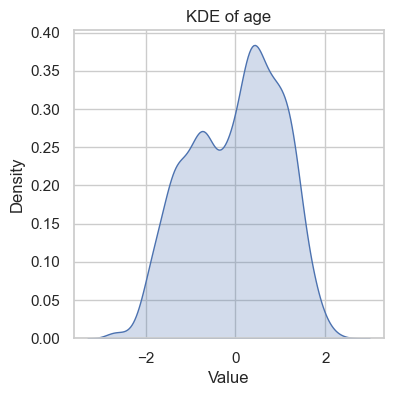

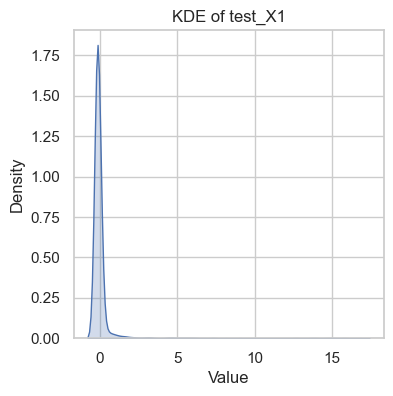

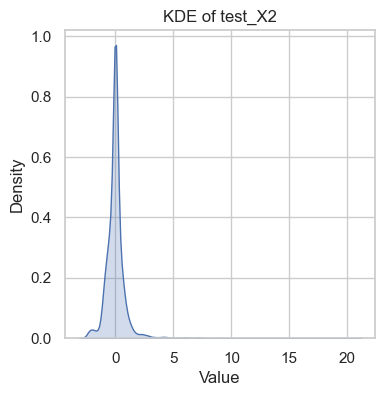

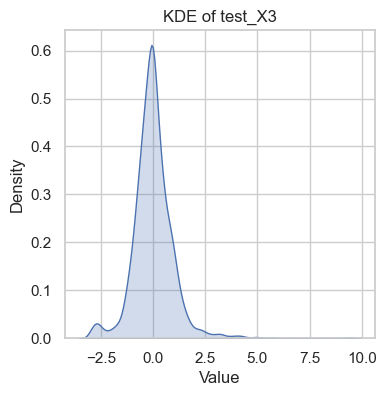

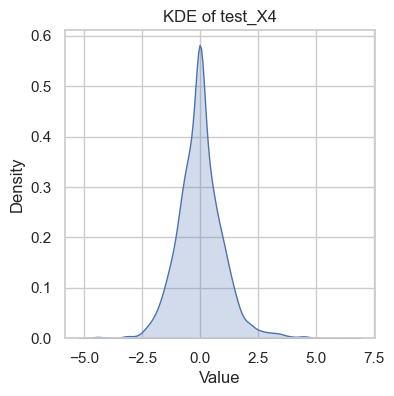

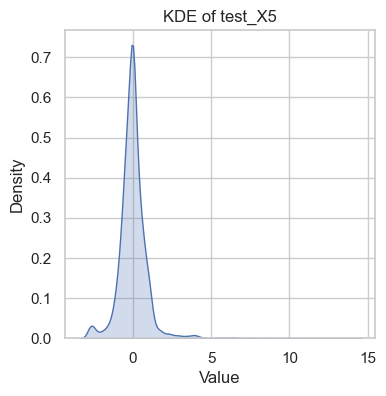

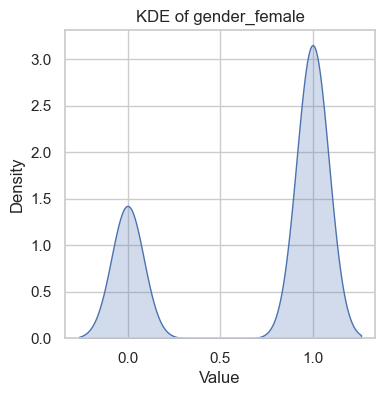

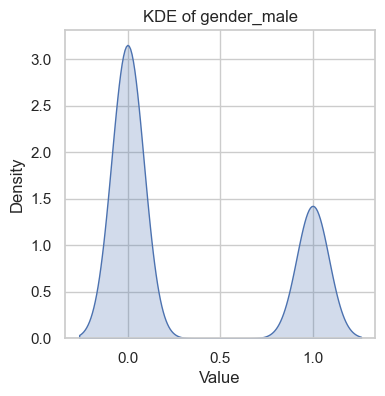

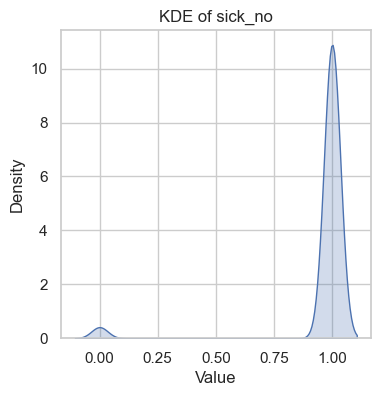

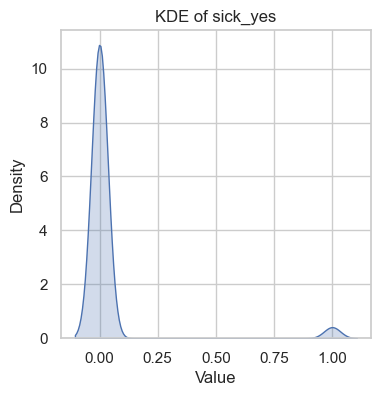

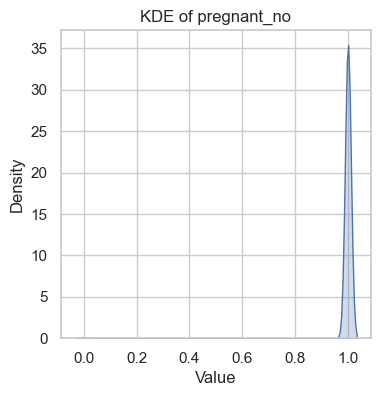

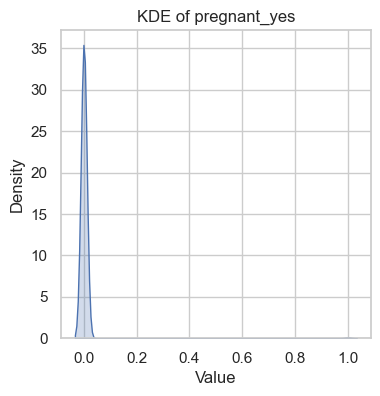

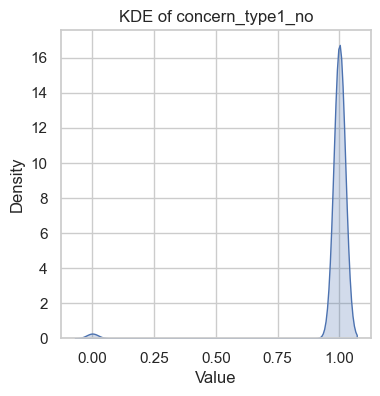

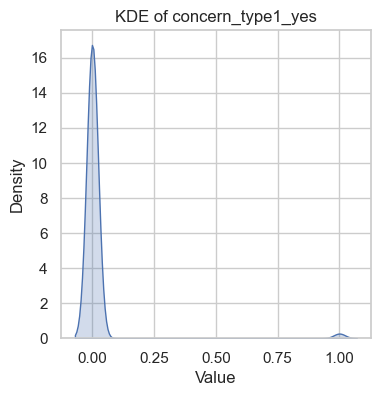

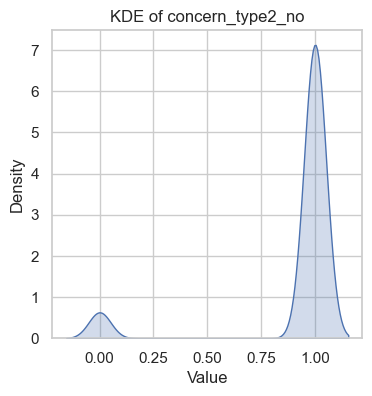

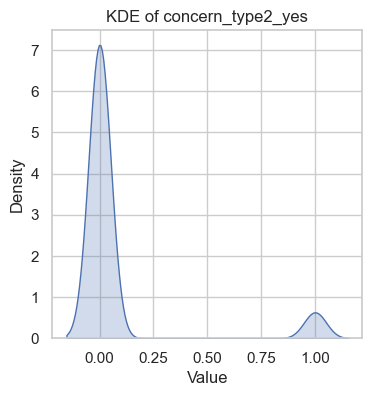

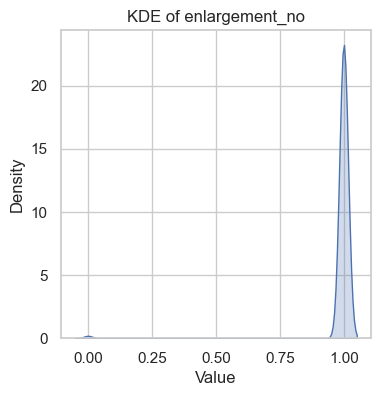

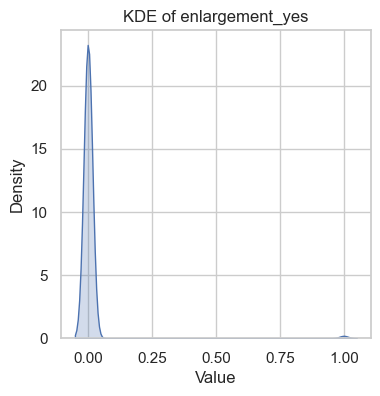

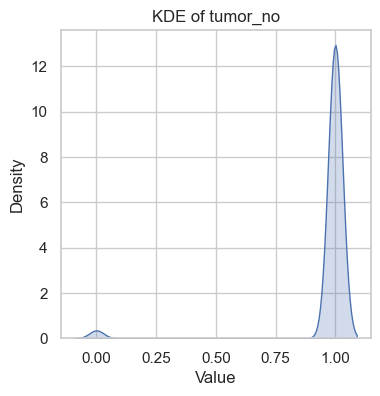

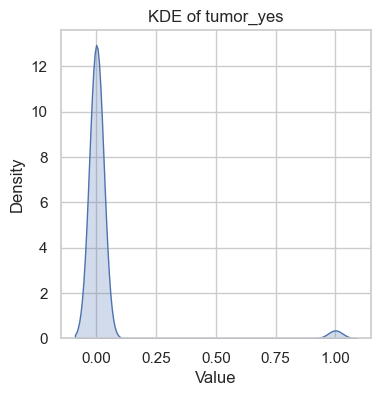

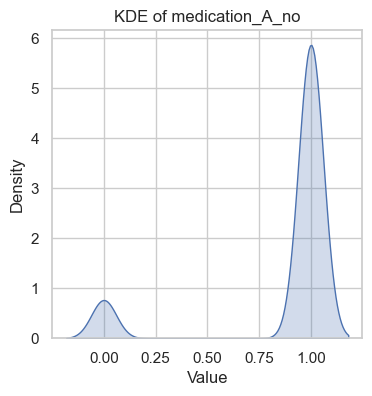

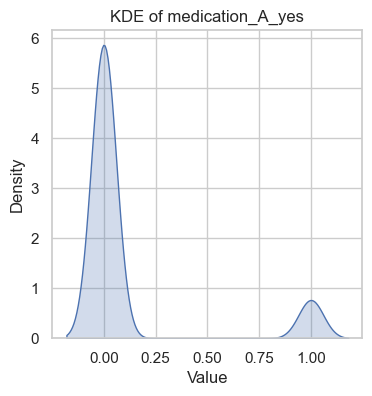

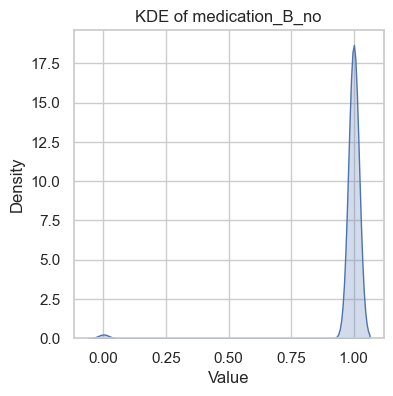

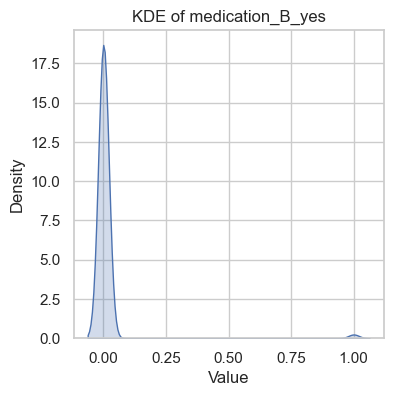

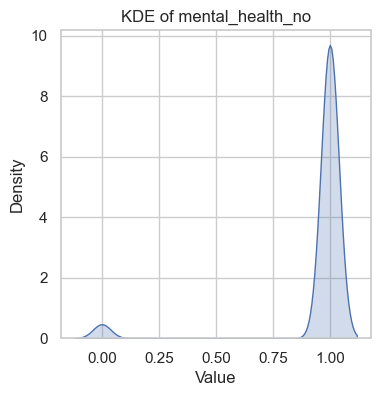

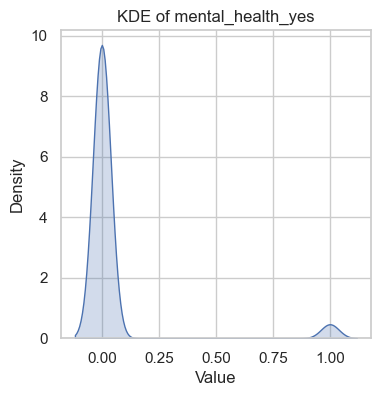

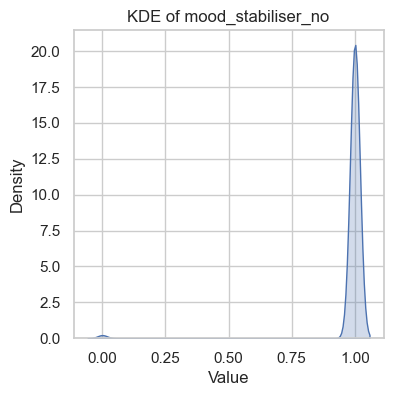

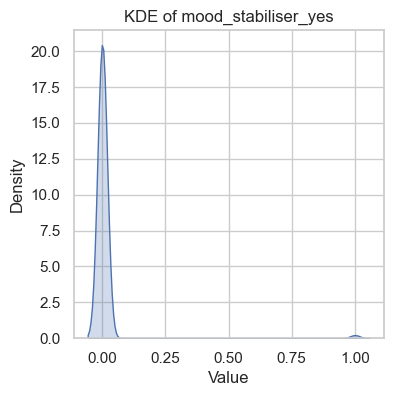

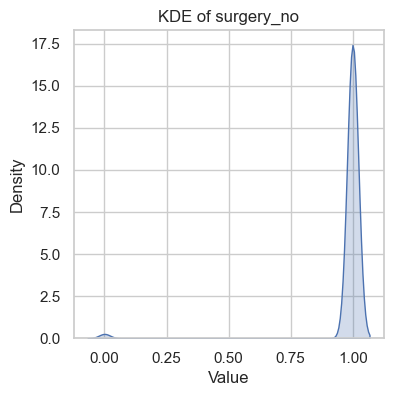

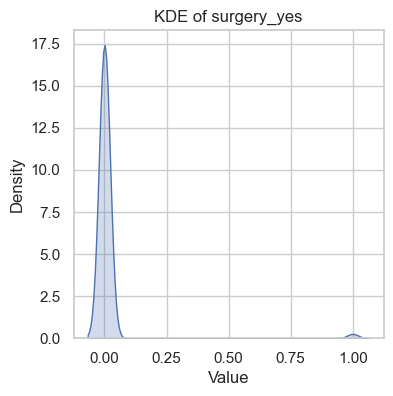

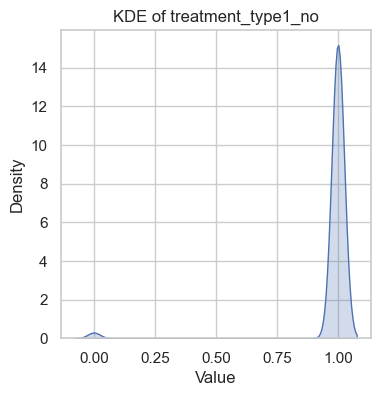

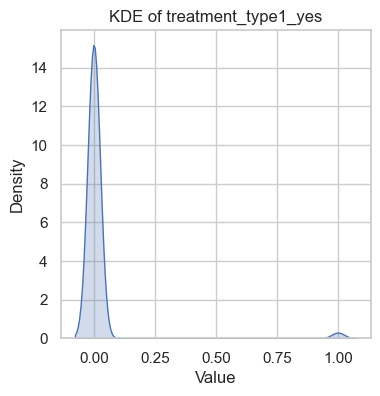

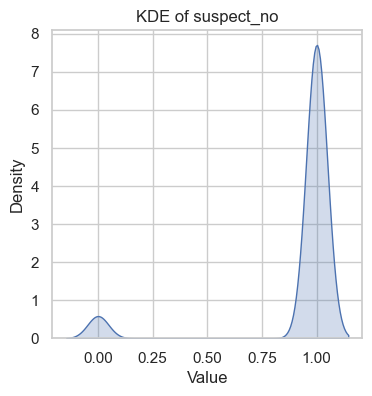

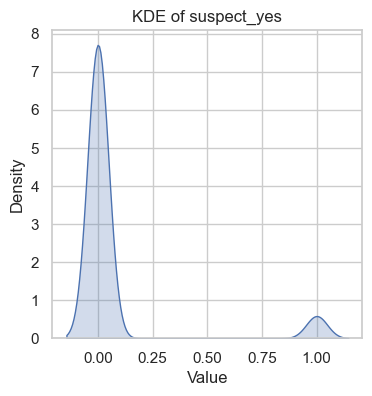

In [255]:
#kde plot between features
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming encoded_cluster_df is already loaded as a DataFrame
# Make sure it's the correct DataFrame
print(type(encoded_cluster_df))  # Should output: <class 'pandas.core.frame.DataFrame'>

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Looping through each column in the DataFrame and plotting the KDE
for column in encoded_cluster_df.columns:
    plt.figure(figsize=(4, 4))  # Set the figure size for each plot
    sns.kdeplot(encoded_cluster_df[column], fill=True)
    plt.title(f'KDE of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [257]:
#saving the plots as pdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assuming encoded_cluster_df is already loaded as a DataFrame
print(type(encoded_cluster_df))  # Should output: <class 'pandas.core.frame.DataFrame'>

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Define the path for the PDF file
pdf_path = 'kde_plots.pdf'

# Create a PDF file to save all plots
with PdfPages(pdf_path) as pdf:
    # Looping through each column in the DataFrame and plotting the KDE
    for column in encoded_cluster_df.columns:
        plt.figure(figsize=(4, 4))  # Adjust size as needed
        sns.kdeplot(encoded_cluster_df[column], fill=True)
        plt.title(f'KDE of {column}')
        plt.xlabel('Value')
        plt.ylabel('Density')
        
        pdf.savefig()  # Save the current figure into the pdf
        plt.close()  # Close the figure to free up memory

<class 'pandas.core.frame.DataFrame'>


## kde plot interpretations
In our analysis of the Kernel Density Estimation (KDE) plots, we observed that binary and categorical features such as gender_male, gender_female, pregnant_yes, and sick_no exhibit distinct binary distributions. These features sharply peak at values representing the presence or absence of specific conditions, which, despite their skewness, are crucial as they help uncover patterns that are relevant in medical contexts, highlighting the impact of biological factors on various conditions. Additionally, although less prevalent, the continuous features in our dataset, which represent physiological measurements or test results, are invaluable. They provide deeper insights into patient variations and are fundamental for a nuanced group analysis in clustering.

Recognizing the clinical relevance of each feature, regardless of its skewness or distribution, is essential as even highly skewed binary features capture critical characteristics that are pivotal for diagnosing and managing patient health. By incorporating all available features, our clustering analysis aims to capture a holistic view of the patient data, ensuring that no potential insight is neglected. This comprehensive analysis is particularly important in medical research, where understanding the interplay between demographic and clinical data can lead to breakthroughs in how health outcomes are approached.

To ensure our analysis reflects true, real-world scenarios, we are using the complete dataset. This approach facilitates the validation of our clustering methodology against established clinical outcomes. Looking ahead, to manage the high dimensionality and enhance interpretability, we will apply Principal Component Analysis (PCA) to focus on the most variance-contributing features. Additionally, we will conduct a deeper examination of highly correlated features to ensure that redundancy does not skew our results, aiming for a more efficient and insightful clustering process.

We will initially employ K-means clustering for its simplicity and efficiency and may explore other algorithms for comparative insights. Continuing collaboration with clinical experts is crucial for interpreting the data meaningfully and integrating findings into practical medical applications effectively.

Overall, the KDE plots have provided valuable insights into the data distributions within our medical dataset. By choosing to use all features for clustering, we aim to develop a comprehensive understanding of the underlying patterns, potentially enhancing the discovery of clinically significant patient subgroups and supporting advanced, personalized medical strategies.

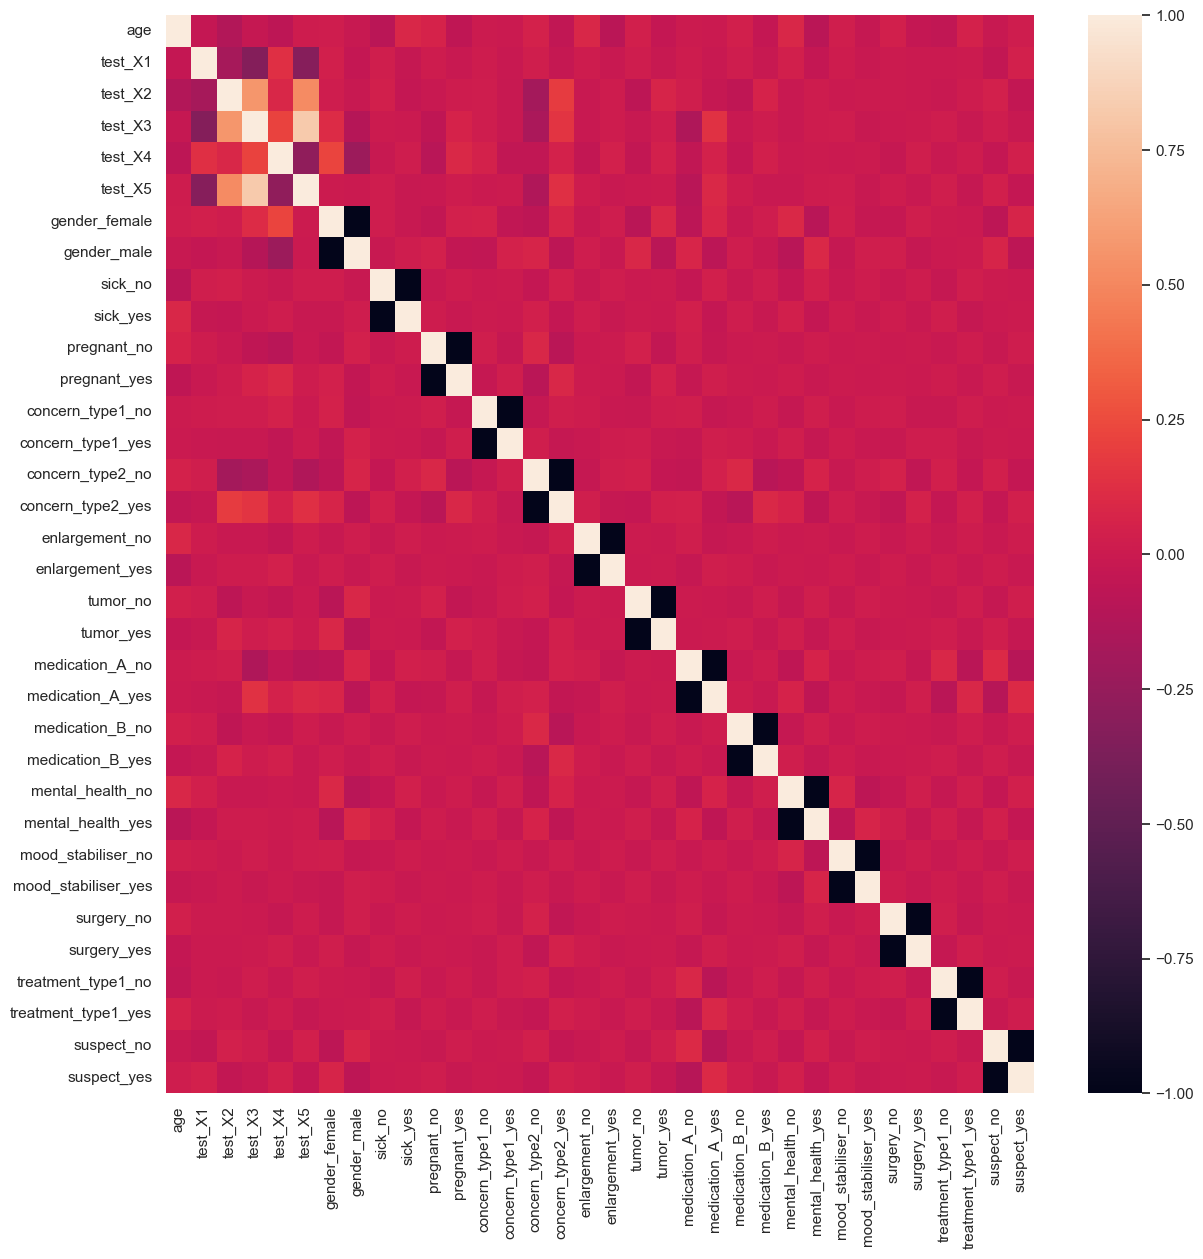

In [261]:
#correlational analysis
plt.figure(figsize=(14,14))
sns.heatmap(encoded_cluster_df.corr(), annot=False)
plt.show()
#this will help us know the best features to use in our analysis
#we will then assign the input variables as X to use for the analysis

## correlation analyysis report
In the correlation heatmap analysis of our dataset, several pertinent observations were noted. The heatmap's diagonal displays perfect correlations, as expected, since it represents each feature's correlation with itself. Notably, the majority of the features exhibited low to moderate positive correlations, indicating minimal redundancy among them, which supports our decision to include all features in the clustering analysis to capture a broad spectrum of information. Negative correlations were also observed, suggesting inverse relationships between certain features, such as gender_male versus gender_female and sick_yes versus sick_no, which highlight binary feature interactions where the presence of one attribute directly implies the absence of the other. These interactions are crucial for accurately capturing the distinct states or conditions relevant in a medical context. Furthermore, the lack of high correlations between many variables suggests that each feature contributes unique information, reinforcing the utility of employing a comprehensive dataset for clustering. This analysis not only reaffirms the independence of most features but also indicates a structured relationship in the data, which could be further explored using dimensionality reduction techniques like PCA to enhance data interpretability and focus on the most impactful features. Overall, the correlation heatmap has provided essential insights into the dataset’s structure, guiding our clustering approach to ensure robust and informative results.

In [467]:
#features to be used for clustering will the be;
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

## k-means clsutering

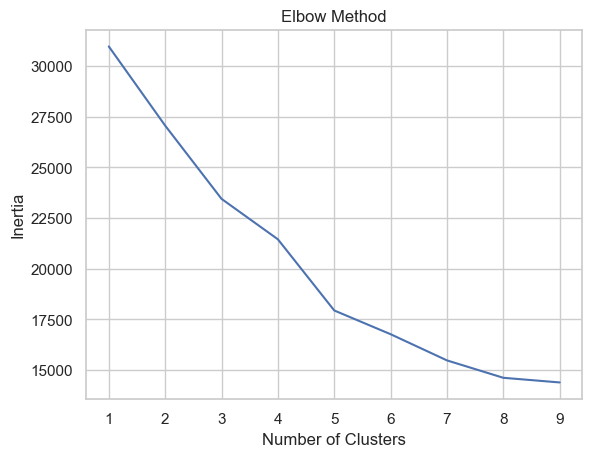

In [468]:
#uisng the elbow method to find the best k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting KMeans models starting from k=1 to k=10
kmeans_models = [KMeans(n_clusters=k).fit(encoded_cluster_df) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]

# Plotting the inertia values as a function of k
plt.plot(range(1, 10), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


##The elbow visualization indicates that the optimal number of clusters for the dataset might be around 3 TO 5, as the rate of decrease in inertia begins to slow down significantly after these points, suggesting diminishing returns from adding more clusters beyond this range.

In [ ]:
#cluster 3 is the optimal number of clusters, 4, 5, 6, 7

In [476]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'encoded_cluster_df' is your DataFrame containing the data

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of k values from 3 to 7
for k in range(3, 8):  # Note that the upper limit in range() is exclusive, so use 8 to include 7
    # Fit the KMeans model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(encoded_cluster_df)
    
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(encoded_cluster_df, kmeans.labels_)
    silhouette_scores.append(score)
    
    # Print the silhouette score for the current k
    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=3: 0.2458
Silhouette Score for k=4: 0.1741
Silhouette Score for k=5: 0.1579
Silhouette Score for k=6: 0.1603
Silhouette Score for k=7: 0.1490


## The silhouette score was further evaluated to identify the best clustering configuration based on the highest score achieved. The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters, with a score close to +1 suggesting a perfect match to its own cluster and distinct separation from other clusters. This metric is crucial as it helps us determine the optimal number of clusters for our model, ensuring that we use the most effective clustering configuration for both analysis and visualization purposes. Below is a screenshot showing the evaluation of these scores:

In [480]:
#checking for score
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(encoded_cluster_df)

KMeans(n_clusters=3)

In [481]:
preds = kmeans.predict(encoded_cluster_df)
preds

array([0, 1, 0, ..., 0, 0, 1])

In [482]:
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

In [485]:
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

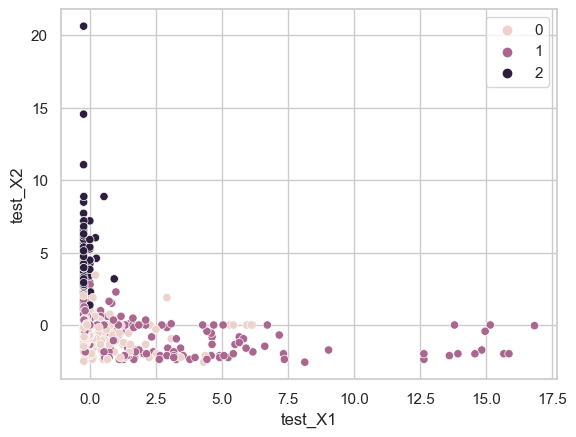

In [484]:
sns.scatterplot(data=encoded_cluster_df, x='test_X1', y='test_X2', hue=preds);

##The KMeans clustering model was employed with three designated clusters to analyze and categorize the dataset. After fitting the model to the data, the resulting cluster assignments were visually represented through a scatter plot. This visualization provides a clear depiction of how the data points, corresponding to the 'test_x1' and 'test_x2' features, are distributed across the three distinct clusters. Below is the scatter plot that demonstrates the spatial segregation of the clusters based on these features:

In [ ]:
#now drop the added cluster column to use another clustering techniques
encoded_cluster_df.drop('cluster', axis=1, inplace=True)

In [486]:
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

In [487]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(encoded_cluster_df)




DBSCAN(eps=0.3)

In [488]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1.1, min_samples=4)

In [489]:
model.fit(encoded_cluster_df)

DBSCAN(eps=1.1, min_samples=4)

In [490]:
model.labels_

array([ 0, -1, -1, ...,  1,  1,  2], dtype=int64)

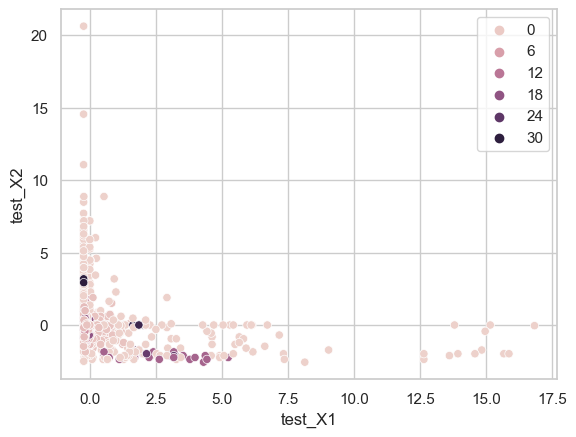

In [491]:
sns.scatterplot(data=encoded_cluster_df, x='test_X1', y='test_X2', hue=model.labels_);

In [492]:
#checking to see if any column was added encoded_cluster_df
encoded_cluster_df

age   test_X1       test_X2   test_X3       test_X4  \
id                                                                 
PA1001  0.381100  0.014743 -5.737090e-16 -0.460395 -7.807600e-01   
PA1002 -0.207328 -0.188256  5.999734e-01 -0.113355 -5.466043e-03   
PA1003  1.343981 -0.001368 -1.079468e+00 -1.385834  1.997377e+00   
PA1004 -0.528288 -0.197923  5.999734e-01  0.031244  5.914178e-02   
PA1005 -0.742262 -0.217256 -1.751532e-01 -0.286875 -7.172910e-16   
...          ...       ...           ...       ...           ...   
PA5246 -1.223702 -0.220478  3.415979e-01  0.002324 -7.161521e-01   
PA5247 -0.314315  0.891182 -1.079468e+00 -2.571553 -7.161521e-01   
PA5248  1.076514 -0.127034  8.322236e-02 -0.489315 -7.007387e-02   
PA5249  2.253368 -0.110923 -5.737090e-16  1.506163  3.175731e-01   
PA5250 -0.581782 -0.178589  9.875368e-01 -1.299074 -1.346817e-01   

             test_X5  gender_female  gender_male  sick_no  sick_yes  ...  \
id                                                                   ...   
PA1001 -1.340553e-01            0.0          1.0      1.0       0.0  ...   
PA1002 -1.603879e-01            1.0          0.0      1.0       0.0  ...   
PA1003 -1.740348e+00            0.0          1.0      1.0       0.0  ...   
PA1004 -5.505723e-02            1.0          0.0      1.0       0.0  ...   
PA1005 -3.742098e-16            1.0          0.0      1.0       0.0  ...   
...              ...            ...          ...      ...       ...  ...   
PA5246  3.136002e-01            0.0          1.0      1.0       0.0  ...   
PA5247 -2.398665e+00            1.0          0.0      1.0       0.0  ...   
PA5248 -4.763800e-01            1.0          0.0      1.0       0.0  ...   
PA5249  1.156246e+00            1.0          0.0      1.0       0.0  ...   
PA5250 -1.240027e+00            0.0          1.0      1.0       0.0  ...   

        mental_health_no  mental_health_yes  mood_stabiliser_no  \
id                                                                
PA1001               1.0                0.0                 1.0   
PA1002               1.0                0.0                 0.0   
PA1003               1.0                0.0                 1.0   
PA1004               1.0                0.0                 1.0   
PA1005               1.0                0.0                 1.0   
...                  ...                ...                 ...   
PA5246               1.0                0.0                 1.0   
PA5247               1.0                0.0                 1.0   
PA5248               1.0                0.0                 1.0   
PA5249               1.0                0.0                 1.0   
PA5250               1.0                0.0                 1.0   

        mood_stabiliser_yes  surgery_no  surgery_yes  treatment_type1_no  \
id                                                                         
PA1001                  0.0         1.0          0.0                 1.0   
PA1002                  1.0         1.0          0.0                 1.0   
PA1003                  0.0         1.0          0.0                 1.0   
PA1004                  0.0         1.0          0.0                 1.0   
PA1005                  0.0         1.0          0.0                 1.0   
...                     ...         ...          ...                 ...   
PA5246                  0.0         1.0          0.0                 1.0   
PA5247                  0.0         1.0          0.0                 1.0   
PA5248                  0.0         1.0          0.0                 1.0   
PA5249                  0.0         1.0          0.0                 1.0   
PA5250                  0.0         1.0          0.0                 1.0   

        treatment_type1_yes  suspect_no  suspect_yes  
id                                                    
PA1001                  0.0         1.0          0.0  
PA1002                  0.0         1.0          0.0  
PA1003                  0.0         1.0          0.0  
PA1

## Hierarchical Clustering

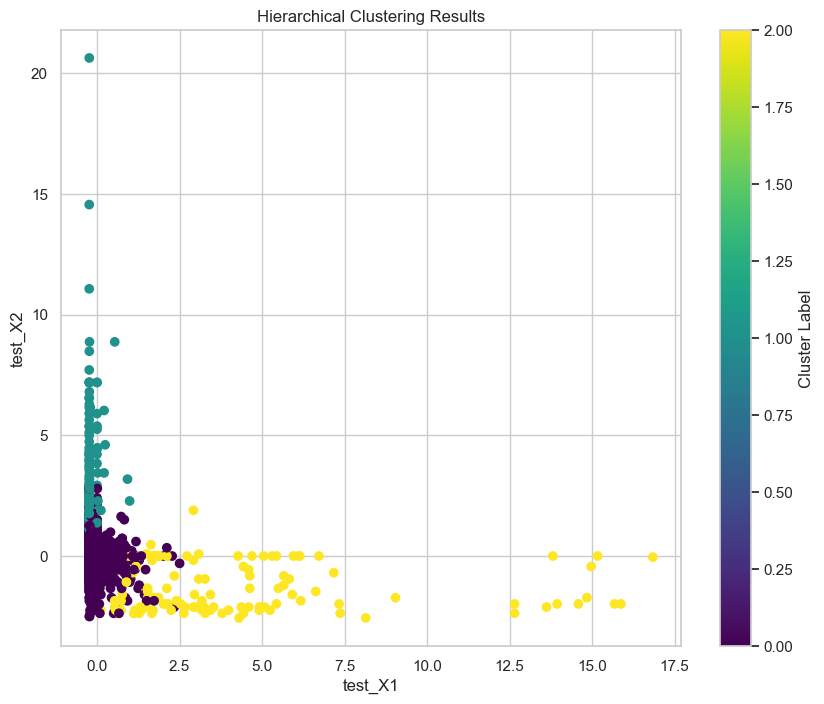

In [493]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


# Step 1: Perform Hierarchical Clustering
# Number of clusters is set to 3, you can adjust this according to your needs
clustering = AgglomerativeClustering(n_clusters=3)
clustering.fit(encoded_cluster_df)

# Step 2: Extract cluster labels
encoded_cluster_df['Cluster'] = clustering.labels_

# Step 3: Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(encoded_cluster_df['test_X1'], encoded_cluster_df['test_X2'], c=encoded_cluster_df['Cluster'], cmap='viridis')
plt.title('Hierarchical Clustering Results')
plt.xlabel('test_X1')
plt.ylabel('test_X2')
plt.colorbar(label='Cluster Label')  # Shows color bar
plt.show()